In [1]:
import pandas as pd
import json
import seaborn as sns
import calendar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
month_order = list(calendar.month_name)[1:] 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style='darkgrid')

In [2]:
data = pd.read_csv('data/Traffic%20Accidents%201%3A11(1).csv',parse_dates=['Date '],dayfirst=True)
data['Quarter'] = data['Date '].dt.quarter
data['Month'] = data['Date '].dt.strftime('%B')
population_data = pd.read_csv('data/catalunya_population.csv')
tourist_hiker_data = pd.read_csv('data/tourist and hikers.csv')
tourist_hiker_data_monthly = pd.read_csv('data/Tourists and hikers(Monthly).csv',parse_dates=['Date'])
tourist_hiker_data_monthly['Month'] = tourist_hiker_data_monthly['Date'].dt.strftime('%B')
tourist_hiker_data_monthly['Quarter'] = tourist_hiker_data_monthly['Date'].dt.quarter

In [3]:
data.head(2)

Year         Area      Date   Road   Kilometer Point Municipality Name   \
0  2010  Zona urbana 2010-01-25     SE         999999.0  CANOVES I SAMALUS   
1  2010    Carretera 2010-10-31  N-240             99.9             LLEIDA   

      County Name  Province Name   Fatalties  Serious Injuries   ...  \
0  Valles Oriental      Barcelona          0                  1  ...   
1           Segria         Lleida          0                  1  ...   

   Road Ownership   Road's Altimetric Layout       Wind Conditions   \
0              NaN                       NaN  Calma, vent molt suau   
1          Estatal                       Pla  Calma, vent molt suau   

   Day of the Week Grouping   Hour of Day  Time of Day Grouping   \
0                    Feiners        23.33                    Nit   
1               CapDeSetmana         1.00                    Nit   

                         Type of Accident   Day Type  Quarter    Month  
0           Col.lisió de vehicles en marxa  dill-dij        1  January  
1  Sortida de la calcada sense especificar        dg        4  October  

[2 rows x 60 columns]

##  **Data Setup**

In [4]:
translation_dict = {'Sec i net': 'Dry and clean', 'Relliscós': 'Slippery', 'Mullat': 'Wet', 
                 'Inundat': 'Flooded', 'Nevat': 'Snowy', 'Gelat': 'Frozen', 
                 'Sense especificar': 'Unspecified'}
data['Road Surface Conditions '] = data['Road Surface Conditions '].map(translation_dict)

road_type = {'Via urbana( inclou carrer i carrer residencial)': 'City road( includes residential street and street)',
                 'Carretera convencional': 'Conventional Road', 
                 'Altres': 'Other', 
                 'Autopista': 'Motorway', 
                 'Autovia': 'Motorway', 
                 'Camí rural/pista forestal': 'Country Road/Forest Track'}

Dow_grouping = {
    'Feiners':'Weekdays',
    'CapDeSetmana':'Weekend'
}

mapping_dict1 = {
   'Encalç': 'Barefoot',
   'Resta sortides de via': 'Other track exits',
   'Col·lisió frontal': 'Head-on collision',
   'Envestida (frontal lateral)': 'Onslaught (side front)',
   'Caiguda en la via': 'Fall into the track',
   'Atropellament': 'Run over',
   'Fregament o col·lisió lateral': 'Friction or side collision',
   'Xoc contra objecte/obstacle sense sortida prèvia de via': 'Collision with object/obstacle with no previous track exit',
   'Altres': 'Other',
   'Sortida de via amb xoc o col·lisió': 'Exit track with collision or collision',
   'Sortida de via amb bolcada': 'Exit of track with overturn',
   'Sortida de via amb atropellament': 'Exit of track with run over',
   'Xoc amb animal a la calçada': 'Collision with animal on the road'
}
ToD_mapping = {'Nit':'Night','Tarda':'Afternoon','Matí':'Morning'}

weather_dict = {
   'Bon temps': 'Good weather',
   'Pluja forta': 'Heavy rain',
   'Pluja dèbil': 'Weak rain',
   'Nevant': 'Snowing',
   'Sense especificar': 'Unspecified',
   'Calamarsa': 'Hail'
}

data['Time of Day Grouping ']  = data['Time of Day Grouping '].map(ToD_mapping)
data['Day of the Week Grouping ']  = data['Day of the Week Grouping '].map(Dow_grouping)
data['Subtype of Accident'] = data['Subtype of Accident'].map(mapping_dict1)
data['Weather Conditions ']  = data['Weather Conditions '].map(weather_dict)
data['Type of Road'] = data['Type of Road'].map(road_type)

In [5]:
data.sort_values('Date ',inplace=True)

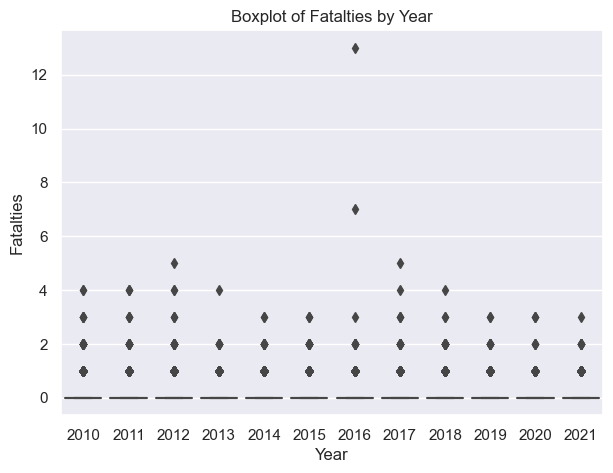

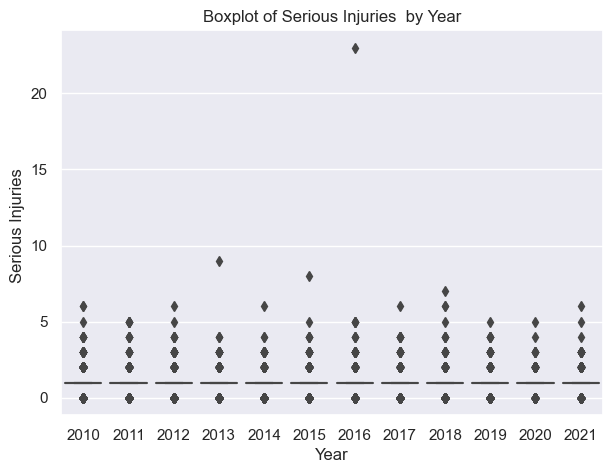

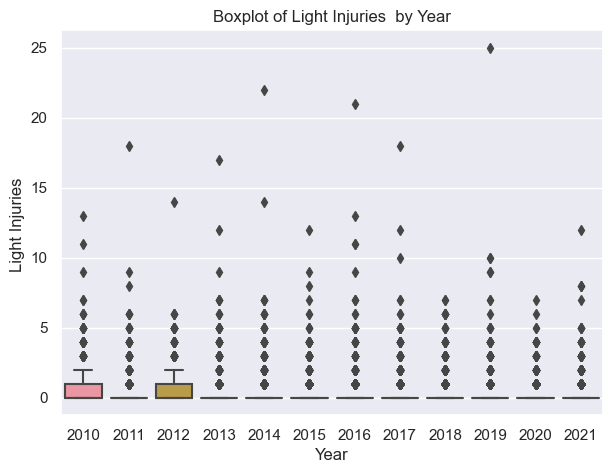

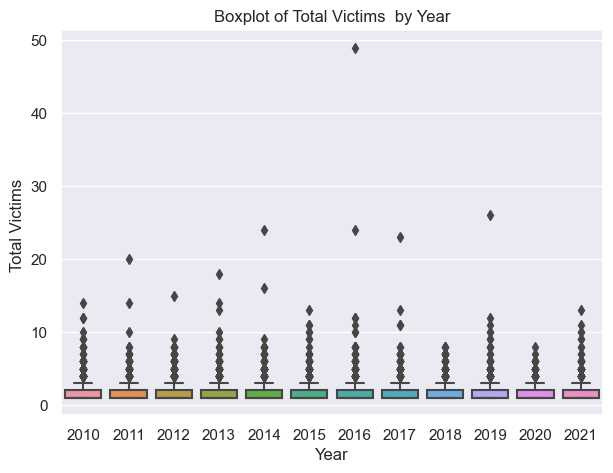

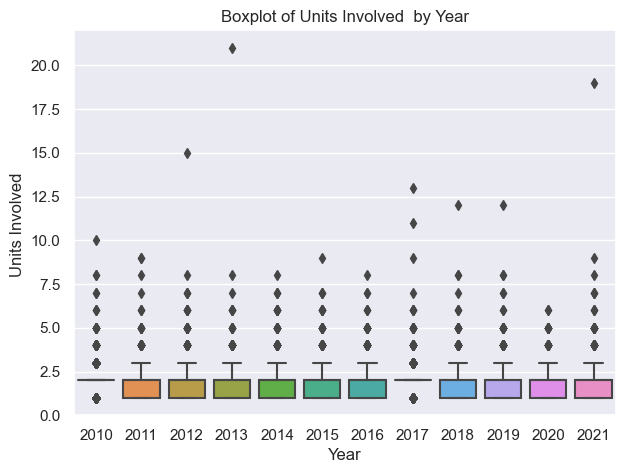

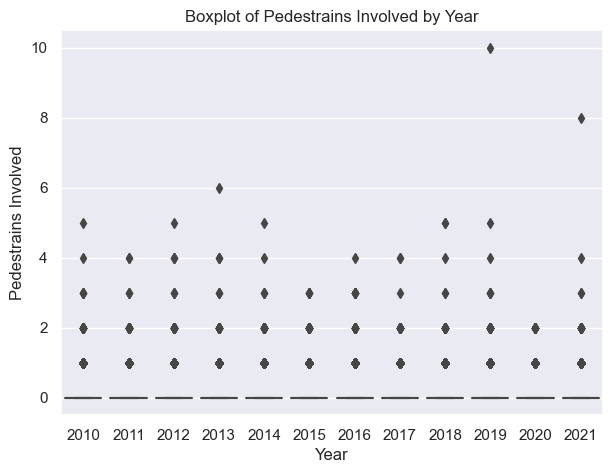

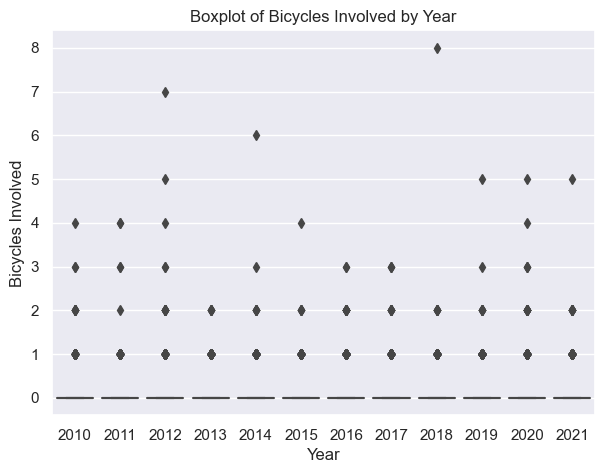

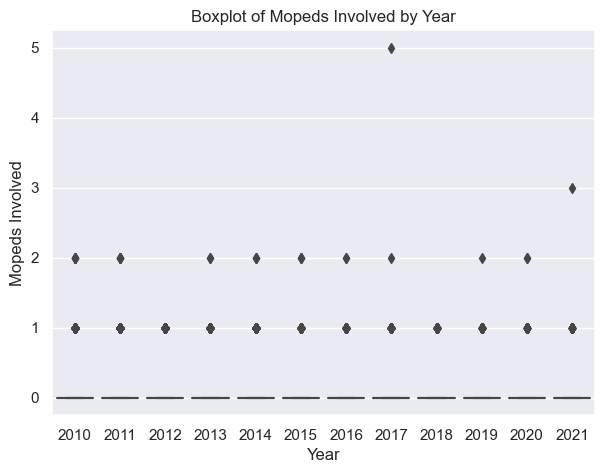

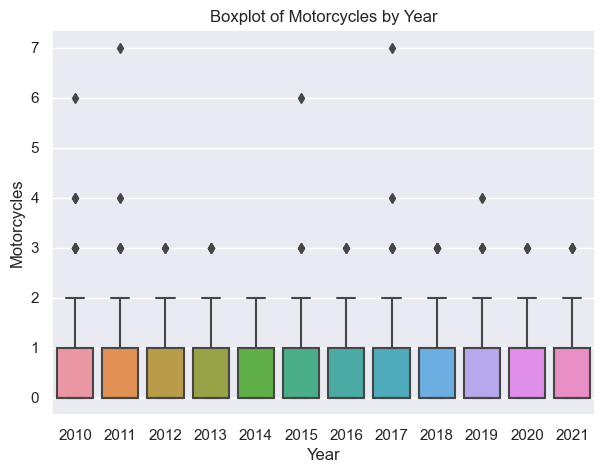

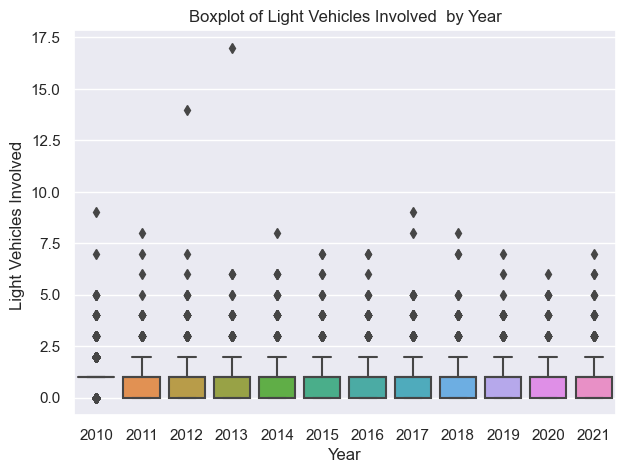

In [6]:
main_colunns = ['Fatalties',
       'Serious Injuries ', 'Light Injuries ', 'Total Victims ',
       'Units Involved ', 'Pedestrains Involved', 'Bicycles Involved',
       'Mopeds Involved', 'Motorcycles', 'Light Vehicles Involved ']

def create_boxplot(data, x_column, y_column):
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=data, x=x_column, y=y_column)
    plt.title(f'Boxplot of {y_column} by {x_column}')
    plt.show()


for y_column in main_colunns:
    create_boxplot(data, 'Year', y_column)


In [7]:
data_no_outliers = data.loc[(data['Total Victims '] <= 20)& (data['Units Involved ']<=17)]

# Display the DataFrame without outliers
print("\nDataFrame without outliers:")
print(data_no_outliers.shape)


DataFrame without outliers:
(21154, 60)


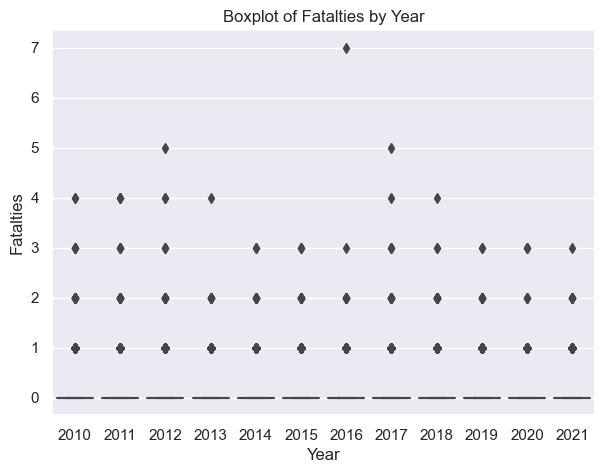

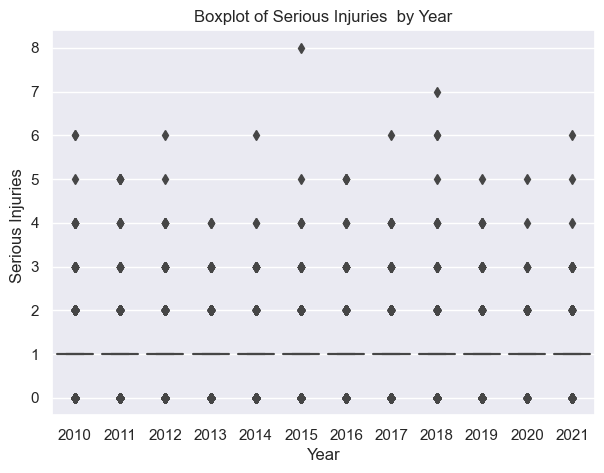

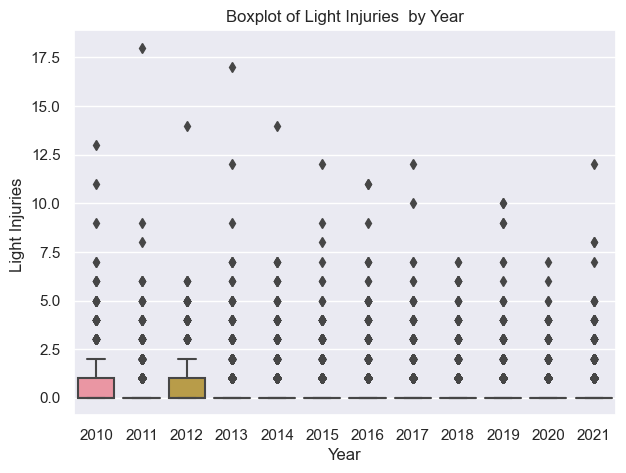

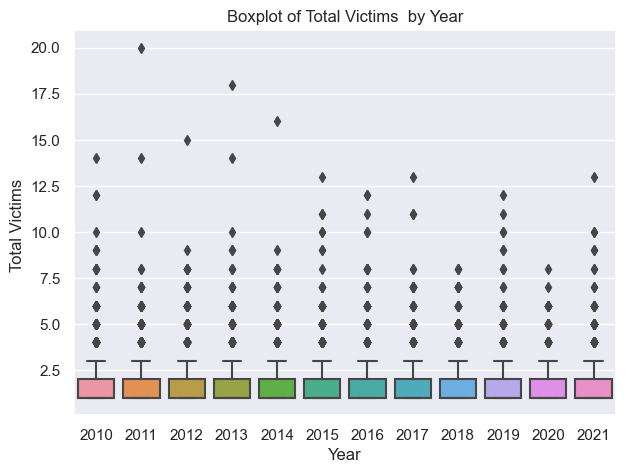

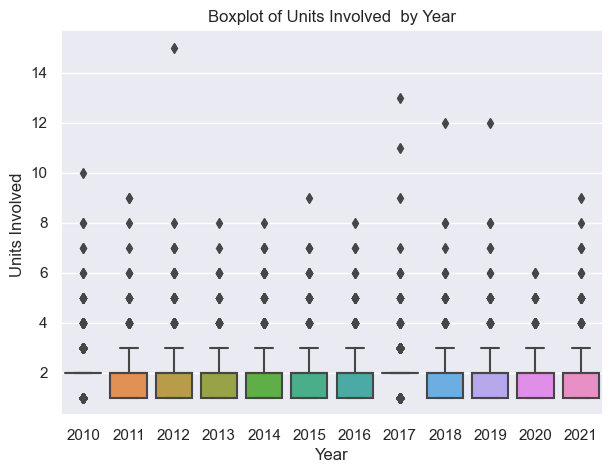

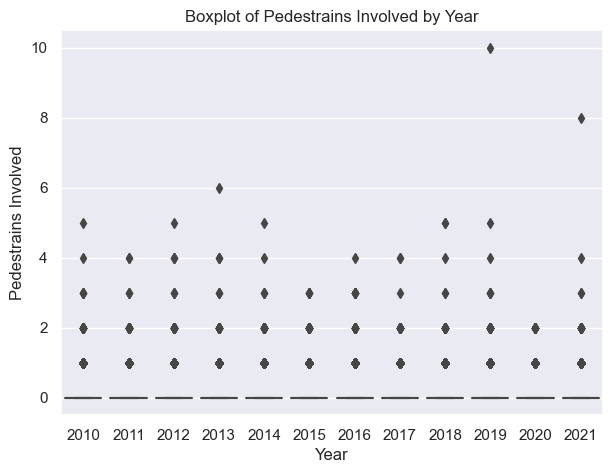

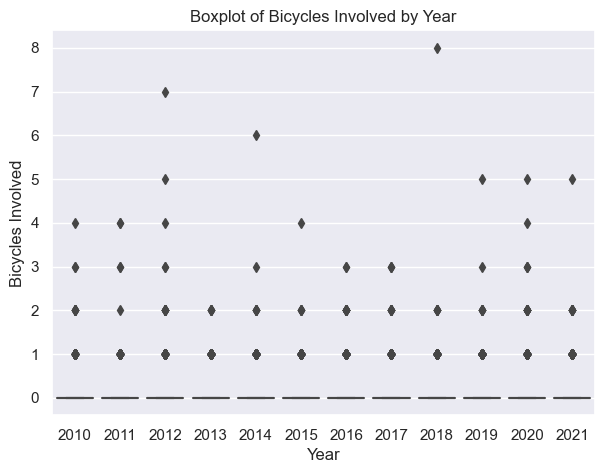

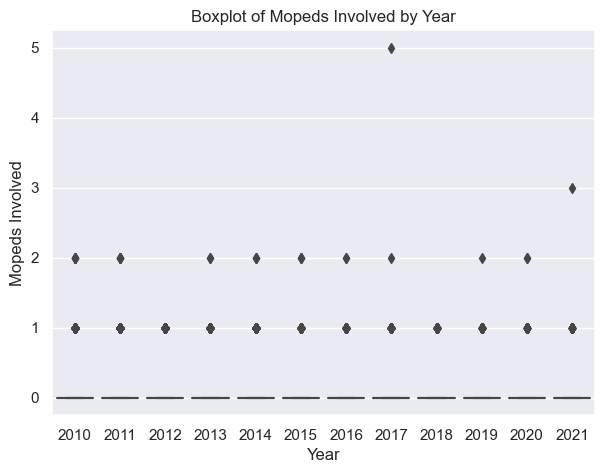

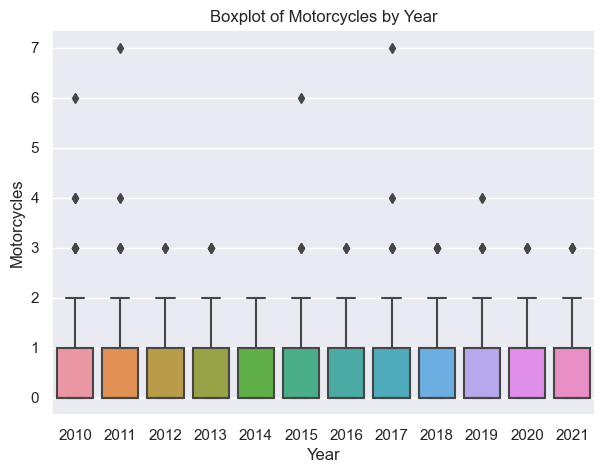

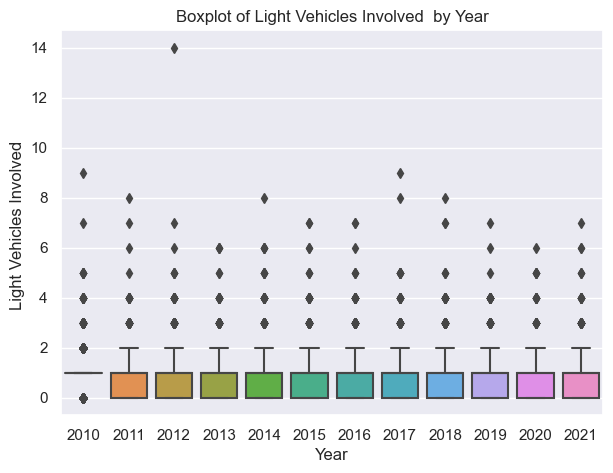

In [8]:
main_colunns = ['Fatalties',
       'Serious Injuries ', 'Light Injuries ', 'Total Victims ',
       'Units Involved ', 'Pedestrains Involved', 'Bicycles Involved',
       'Mopeds Involved', 'Motorcycles', 'Light Vehicles Involved ']

def create_boxplot(data, x_column, y_column):
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=data, x=x_column, y=y_column)
    plt.title(f'Boxplot of {y_column} by {x_column}')
    plt.show()


for y_column in main_colunns:
    create_boxplot(data_no_outliers, 'Year', y_column)


## **Yearly Trends**

### **Data Prep**

In [10]:
aggregation_functions = {
   'Fatalties': 'sum',
   'Serious Injuries ': 'sum',
   'Light Injuries ': 'sum',
   'Total Victims ': 'sum',
   'Fatalties': 'sum',
   'Motorcycles':'sum',
   'Mopeds Involved':'sum',
   'Units Involved ': 'sum',
   'Pedestrains Involved':'sum',
   'Bicycles Involved':'sum',
   'Light Vehicles Involved ': 'sum',
   'Heavy Vehicles Involved': 'sum',
   'Other Units Involved':'sum',
   # 'Influence of Fog ': 'sum',
   # 'Influence of Environment': 'sum', 
   # 'Influence of Traffic': 'sum',
   # 'Influence of Weather': 'sum', 
   # 'Influence of Wind Intensity ': 'sum',
   # 'Influence of Lighting': 'sum', 
   # 'Influence of Special Measures': 'sum',
   # 'Influence of Road Objects': 'sum', 
   # 'Influence of Road Surface ': 'sum',
   # 'Influence of Visibility ': 'count' 
}

accidents_per_year = data_no_outliers.groupby('Year').size().reset_index(name='Count')

accidents_per_year.columns = ['Year', 'Accidents']

result = data_no_outliers.groupby(['Year','Province Name ']).agg(aggregation_functions).reset_index()
population_data.sort_values(by='Year',ascending=True,inplace=True)
tourist_hiker_data.sort_values(by='Year',ascending=True,inplace=True)
population_data['Percentage Change'] = (population_data['Catalonia'].pct_change() * 100).fillna(0)
accidents_per_year['Percentage Change'] = (accidents_per_year['Accidents'].pct_change() * 100).fillna(0)
tourist_hiker_data['Percentage Change'] = (tourist_hiker_data['Total'].pct_change() * 100).fillna(0)

Yearly_trends = pd.merge(result, accidents_per_year, on='Year', how='left')


In [11]:
severity_data = data_no_outliers.groupby(['Year','Severity of Accident '])['Year'].size().reset_index(name = 'Count')

In [12]:
Quartile_data = data_no_outliers.groupby('Quarter').size().reset_index(name='Count')
Month_data = data_no_outliers.groupby(
    pd.Categorical(data_no_outliers['Month'], categories=month_order, ordered=True)
).size().reset_index(name='Count')
Month_data_tourist = tourist_hiker_data_monthly.groupby(
   [pd.Categorical(tourist_hiker_data_monthly['Month'], categories=month_order, ordered=True)]).agg({'Total':'sum'}).reset_index()
Month_data.rename({'index':'Month'},axis=1,inplace=True)

In [13]:
accidents_per_year['PCS'] = scaler.fit_transform(accidents_per_year['Percentage Change'].to_numpy().reshape(-1,1))
population_data['PCS'] = scaler.fit_transform(population_data['Percentage Change'].to_numpy().reshape(-1,1))
tourist_hiker_data['PCS'] = scaler.fit_transform(tourist_hiker_data['Percentage Change'].to_numpy().reshape(-1,1))

### **Accidents Percentage Change from 2012 to 2021 : Observations**

- *From 2020 to 2021, however, there was a significant increase in the number of accidents, increasing by approximately 19.7%.*
- *The year 2011 saw the greatest decrease in the number of accidents (-5.85%), while 2021 saw the largest increase (+19.7%).*
- *The year 2020 had the largest percentage decrease (-30.21%).*


- *In 2010, there were 1984 accidents. Over the next decade, the number of accidents generally decreased, reaching its lowest point in 2020 with 1208 accidents. However, it's worth noting that the drastic drop in 2020 can largely be attributed to the COVID-19 pandemic, which led to reduced road usage across the globe.*

- *With the pandemic's impact, there was a significant increase in the number of accidents from 2020 to 2021, marking an approximate 19.7% rise. but if we use the year prior(2019) and compare that with 2021, it shows a decline of 16.46%*

- *The year 2011 saw the greatest decrease in the number of accidents (-5.85%), while 2021 saw the largest increase (+19.7%) after the pandemic recovery period.*

- *The year 2010, which marks the beginning of our data set, showed no percentage change as there was no preceding year to compare it to. Moving forward, the percentage change varies from year to year. For instance, 2011 experienced a decrease of -5.85%, while 2021, following the COVID-19 pandemic, exhibited an increase of +19.7%. Notably, the year 2020 saw a significant decrease of -30.21% due to the pandemic's impact on road usage.*

- *Based on the data, it show 16.46% percentage reduction from accidents in the year 2010 and 2021.*

- *All provinces experience a comparable drop in the number of fatal and serious accidents as the frequency of incidents decreases over the year.*

In [14]:
min_index = accidents_per_year['Percentage Change'][1:].idxmin()
year_with_min_percentage_change = accidents_per_year.loc[min_index, 'Year']
print(f"The year with the lowest percentage change (excluding the initial year) is: {year_with_min_percentage_change}")

The year with the lowest percentage change (excluding the initial year) is: 2020


In [15]:
print(f"Percentage change when 2019 is compared to 2021 : {round((accidents_per_year.drop('Percentage Change',axis=1)['Accidents'].drop(10).pct_change()* 100)[11],2)}")

Percentage change when 2019 is compared to 2021 : -16.46


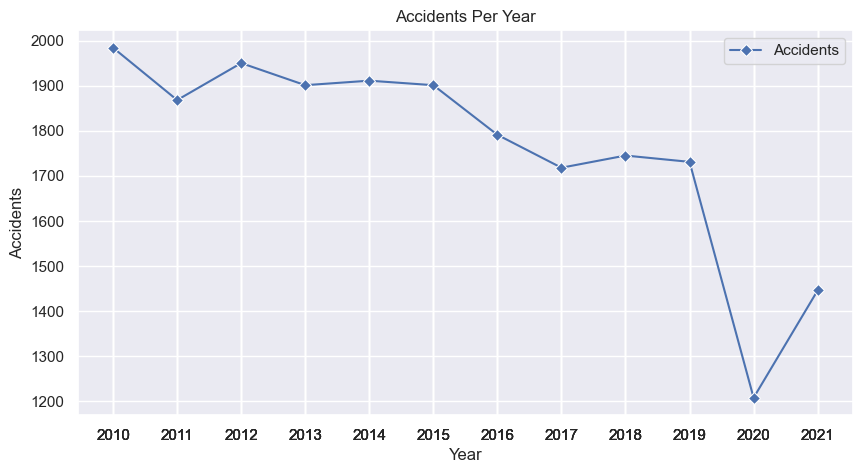

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Accidents', data=accidents_per_year,marker='D',label='Accidents')
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.title('Accidents Per Year')
plt.legend()
plt.xticks(Yearly_trends['Year'])
plt.show()

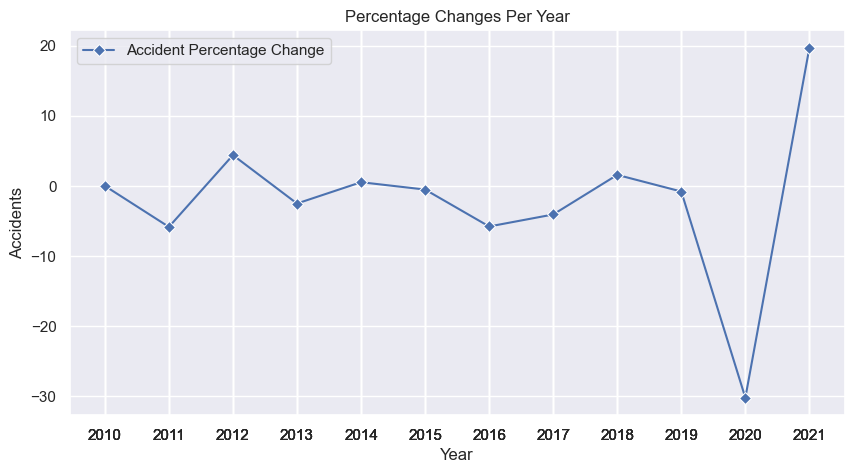

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Percentage Change', data=accidents_per_year,marker='D',label='Accident Percentage Change')
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.title('Percentage Changes Per Year')
plt.legend()
plt.xticks(Yearly_trends['Year'])
plt.show()

In [18]:
count_2012 = accidents_per_year.loc[accidents_per_year['Year'] == 2019, 'Accidents'].values[0]
count_2021 = accidents_per_year.loc[accidents_per_year['Year'] == 2021, 'Accidents'].values[0]

# Calculate the percentage reduction
percentage_reduction = ((count_2012 - count_2021) / count_2012) * 100

print(f"Percentage Reduction from 2012 to 2021: {percentage_reduction:.2f}%")

Percentage Reduction from 2012 to 2021: 16.46%


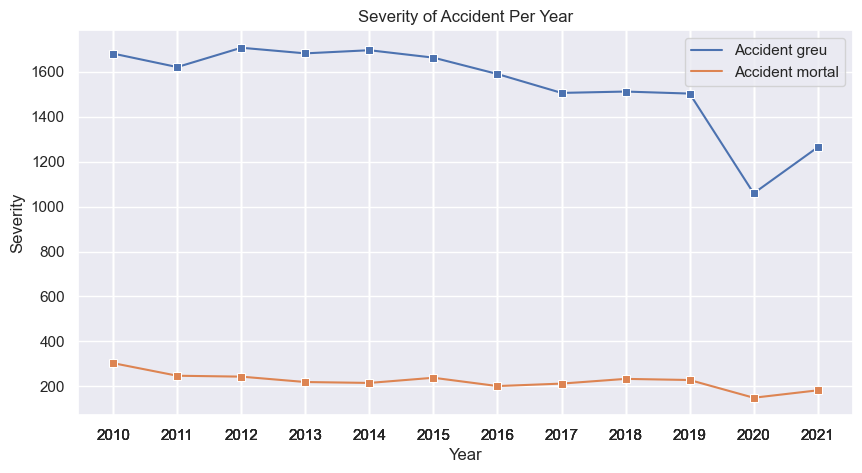

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Count',hue='Severity of Accident ', data=severity_data,marker='s')
plt.xlabel('Year')
plt.ylabel('Severity')
plt.title('Severity of Accident Per Year')
plt.legend()
plt.xticks(Yearly_trends['Year'])
plt.show()

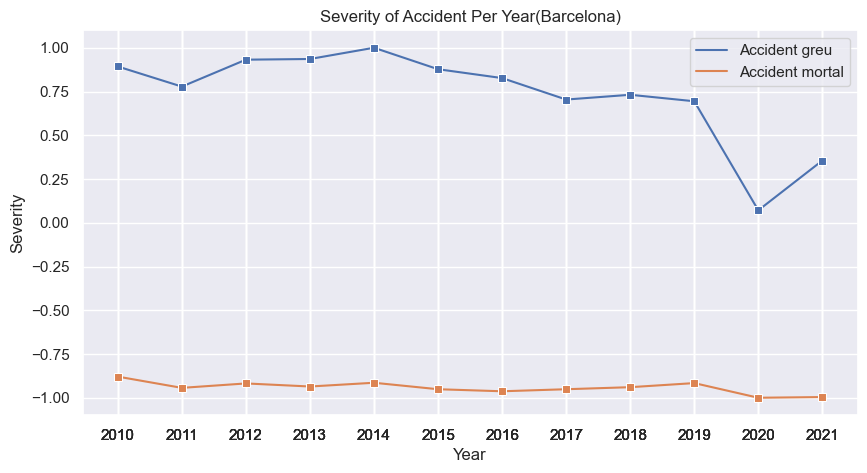

In [20]:
barca_severity = data_no_outliers.loc[data['Province Name ']=='Barcelona'].groupby(['Year','Severity of Accident '])['Year'].size().reset_index(name = 'Count')
barca_severity['Count'] = scaler.fit_transform(barca_severity['Count'].to_numpy().reshape(-1,1))
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Count',hue='Severity of Accident ', data=barca_severity,marker='s')
plt.xlabel('Year')
plt.ylabel('Severity')
plt.title('Severity of Accident Per Year(Barcelona)')
plt.legend()
plt.xticks(Yearly_trends['Year'])
plt.show()

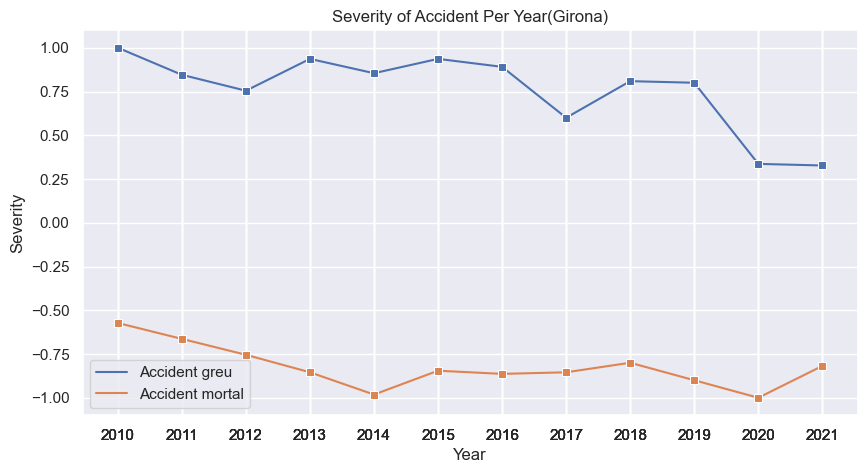

In [ ]:
Girona_severity = data_no_outliers.loc[data['Province Name ']=='Girona'].groupby(['Year','Severity of Accident '])['Year'].size().reset_index(name = 'Count')
Girona_severity['Count'] = scaler.fit_transform(Girona_severity['Count'].to_numpy().reshape(-1,1))
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Count',hue='Severity of Accident ', data=Girona_severity,marker='s')
plt.xlabel('Year')
plt.ylabel('Severity')
plt.title('Severity of Accident Per Year(Girona)')
plt.legend()
plt.xticks(Yearly_trends['Year'])
plt.show()

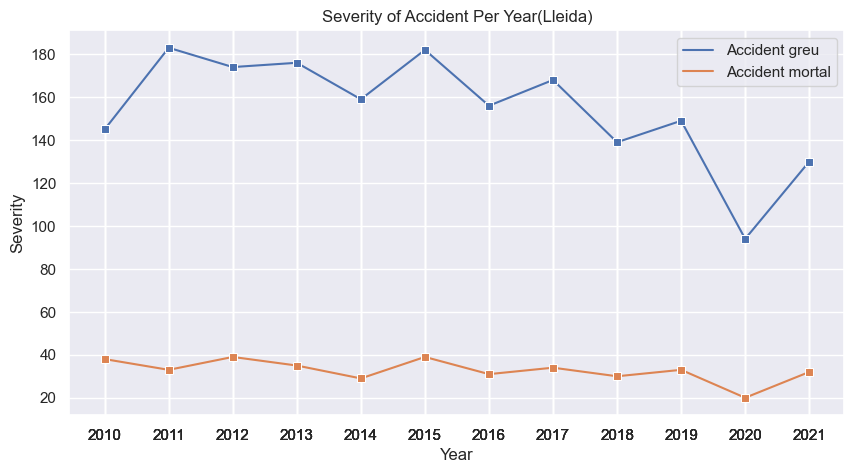

In [ ]:
Lleida_severity = data_no_outliers.loc[data['Province Name ']=='Lleida'].groupby(['Year','Severity of Accident '])['Year'].size().reset_index(name = 'Count')
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Count',hue='Severity of Accident ', data=Lleida_severity,marker='s')
plt.xlabel('Year')
plt.ylabel('Severity')
plt.title('Severity of Accident Per Year(Lleida)')
plt.legend()
plt.xticks(Yearly_trends['Year'])
plt.show()

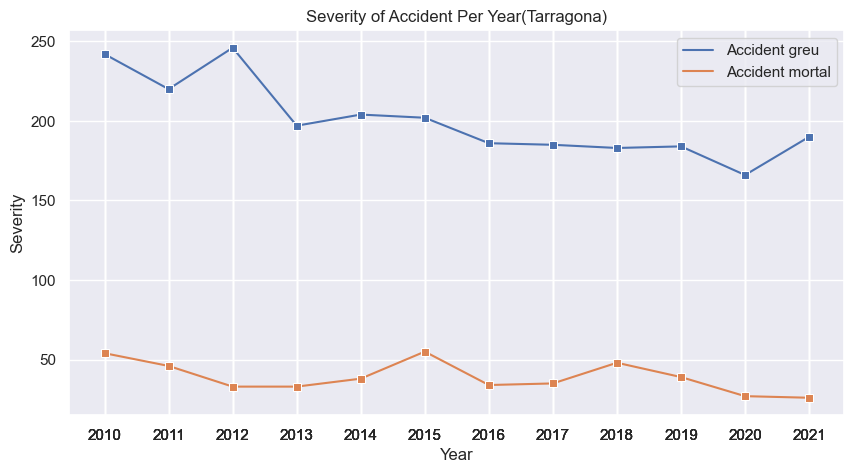

In [ ]:
Tarragona_severity = data_no_outliers.loc[data['Province Name ']=='Tarragona'].groupby(['Year','Severity of Accident '])['Year'].size().reset_index(name = 'Count')
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Count',hue='Severity of Accident ', data=Tarragona_severity,marker='s')
plt.xlabel('Year')
plt.ylabel('Severity')
plt.title('Severity of Accident Per Year(Tarragona)')
plt.legend()
plt.xticks(Yearly_trends['Year'])
plt.show()

In [ ]:
data_no_outliers['Province Name '].unique()

array(['Barcelona', 'Girona', 'Lleida', 'Tarragona'], dtype=object)

### **Accidents Percentage Change from 2012 to 2021 : Insights**

- *Althougth the Tourist data only starts from 2016, it shows a clear correlation between the percentage inflow chnage of tourist and the percentage change of accidnets per year(Under high speculation at this point) but the population seems to have an inversely proportional relationship with the PC of accidents which is seen in provinces like Girona, while Tarragona and Lleida have a directly proportional relationship, on the other hand Barcelona has no clear interaction with it's population*

- *On another note from 2012 to 2021 there has been a  33.55% reduction in the number of victims and a 37.78% reduction in the number of fatalities*

- *In all years tourist seem to come in most in July which concides with the Ballon Festival and a bunch of other [events that run throughout July](https://unexpectedcatalonia.com/july-in-catalonia/) and also looking the the accident time graph on a month basis the spike seems to follow suit on said month and the same trend is shown in the yearly quarters*


- *Fridays and Saturdays emerge as the days with the highest accident counts. This surge can be attributed to increased leisurely activities, heightened alcohol consumption, and the potential fatigue from [work return trips]().*

- *Accidents occurring between midnight and 4 am exhibit a higher fatality rate. This trend may stem from a potential lack of immediate help during these late hours.*

- *The majority of accidents happen between 4 pm and 8 pm, aligning with typical closing times of offices and workplaces. This timeframe suggests increased road activity, potentially driven by [rush hour traffic](https://businessculture.org/southern-europe/business-culture-in-spain/work-life-balance-in-spain/), [2](https://injuryfacts.nsc.org/motor-vehicle/overview/crashes-by-time-of-day-and-day-of-week/)*

- *Another notable peak occurs at 3 pm, coinciding with school closing times. This observation indicates heightened road activity related to school dismissal.*

- *As the day progresses into later hours, runover and onslaught (side front) accidents become more prevalent. This shift in accident types could be influenced by changing road conditions, visibility issues, or evolving driver behavior.*


In [ ]:
scaled_yearly_trends = pd.DataFrame()
scaled_yearly_trends['Year'] =  Yearly_trends['Year']
scaled_yearly_trends['Province Name '] =  Yearly_trends['Province Name ']
scaled_yearly_trends[Yearly_trends.columns[2:]] = scaler.fit_transform(Yearly_trends[Yearly_trends.columns[2:]])

scaled_population_data = pd.DataFrame()
scaled_population_data['Year'] =  population_data['Year']
scaled_population_data[population_data.columns[1:]] = scaler.fit_transform(population_data[population_data.columns[1:]])

In [ ]:
scaled_month_data = pd.DataFrame()
scaled_month_data['Month'] =  Month_data['Month']
scaled_month_data[Month_data.columns[1:]] = scaler.fit_transform(Month_data[Month_data.columns[1:]])

scaled_month_data_tourist = pd.DataFrame()
scaled_month_data_tourist['Month'] =  Month_data_tourist['index']
scaled_month_data_tourist[Month_data_tourist.columns[1:]] = scaler.fit_transform(Month_data_tourist[Month_data_tourist.columns[1:]])
data_by_month = data_no_outliers.groupby(['Month', 'Province Name '])['Month'].count().reset_index(name='Count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'Month' column to a categorical type with the specified order
data_by_month['Month'] = pd.Categorical(data_by_month['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'Month' column
data_by_month = data_by_month.sort_values(by='Month')
month_mean_year = data_no_outliers.groupby(['Year','Month'])['Month'].size().reset_index(name ='Count').groupby('Month')['Count'].mean().reset_index(name = 'Mean')
month_mean_year['Month'] = pd.Categorical(month_mean_year['Month'], categories=month_order, ordered=True)


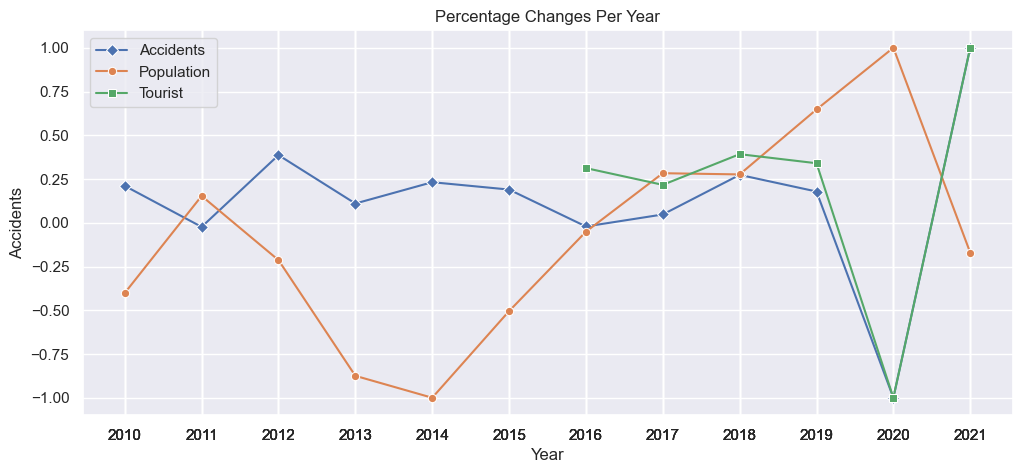

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='PCS', data=accidents_per_year,marker='D',label='Accidents')
sns.lineplot(x='Year', y='PCS', data=population_data,marker='o',label=  'Population')
sns.lineplot(x='Year', y='PCS', data=tourist_hiker_data,marker='s',label = 'Tourist')
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.title('Percentage Changes Per Year')
plt.legend()
plt.xticks(Yearly_trends['Year'])
plt.show()

**Percentage Change of Accident over Population**

*Girona*

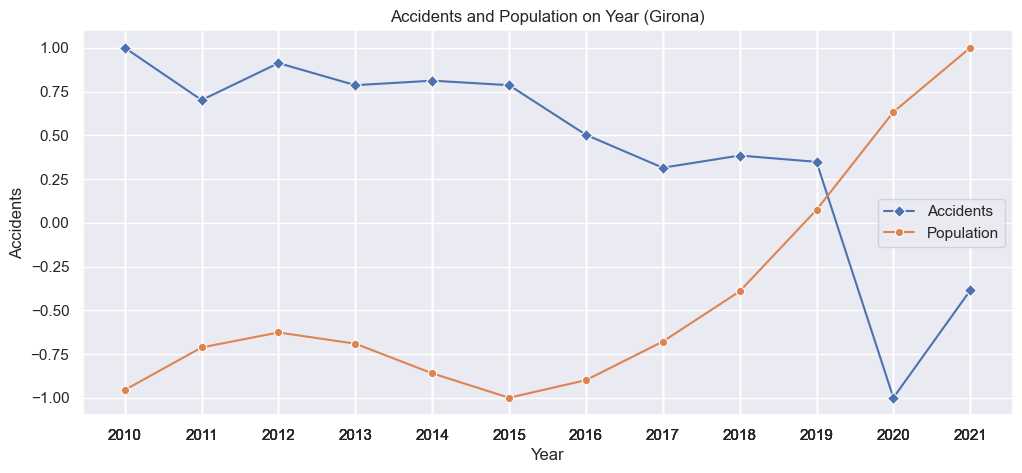

In [ ]:
Girona = scaled_yearly_trends.loc[scaled_yearly_trends['Province Name ']=='Girona']
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='Accidents',  data=Girona,marker='D',label=  'Accidents')
sns.lineplot(x='Year', y='Girona', data=scaled_population_data,marker='o',label=  'Population')
plt.xlabel('Year')
plt.legend()
plt.ylabel('Accidents')
plt.title('Accidents and Population on Year (Girona)')
plt.xticks(Yearly_trends['Year'])
plt.show()

*Lleida*

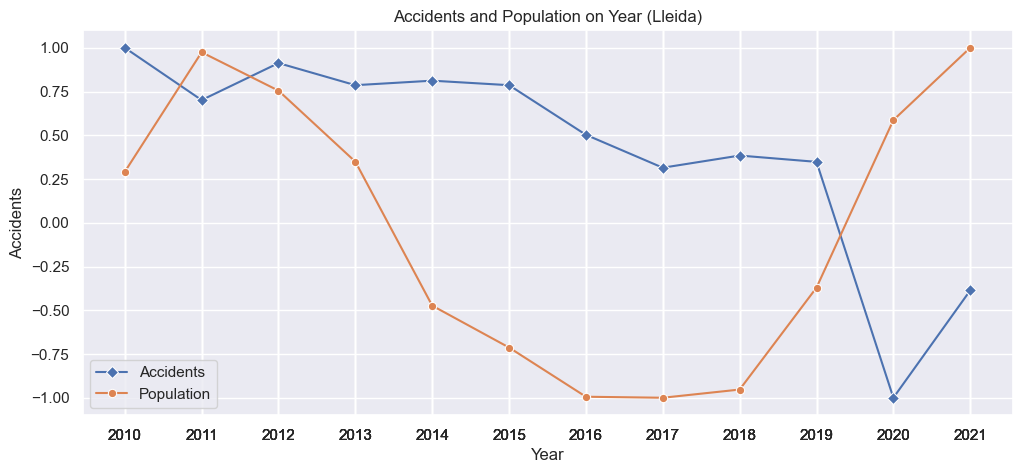

In [ ]:
Lleida = scaled_yearly_trends.loc[scaled_yearly_trends['Province Name ']=='Lleida']
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='Accidents',  data=Lleida,marker='D',label=  'Accidents')
sns.lineplot(x='Year', y='Lleida', data=scaled_population_data,marker='o',label=  'Population')
plt.xlabel('Year')
plt.legend()
plt.ylabel('Accidents')
plt.title('Accidents and Population on Year (Lleida)')
plt.xticks(Yearly_trends['Year'])
plt.show()

*Tarragona*

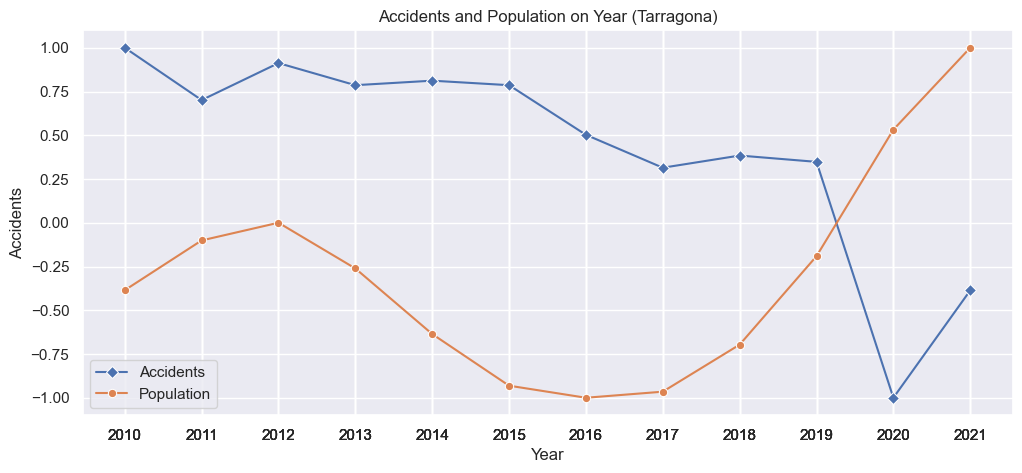

In [ ]:
Tarragona = scaled_yearly_trends.loc[scaled_yearly_trends['Province Name ']=='Tarragona']
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='Accidents',  data=Tarragona,marker='D',label=  'Accidents')
sns.lineplot(x='Year', y='Tarragona', data=scaled_population_data,marker='o',label=  'Population')
plt.xlabel('Year')
plt.legend()
plt.ylabel('Accidents')
plt.title('Accidents and Population on Year (Tarragona)')
plt.xticks(Yearly_trends['Year'])
plt.show()

*Barcelona*

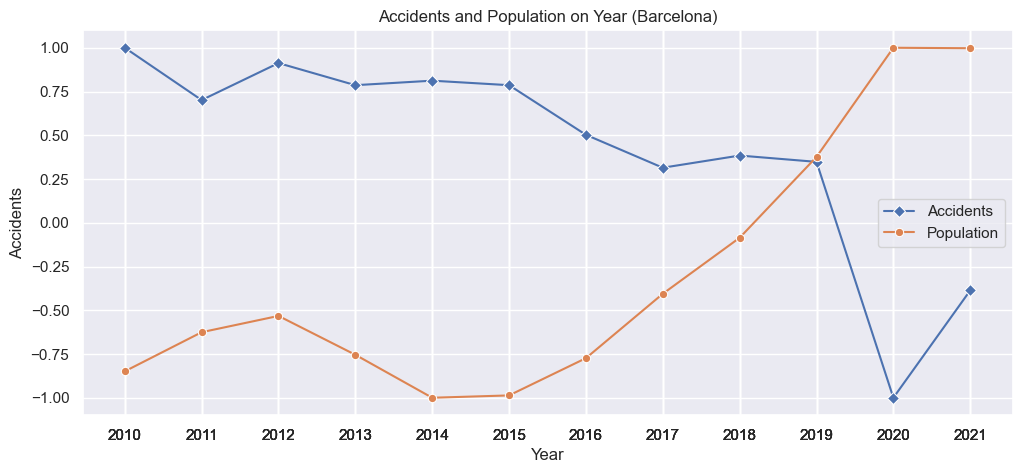

In [ ]:
barcelona = scaled_yearly_trends.loc[scaled_yearly_trends['Province Name ']=='Barcelona']
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='Accidents',  data=barcelona,marker='D',label=  'Accidents')
sns.lineplot(x='Year', y='Barcelona', data=scaled_population_data,marker='o',label=  'Population')
plt.xlabel('Year')
plt.legend()
plt.ylabel('Accidents')
plt.title('Accidents and Population on Year (Barcelona)')
plt.xticks(Yearly_trends['Year'])
plt.show()

**Total victims per Year**

In [ ]:
count_2012 = Yearly_trends.loc[Yearly_trends['Year'] == 2012, 'Total Victims '].values[0]
count_2021 = Yearly_trends.loc[Yearly_trends['Year'] == 2021, 'Total Victims '].values[0]

# Calculate the percentage reduction
percentage_reduction = ((count_2012 - count_2021) / count_2012) * 100

print(f"Percentage Reduction from 2012 to 2021: {percentage_reduction:.2f}%")

Percentage Reduction from 2012 to 2021: 33.55%


In [ ]:
count_2012 = Yearly_trends.loc[Yearly_trends['Year'] == 2012, 'Fatalties'].values[0]
count_2021 = Yearly_trends.loc[Yearly_trends['Year'] == 2021, 'Fatalties'].values[0]

# Calculate the percentage reduction
percentage_reduction = ((count_2012 - count_2021) / count_2012) * 100

print(f"Percentage Reduction from 2012 to 2021: {percentage_reduction:.2f}%")

Percentage Reduction from 2012 to 2021: 37.78%


*Total Victims Per Year by Province*

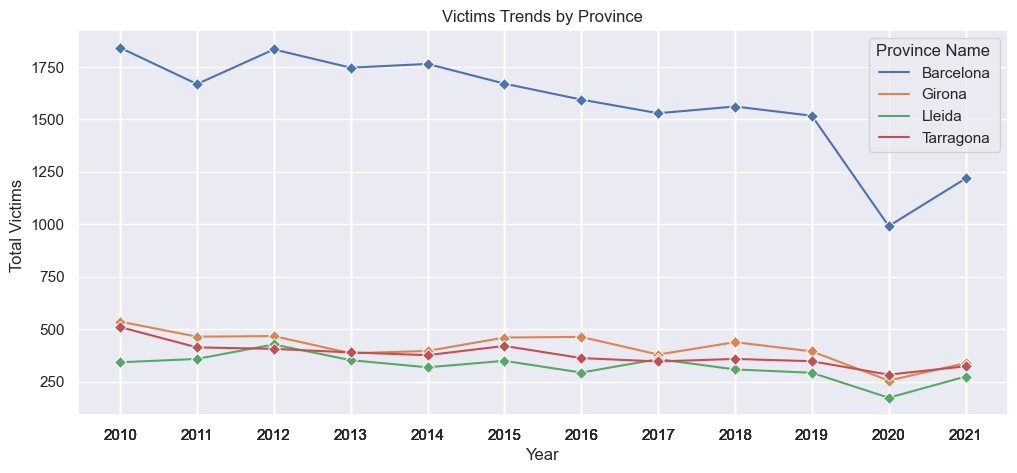

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='Total Victims ',hue='Province Name ', data=Yearly_trends,marker='D')
plt.xlabel('Year')
plt.ylabel('Total Victims ')
plt.title('Victims Trends by Province')
plt.xticks(Yearly_trends['Year'])
plt.show()

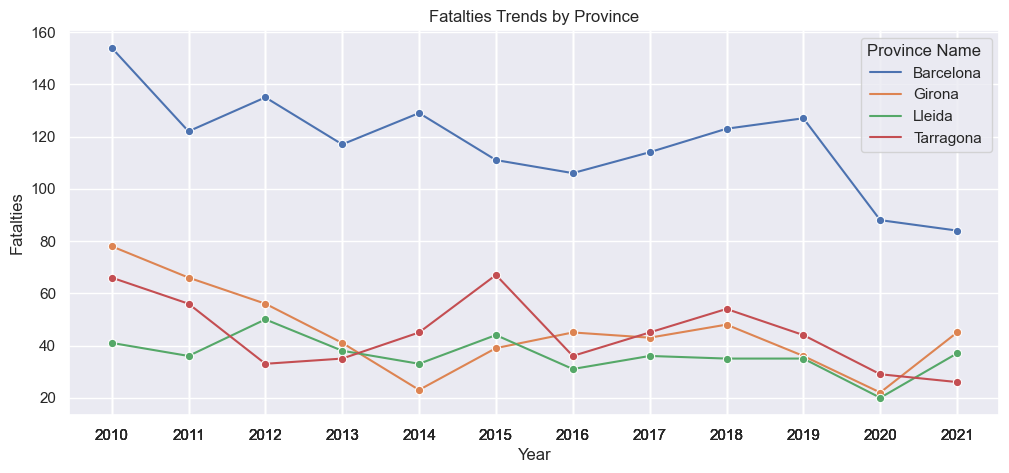

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='Fatalties',hue='Province Name ', data=Yearly_trends,marker='o')
plt.xlabel('Year')
plt.ylabel('Fatalties')
plt.title('Fatalties Trends by Province')
plt.xticks(Yearly_trends['Year'])
plt.show()

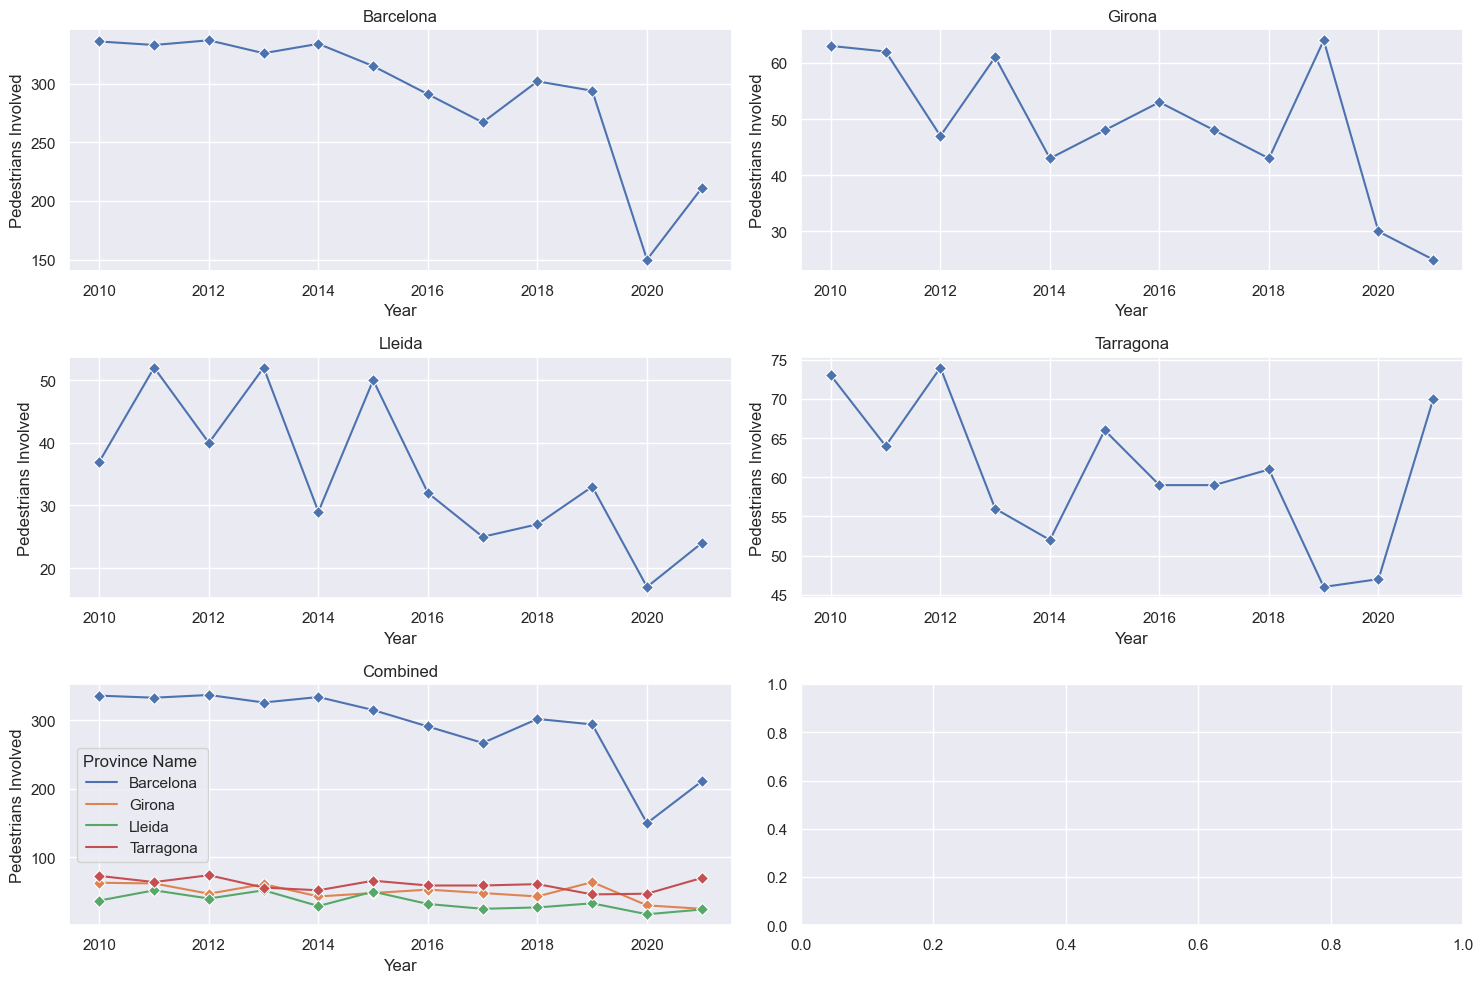

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# List of provinces
provinces = Yearly_trends['Province Name '].unique()

# Loop through provinces and plot on the subplots
for i, province in enumerate(provinces):
    row, col = divmod(i, 2)  # Calculate row and column index
    ax = axes[row, col]  # Get the current axis
    province_data = Yearly_trends[Yearly_trends['Province Name '] == province]
    sns.lineplot(x='Year', y='Pedestrains Involved', data=province_data, marker='D', ax=ax)
    ax.set_title(province)
    ax.set_xlabel('Year')
    ax.set_ylabel('Pedestrians Involved')

# Create the combined plot in the last row
combined_ax = axes[-1, :]
sns.lineplot(x='Year', y='Pedestrains Involved', hue='Province Name ', data=Yearly_trends, marker='D', ax=combined_ax[0])
combined_ax[0].set_title('Combined')
combined_ax[0].set_xlabel('Year')
combined_ax[0].set_ylabel('Pedestrians Involved')

# Adjust layout
plt.tight_layout()
plt.show()


**Injures**

C:\Users\user\AppData\Local\Temp\ipykernel_1232\1043673740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Serious Injury Bins'] = pd.cut(data_no_outliers['Serious Injuries '], bins=bins, labels=labels, right=False)


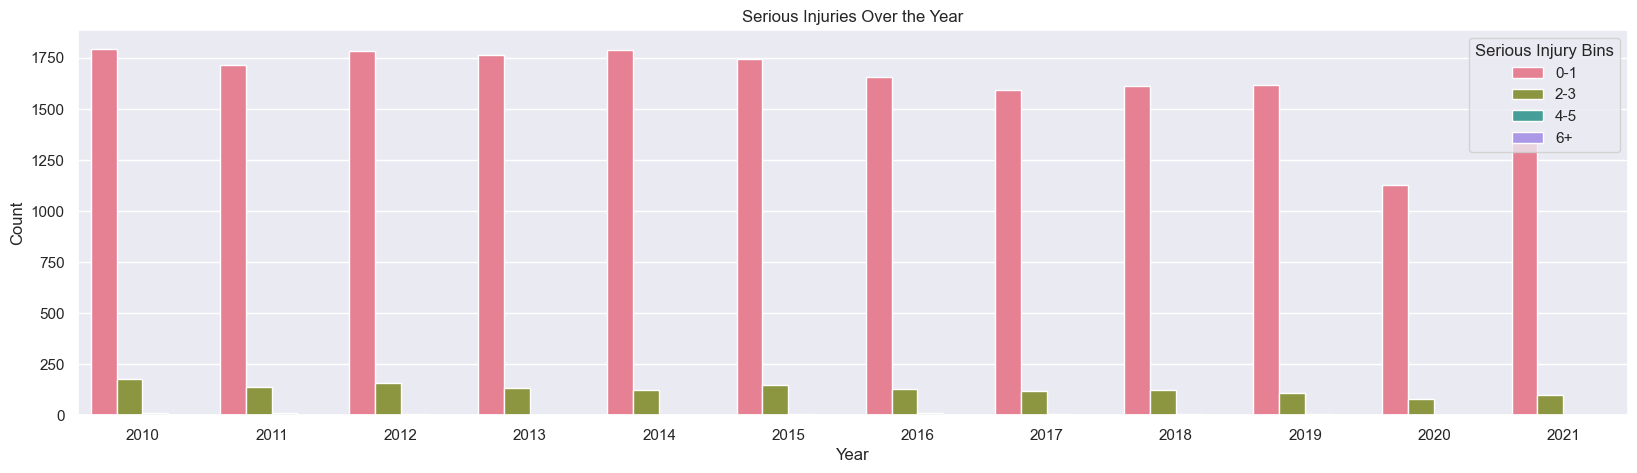

In [ ]:

bins = [0, 2, 4, 6, float('inf')]  # Define bin edges
labels = ['0-1', '2-3', '4-5', '6+']  # Define bin labels
data_no_outliers['Serious Injury Bins'] = pd.cut(data_no_outliers['Serious Injuries '], bins=bins, labels=labels, right=False)
Serious_Injuries = data_no_outliers.groupby(['Year','Serious Injury Bins'])['Year'].size().reset_index(name='Count').copy()

plt.figure(figsize=(20,5))
sns.barplot(x='Year',hue='Serious Injury Bins',y='Count',data=Serious_Injuries,palette='husl')
plt.title('Serious Injuries Over the Year')
plt.show()

In [ ]:

bins = [0, 2, 4, 6, float('inf')]  # Define bin edges
labels = ['0-1', '2-3', '4-5', '6+']  # Define bin labels
data_no_outliers['Light Injury Bins'] = pd.cut(data_no_outliers['Light Injuries '], bins=bins, labels=labels, right=False)
Light_Injuries = data_no_outliers.groupby(['Year','Light Injury Bins'])['Year'].size().reset_index(name='Count').copy()


C:\Users\user\AppData\Local\Temp\ipykernel_1232\2162224586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Light Injury Bins'] = pd.cut(data_no_outliers['Light Injuries '], bins=bins, labels=labels, right=False)


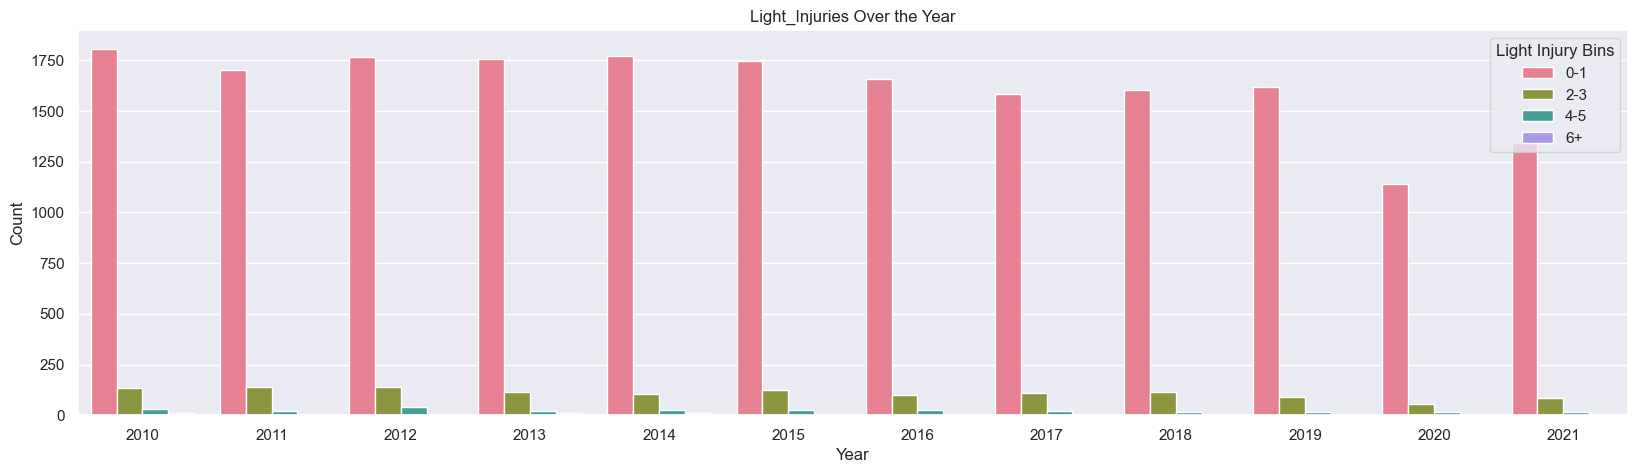

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Year',hue='Light Injury Bins',y='Count',data=Light_Injuries,palette='husl')
plt.title('Light_Injuries Over the Year')
plt.show()

*Accidents Over Months*

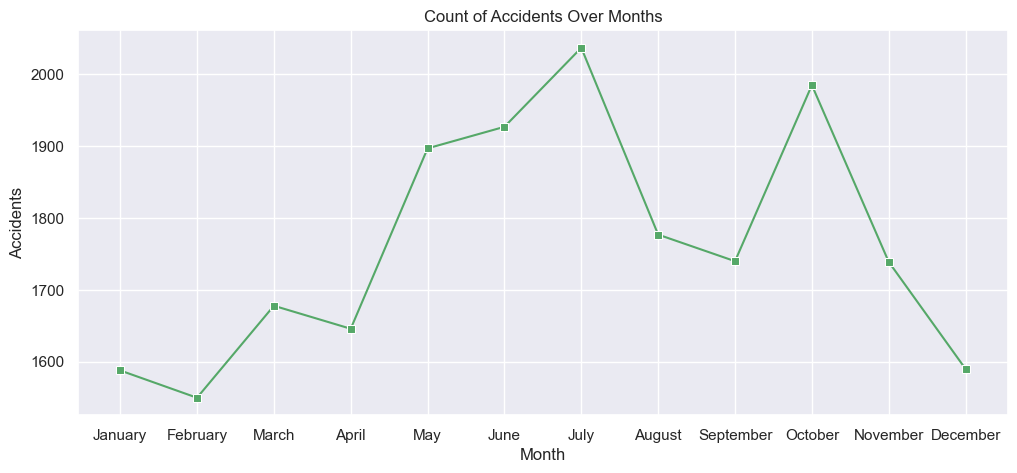

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=Month_data,x='Month', y='Count',marker='s',color='g')
plt.title('Count of Accidents Over Months')
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.show()

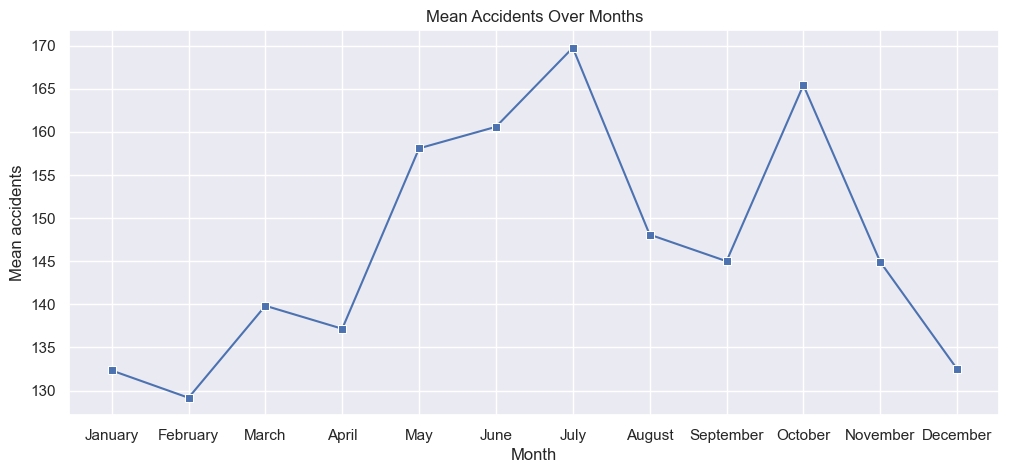

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=month_mean_year,x='Month', y='Mean',marker='s',color='b')
plt.title('Mean Accidents Over Months')
plt.xlabel('Month')
plt.ylabel('Mean accidents')
plt.show()

In [ ]:
tourist_hiker_data_monthly['Year'] = tourist_hiker_data_monthly['Date'].dt.year
tourist_hiker_data_month_mean = tourist_hiker_data_monthly.groupby('Month')['Total'].mean().reset_index(name = 'Mean_tourist')
merged_df = pd.merge(month_mean_year,tourist_hiker_data_month_mean, on='Month')
merged_df[['Mean','Mean_tourist']] = scaler.fit_transform(merged_df[['Mean','Mean_tourist']])
merged_df['Month'] = pd.Categorical(merged_df['Month'], categories=month_order, ordered=True)
merged_df.sort_values('Month',inplace=True)

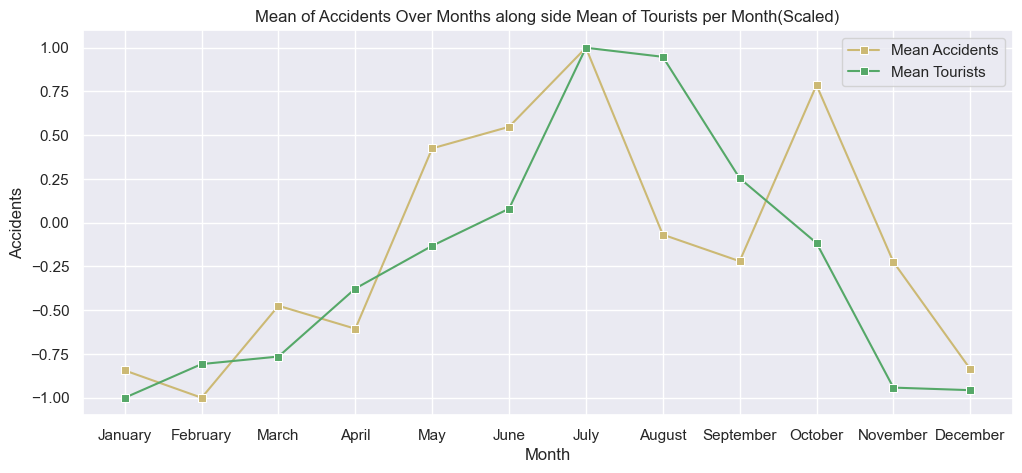

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=merged_df,x='Month', y='Mean',marker='s',color='y',label='Mean Accidents')
sns.lineplot(data=merged_df,x='Month', y='Mean_tourist',marker='s',color='g',label='Mean Tourists')
plt.title('Mean of Accidents Over Months along side Mean of Tourists per Month(Scaled)')
plt.xlabel('Month')
plt.legend()
plt.ylabel('Accidents')
plt.show()

*Monthly Accident Trends with Tourist Presence*

In [ ]:
tourist_hiker_data_quarter_mean = tourist_hiker_data_monthly.groupby('Quarter')['Total'].sum().reset_index(name = 'Count')

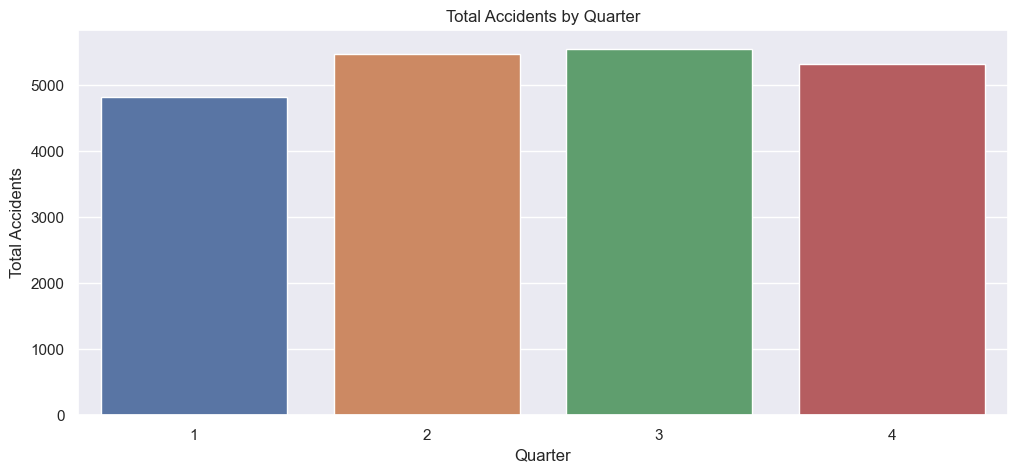

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data = Quartile_data, x='Quarter', y='Count')
plt.title('Total Accidents by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Accidents')  # Adjust rotation for better readability
plt.show()


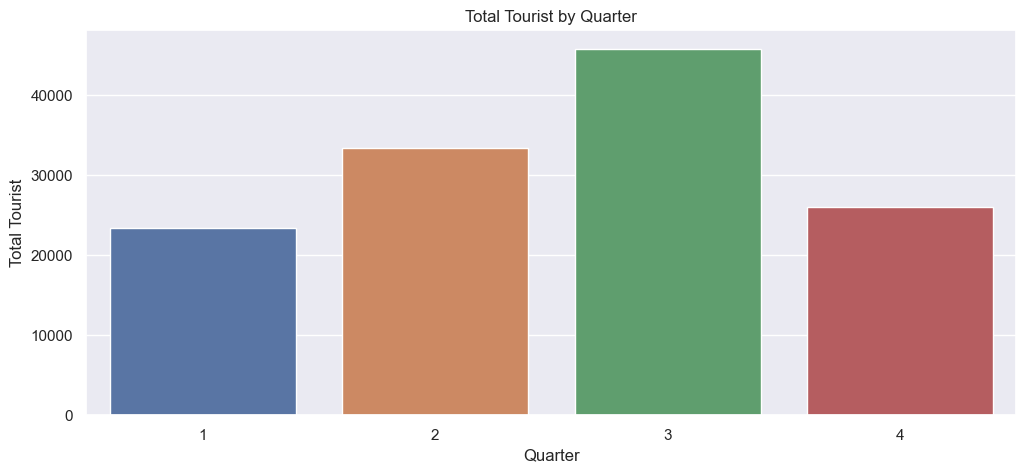

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data = tourist_hiker_data_quarter_mean, x='Quarter', y='Count')
plt.title('Total Tourist by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Tourist')
plt.show()


**Time related data**

In [ ]:
timing_data = data_no_outliers[['Year','Date ','Day of the Week Grouping ', 'Hour of Day', 'Time of Day Grouping ','Pedestrains Involved','Bicycles Involved',
       'Type of Accident ', 'Day Type','Area','Province Name ','Fatalties','Subtype of Accident','Severity of Accident ']].copy()

timing_data['Day of the Week'] = timing_data['Date '].dt.day_name()
day_type = {'dill-dij':'Mon-Thu','dg':'Sun','dis':'Sat', 'div':'Fri'}
timing_data.loc[:, 'Day Type'] = timing_data['Day Type'].map(day_type)
timing_data.reset_index(drop=True,inplace=True)
timing_data['Time Group'] = pd.cut(timing_data['Hour of Day'], bins=[0,4,8,12,16,20], labels=['Midnight - 3:59am', '4 - 7:59am', '8 - 11:59am', 'Noon - 3:59pm', '4 - 7:59pm'])

accidents_by_day_type = timing_data.groupby(['Year', 'Day of the Week'])['Year'].size().reset_index(name="Count")#.groupby(['Day of the Week'])['Count'].sum().reset_index(name='Count')
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_by_day_type = accidents_by_day_type.sort_values(by='Year')
accidents_by_day_type_v2 = timing_data.groupby(['Year', 'Day of the Week'])['Year'].size().reset_index(name="Count").groupby(['Day of the Week'])['Count'].sum().reset_index(name='Count')
accidents_by_day_type_v2['Day of the Week'] = pd.Categorical(accidents_by_day_type_v2['Day of the Week'], categories=weekday_order, ordered=True)
accidents_by_day_type_v2 = accidents_by_day_type_v2.sort_values(by='Day of the Week')

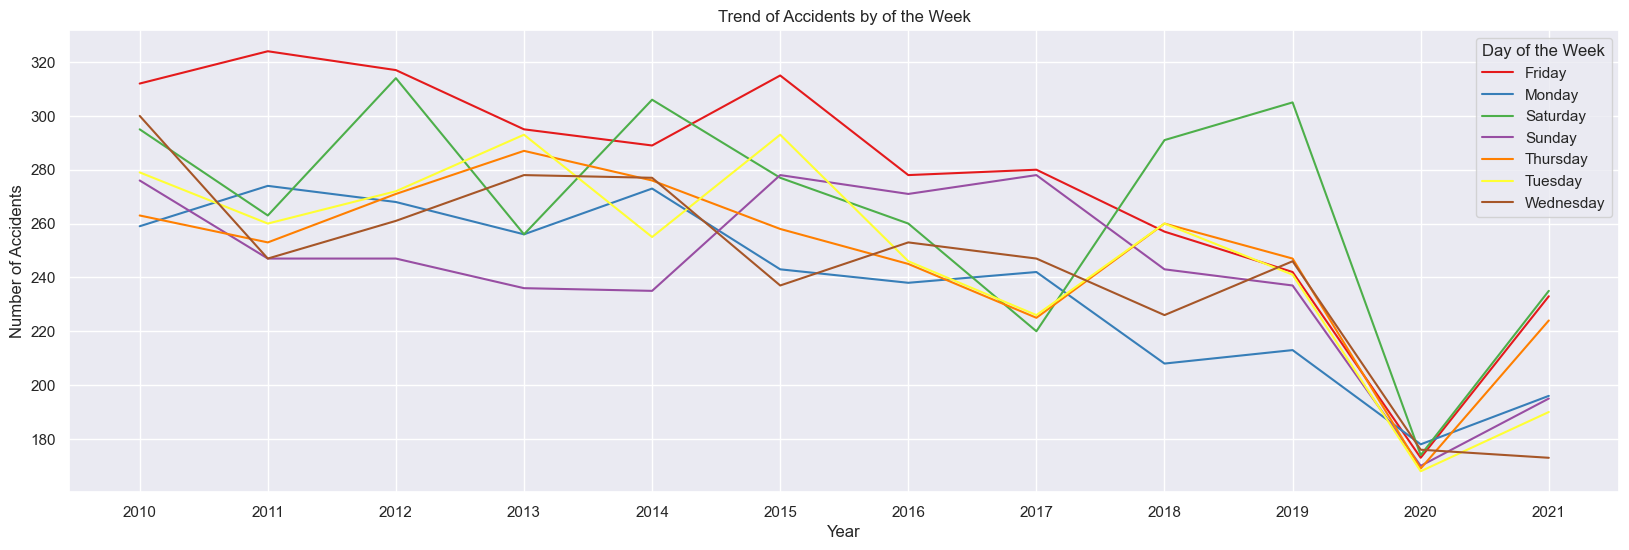

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Year',y='Count', hue='Day of the Week', data=accidents_by_day_type, palette='Set1')
plt.title('Trend of Accidents by of the Week')
plt.xlabel('Year')
plt.xticks(accidents_by_day_type['Year'].unique())
plt.ylabel('Number of Accidents')
plt.show()

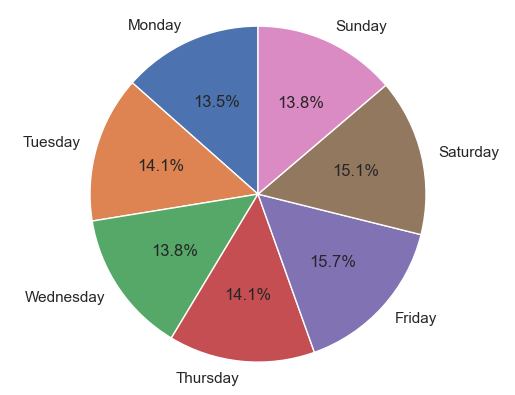

In [ ]:
plt.pie(accidents_by_day_type_v2['Count'], labels=accidents_by_day_type_v2['Day of the Week'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

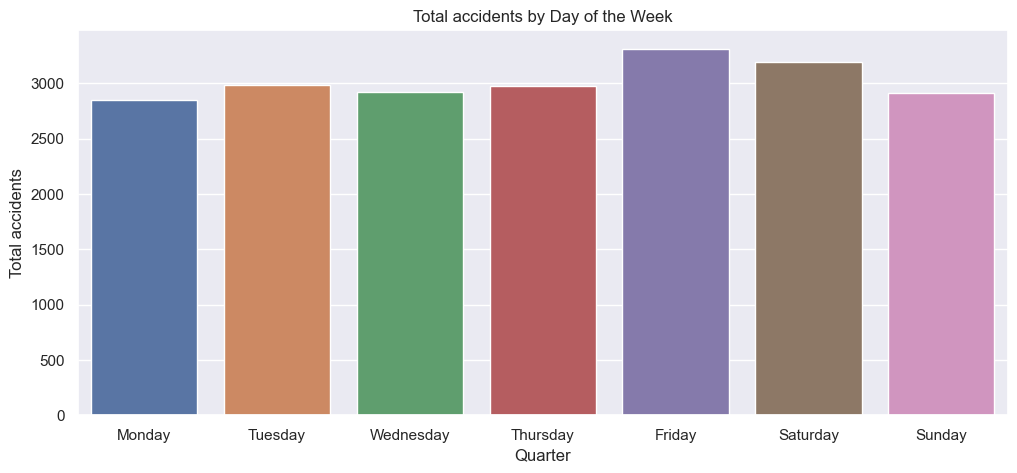

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data = accidents_by_day_type_v2, x='Day of the Week', y='Count')
plt.title('Total accidents by Day of the Week')
plt.xlabel('Quarter')
plt.ylabel('Total accidents')
plt.show()


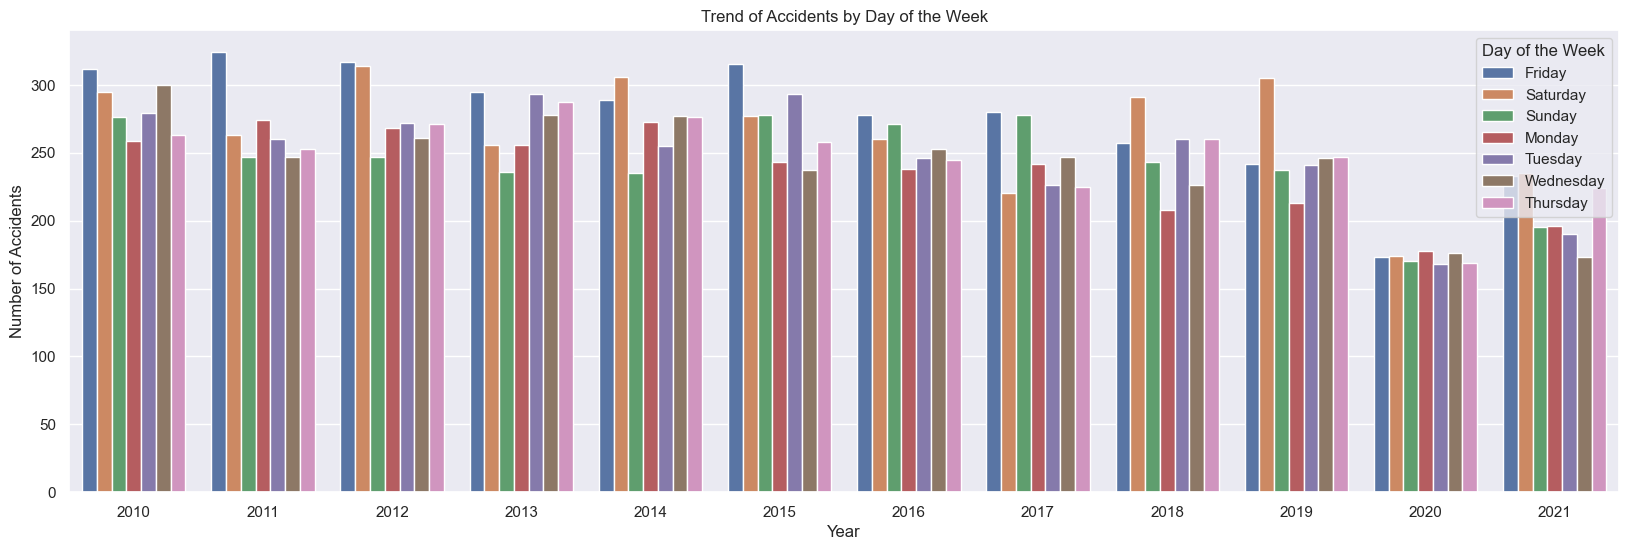

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Year', hue='Day of the Week', data=timing_data,)
plt.title('Trend of Accidents by Day of the Week')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

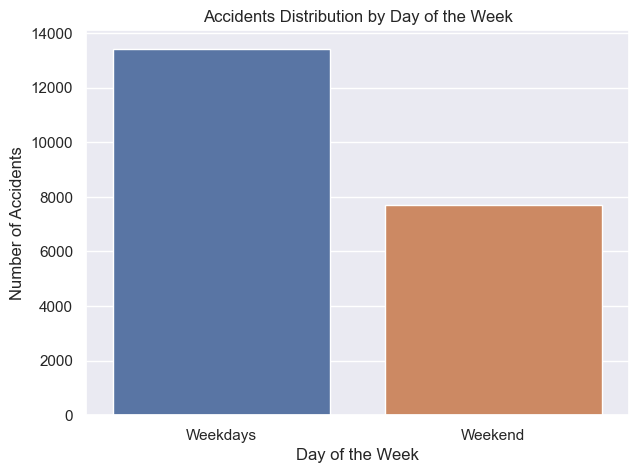

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=timing_data, x='Day of the Week Grouping ')
plt.title('Accidents Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')

plt.show()


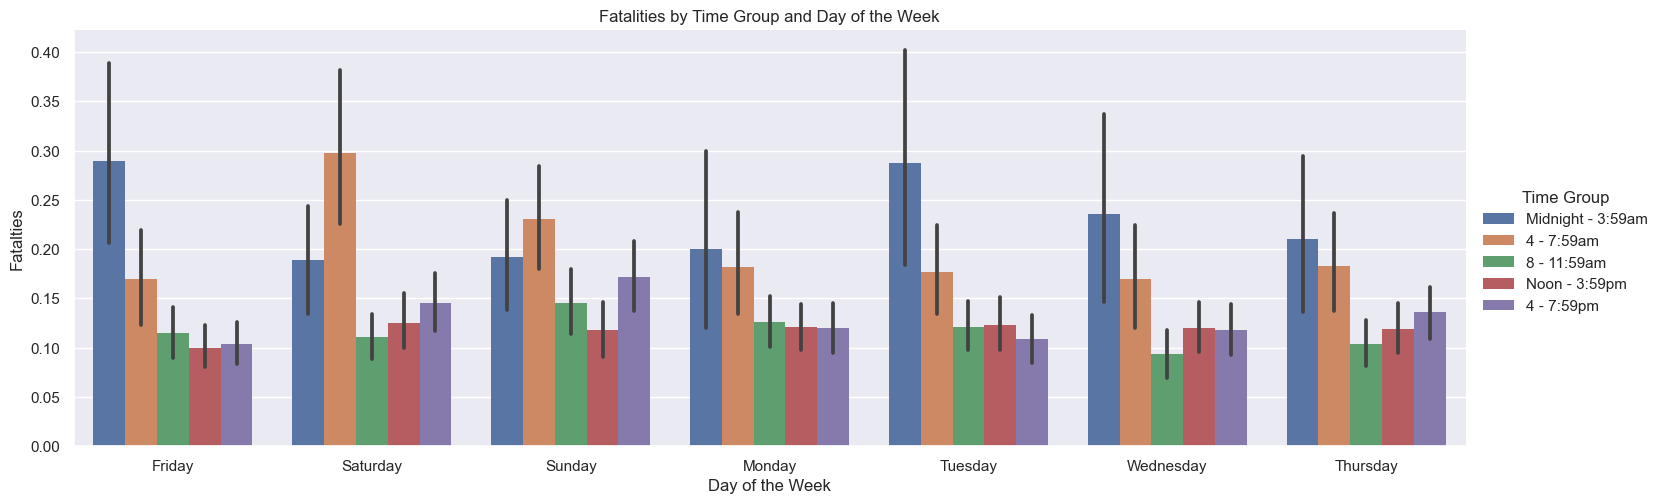

In [ ]:
sns.catplot(x='Day of the Week', y='Fatalties', hue='Time Group', kind='bar', data=timing_data,height=5, aspect=3,linewidth=0)
plt.title('Fatalities by Time Group and Day of the Week')
plt.show()

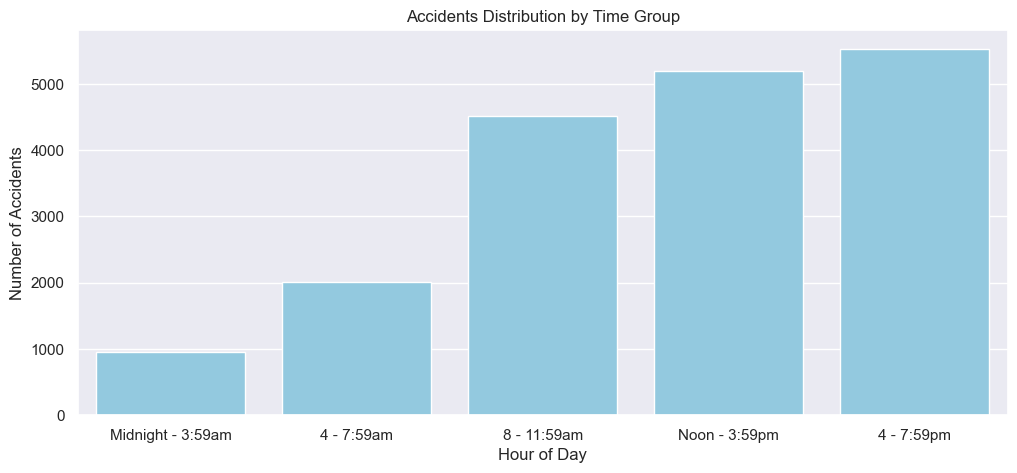

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=timing_data['Time Group'], color='skyblue')

# Set the title and axis labels
plt.title('Accidents Distribution by Time Group')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')

plt.show()

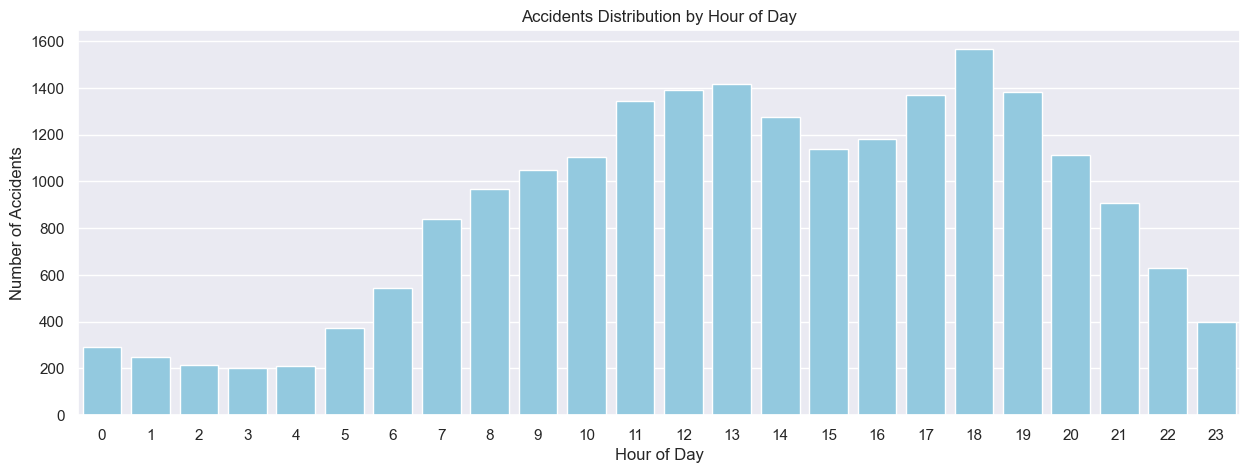

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=timing_data['Hour of Day'].astype('int64'), color='skyblue')

# Set the title and axis labels
plt.title('Accidents Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')

plt.show()

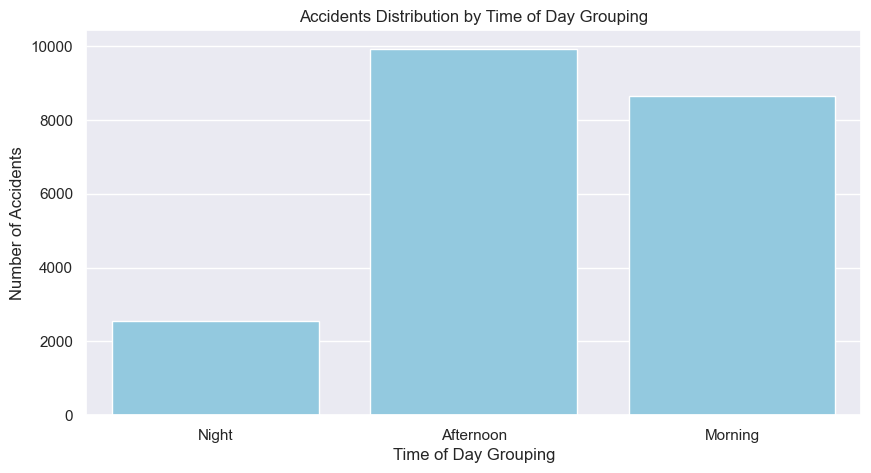

In [ ]:

plt.figure(figsize=(10,5))
sns.countplot(data=timing_data, x='Time of Day Grouping ',color='skyblue')
# Set the title and axis labels
plt.title('Accidents Distribution by Time of Day Grouping')
plt.xlabel('Time of Day Grouping')
plt.ylabel('Number of Accidents')

plt.show()
bins = [-1, 1, 3, 5, 10,float('inf')]  # You can customize the bin edges as needed
labels = ['0-1', '2-3', '4-5', '6-10','10+']
timing_data['Pedestrians Bin'] = pd.cut(timing_data['Pedestrains Involved'], bins=bins, labels=labels)
pedestrian_bins = timing_data.groupby(['Time Group','Pedestrians Bin'])['Time Group'].count().reset_index(name='Count')
pedestrian_bins['Count'] = scaler.fit_transform(pedestrian_bins['Count'].to_numpy().reshape(-1,1))

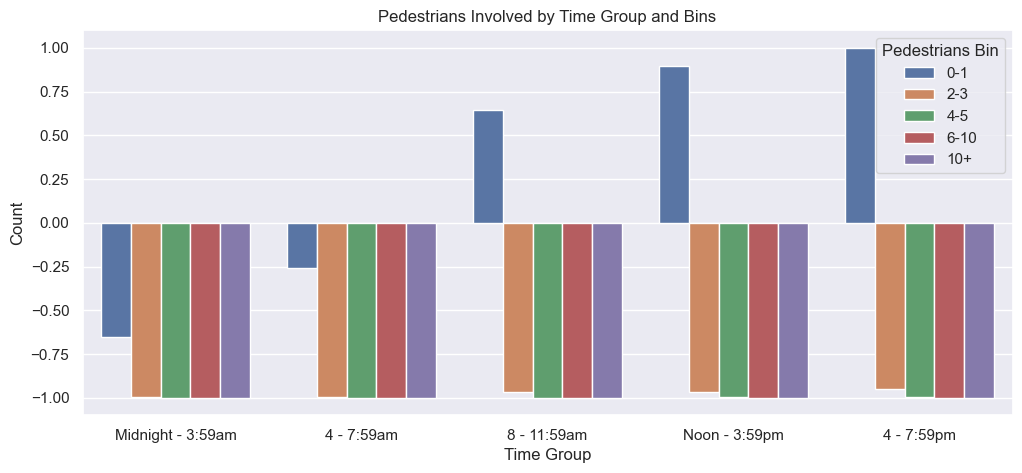

In [ ]:
plt.figure(figsize=(12, 5))

sns.barplot(x='Time Group', y='Count', hue='Pedestrians Bin', data=pedestrian_bins)

plt.title('Pedestrians Involved by Time Group and Bins')
plt.xlabel('Time Group')
plt.ylabel('Count')

plt.show()

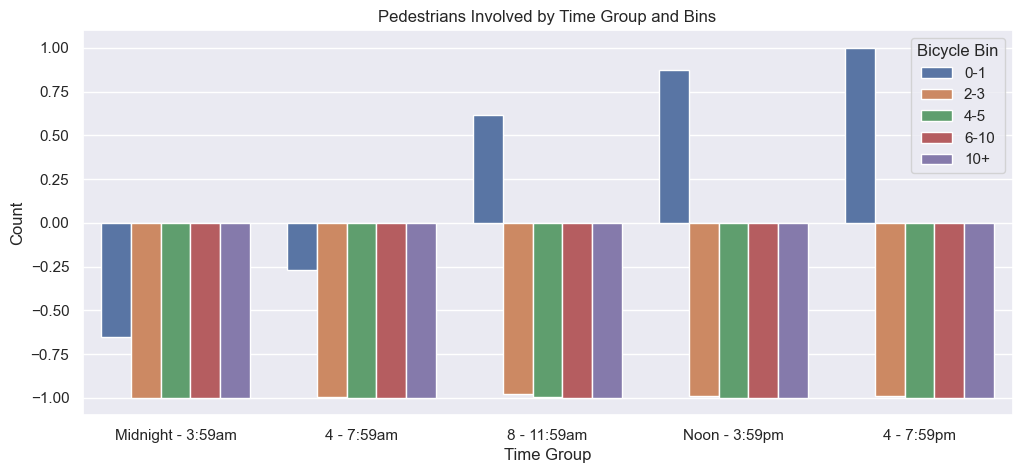

In [ ]:
bins = [-1, 1, 3, 5, 10,float('inf')]  # You can customize the bin edges as needed
labels = ['0-1', '2-3', '4-5', '6-10','10+']
timing_data['Bicycle Bin'] = pd.cut(timing_data['Bicycles Involved'], bins=bins, labels=labels)
bicycle_bins = timing_data.groupby(['Time Group','Bicycle Bin'])['Time Group'].count().reset_index(name='Count')
bicycle_bins['Count'] = scaler.fit_transform(bicycle_bins['Count'].to_numpy().reshape(-1,1))
plt.figure(figsize=(12, 5))

sns.barplot(x='Time Group', y='Count', hue='Bicycle Bin', data=bicycle_bins)

plt.title('Pedestrians Involved by Time Group and Bins')
plt.xlabel('Time Group')
plt.ylabel('Count')

plt.show()

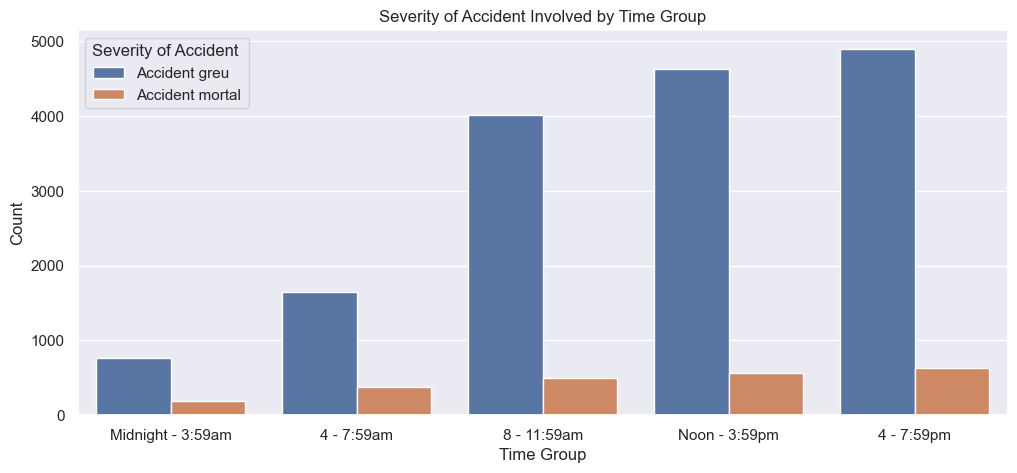

In [ ]:
plt.figure(figsize=(12,5))
Severity_bins = timing_data.groupby(['Time Group','Severity of Accident '])['Time Group'].count().reset_index(name='Count')
sns.barplot(x='Time Group', y='Count', hue='Severity of Accident ', data=Severity_bins)

plt.title('Severity of Accident Involved by Time Group')
plt.xlabel('Time Group')
plt.ylabel('Count')

plt.show()

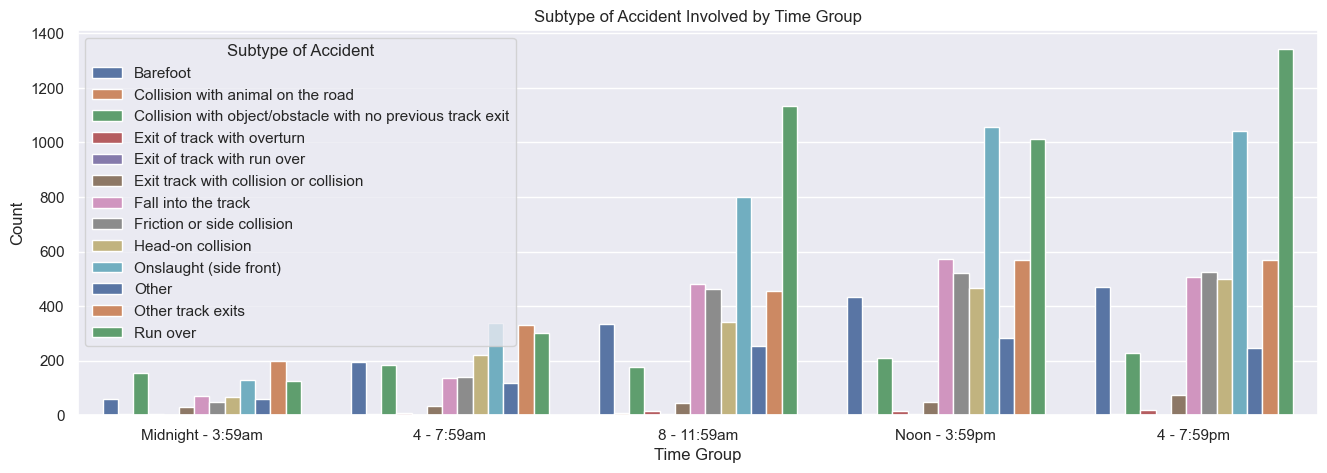

In [ ]:
plt.figure(figsize=(16,5))
Subtype_bins = timing_data.groupby(['Time Group','Subtype of Accident'])['Time Group'].count().reset_index(name='Count')
sns.barplot(x='Time Group', y='Count', hue='Subtype of Accident', data=Subtype_bins,palette='deep')

plt.title('Subtype of Accident Involved by Time Group')
plt.xlabel('Time Group')
plt.ylabel('Count')

plt.show()

## **Accidents Influences Total Findings:**


### **Environment**
- *Since 2019, the number of accidents related to road surfaces has consistently decreased. This implies that maintenance procedures and road conditions should be improved.*


- *Similarly, since 2012, the number of lightning-related accidents has decreased in a comparable manner. This may suggest that the efficacy of weather predicting and warning systems is increasing.*


- *The majority of incidents happen on city highways, which include both traditional and residential routes. This highlights how crucial traffic management plans and urban planning are to lowering accident rates.*


- *The minimal impact of fog on accidents suggests that fog is not a significant cause of accidents. The majority of accidents occur in clear weather, which is consistent with this.*

- *There has been a decrease in the impact of environmental variables and visibility on accidents, indicating better environmental conditions and visibility requirements.*

- *In Barcelona, there was an increase in accidents in 2014, 2013, and 2020 that was caused by changes in road surfaces. This implies that sporadic bad road conditions may contribute to a rise in accident rates.*

- *Since 2013 and 2015, respectively, there have been fewer fog-related accidents in Tarragona and Girona. This might be the result of more successful fog mitigation strategies or decreased rates of fog occurrence in these areas.*

*Environmentally-related accidents are more common in provinces like as Barcelona, Taragona, and Lleida. This can be because of the particular environmental circumstances in these places.*

### **Summary of Findings on Environmental Influences on Accident Severity:**

Environmental factors play a crucial role in influencing the severity of accidents on the road. A detailed analysis reveals key insights into the impact of specific conditions:

- **Accidents Influenced by Special Measures:**
  - 76 severe accidents and 14 fatal accidents were directly associated with special measures taken.

- **Poor Visibility:**
  - A significant contributor, poor visibility, resulted in 654 severe accidents and 120 fatal accidents.

- **Environmental Factors:**
  - Overall environmental conditions played a role in 352 severe accidents and 91 fatal accidents.

- **Fog:**
  - Specifically, fog contributed to 25 severe accidents and 10 fatal accidents.

- **Lighting Issues:**
  - Inadequate lighting was linked to 410 severe accidents and 88 fatal accidents.

- **Road Surface Conditions:**
  - The condition of the road surface was implicated in 73 severe accidents and 9 fatal accidents.




## **Road and Traffic Features Insights:**

*An analysis of accidents involving two-wheeled vehicles reveals distinct patterns in their distribution. Bicycle accidents constitute 15.8%, while mopeds account for 14.0%, and motorcycles dominate at 70.2%. When considering heavy and light vehicles, the fatality count tends to increase with the rising number of vehicles involved. For heavy vehicles, head-on collisions and runovers exhibit higher fatality rates, while light vehicles face elevated risks in head-on collisions, runovers, and onslaughts.* 

*Moreover, the fatality rate tends to rise with increasing speed limits. Speed limits above 40 on conventional roads show a higher occurrence, with city roads at 40, 30, 20, and 10 holding significant prevalence. Two-wheeled vehicles are involved in over 50% of accidents, and incidents with these vehicles result in more severe outcomes but fewer fatalities.*

*Onslaughts, specifically side-front accidents, emerge as the most common accident type involving two-wheeled vehicles, followed by falling out of the track, friction, or side collisions. Interestingly, as moped usage decreases, fatality rates increase. This suggests a statistical anomaly where a lower sample of mopeds on the road may inflate fatality rates due to fewer instances. Contrarily, the fatality rate and count of bicycle accidents demonstrate an inverse relationship with mopeds, highlighting the need for a more nuanced interpretation of these statistics.*

These insights underscore the importance of considering vehicle types, collision scenarios, and usage patterns in formulating effective road safety measures.

### **Data Prep**

In [9]:
data_no_outliers.reset_index(drop=True,inplace=True)

In [10]:
accidents_influence = data_no_outliers[['Year','Date ','Province Name ', 'Fatalties','Serious Injuries ', 'Light Injuries ','Fog Presence ', 'Surrounding Environment',
       'Special Lane Presence', 'Special Traffic Measures',
       'Weather Conditions ', 'Special Road Functions ',
       'Severity of Accident ', 'Influence of Fog ',
       'Influence of Environment', 'Influence of Traffic',
       'Influence of Weather', 'Influence of Wind Intensity ',
       'Influence of Lighting', 'Influence of Special Measures',
       'Influence of Road Objects', 'Influence of Road Surface ',
       'Influence of Visibility ', 'Intersection Characteristics ',
       'Speed Limit Information', 'Lighting Conditions ',
       'Traffic Regulation and Priority ', 'Direction of Road',
       'Subtype of Accident', 'Subtype of Road Section ',
       'Subzone within Area', 'Road Surface Conditions ', 'Type of Road','Month','Wind Conditions ']]

In [11]:
road_type_map = {'Calma, vent molt suau':'Calm, very gentle wind ',
'Vent moderat':'Moderate wind',
'Vent fort':'Strong wind',
'Sense especificar':'Unspecified'}

accidents_influence.loc[:, 'Wind Conditions '] = accidents_influence['Wind Conditions '].map(road_type_map)

Intersection_map = {'En secció':'In section',                               
'Dintre intersecció':'Within intersection',                
'Arribant o eixint intersecció fins 50m':'Arriving or leaving intersection up to 50m'                              
}

accidents_influence.loc[:,'Intersection Characteristics '] = accidents_influence['Intersection Characteristics '].map(Intersection_map)

C:\Users\user\AppData\Local\Temp\ipykernel_20192\3999897472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_influence.loc[:, 'Wind Conditions '] = accidents_influence['Wind Conditions '].map(road_type_map)
C:\Users\user\AppData\Local\Temp\ipykernel_20192\3999897472.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_influence.loc[:,'Intersection Characteristics '] = accidents_influence['Intersection Characteristics '].map(Intersection_map)


### **Evironment Influence**

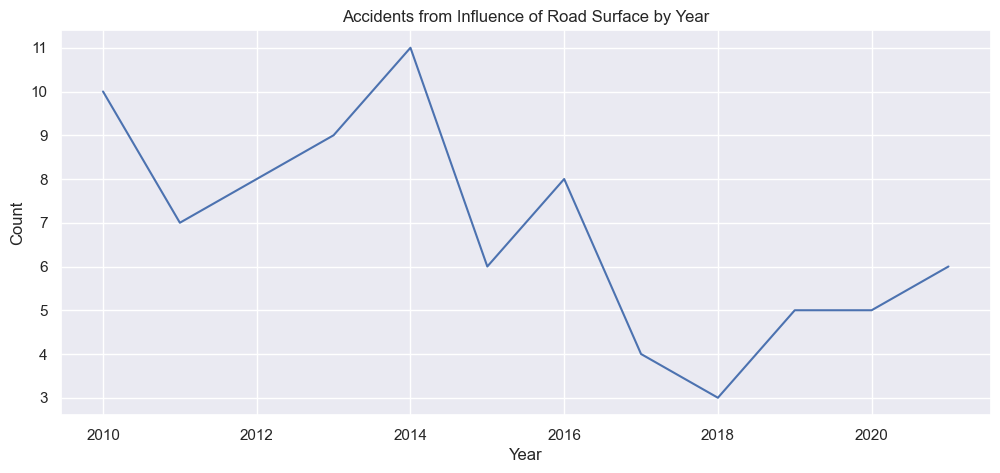

In [43]:
Road_Surface = accidents_influence.loc[accidents_influence['Influence of Road Surface ']=='Si']
Influence_Road_Surface = Road_Surface.groupby(['Influence of Road Surface ','Year']).size().reset_index(name='Count').drop('Influence of Road Surface ',axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Road_Surface)
plt.title('Accidents from Influence of Road Surface by Year')
plt.show()

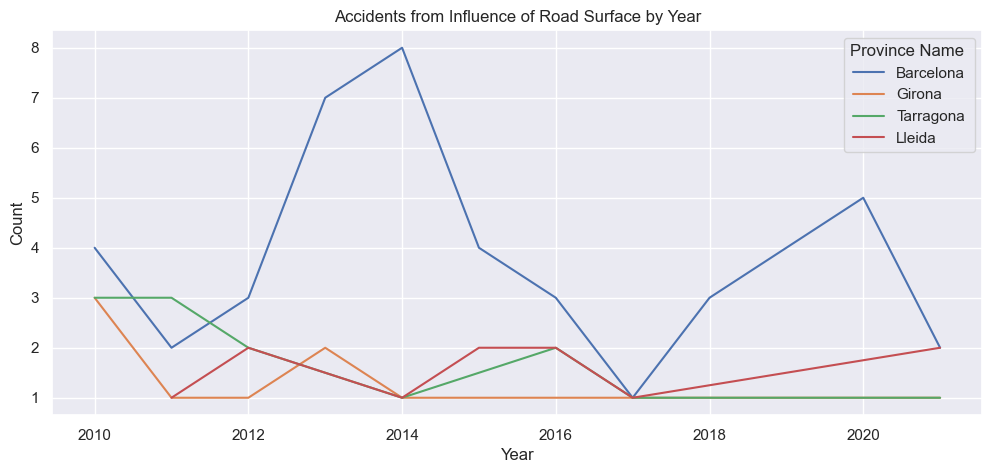

In [44]:
Influence_Road_Surface = Road_Surface.groupby(['Influence of Road Surface ','Year','Province Name ']).size().reset_index(name='Count').drop('Influence of Road Surface ',axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Road_Surface,hue='Province Name ')
plt.title('Accidents from Influence of Road Surface by Year')
plt.show()

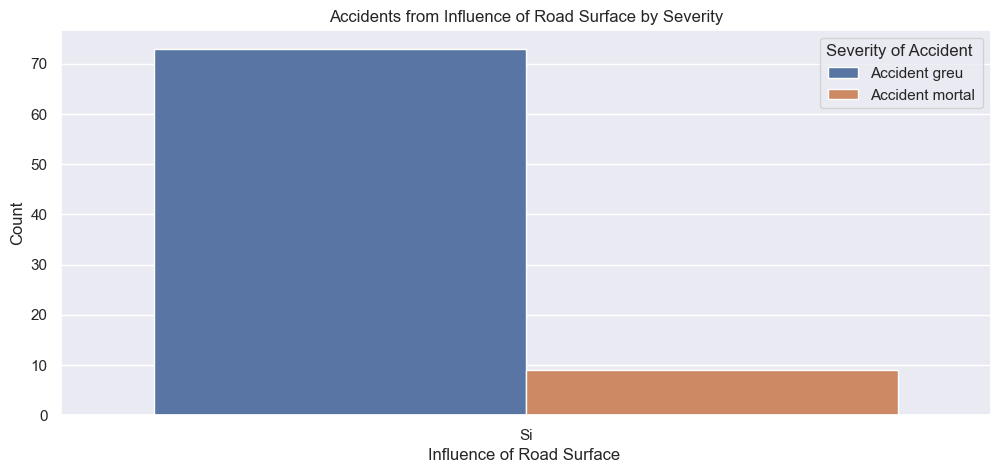

In [46]:
severity_data_road = Road_Surface.groupby(['Influence of Road Surface ','Severity of Accident ']).size().reset_index(name = 'Count')
plt.figure(figsize=(12,5))
sns.barplot(x='Influence of Road Surface ',y='Count',data=severity_data_road,hue='Severity of Accident ')
plt.title('Accidents from Influence of Road Surface by Severity')
plt.show()

In [76]:
severity_data_road

Influence of Road Surface  Severity of Accident   Count
0                         Si         Accident greu     73
1                         Si       Accident mortal      9

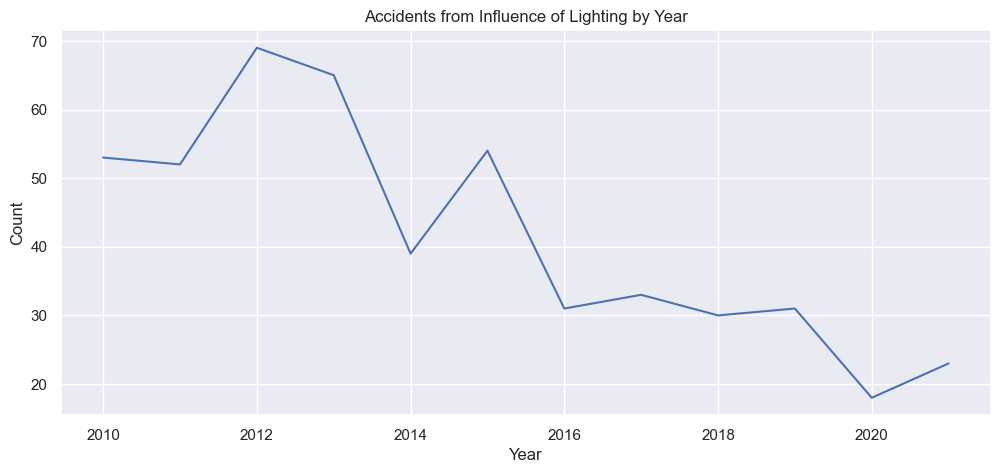

In [47]:
Lighting = accidents_influence.loc[accidents_influence['Influence of Lighting']=='Si']
Influence_Lighting = Lighting.groupby(['Influence of Lighting','Year']).size().reset_index(name='Count').drop('Influence of Lighting',axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Lighting)
plt.title('Accidents from Influence of Lighting by Year')
plt.show()

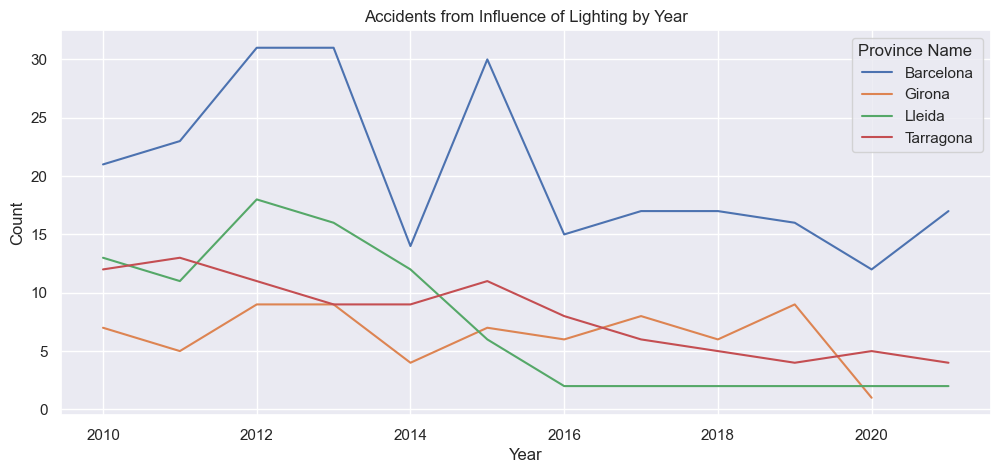

In [48]:
Lighting = accidents_influence.loc[accidents_influence['Influence of Lighting']=='Si']
Influence_Lighting = Lighting.groupby(['Influence of Lighting','Year','Province Name ']).size().reset_index(name='Count').drop('Influence of Lighting',axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Lighting,hue='Province Name ')
plt.title('Accidents from Influence of Lighting by Year')
plt.show()

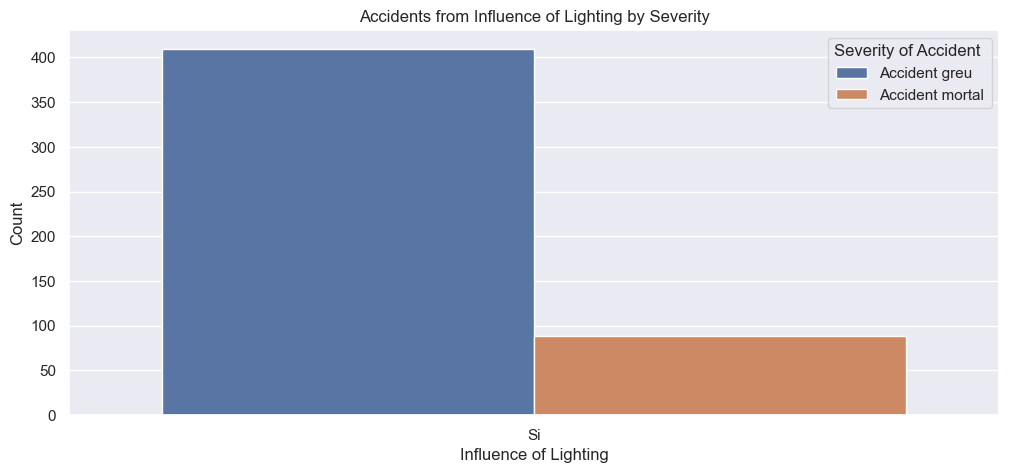

In [62]:
severity_Lighting = Lighting.groupby(['Influence of Lighting','Severity of Accident ']).size().reset_index(name = 'Count')
plt.figure(figsize=(12,5))
sns.barplot(x='Influence of Lighting',y='Count',data=severity_Lighting,hue='Severity of Accident ')
plt.title('Accidents from Influence of Lighting by Severity')
plt.show()

In [75]:
severity_Lighting

Influence of Lighting Severity of Accident   Count
0                    Si         Accident greu    410
1                    Si       Accident mortal     88

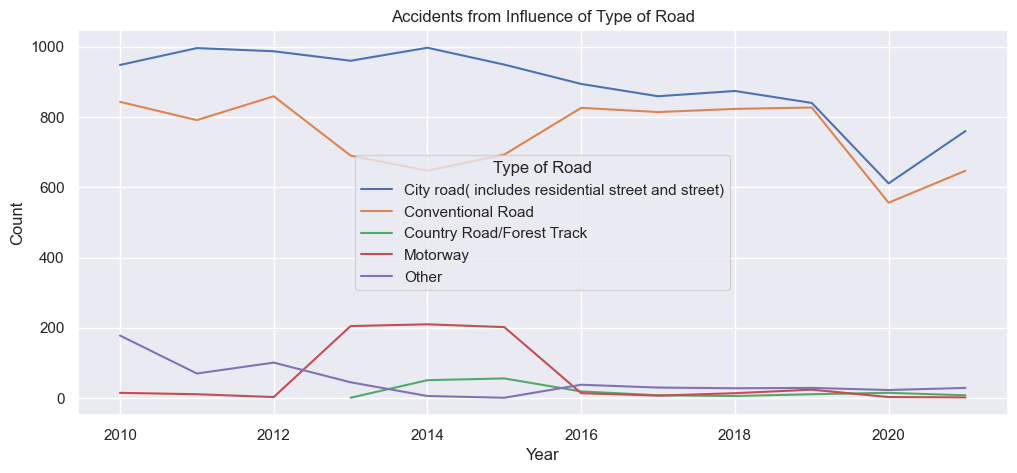

In [70]:
Influence_Type_road = accidents_influence.groupby(['Type of Road','Year']).size().reset_index(name='Count')[['Year','Type of Road','Count']]
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Type_road,hue='Type of Road')
plt.title('Accidents from Influence of Type of Road')
plt.show()

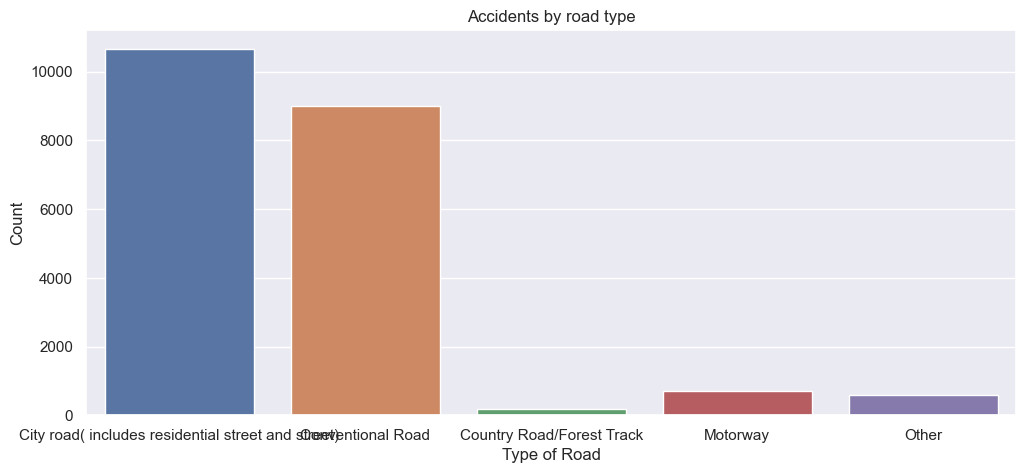

In [78]:
Type_road = accidents_influence.groupby('Type of Road').size().reset_index(name='Count')
plt.figure(figsize=(12,5))
sns.barplot(x='Type of Road',y='Count',data=Type_road)
plt.title('Accidents by road type')
plt.show()

In [79]:
Type_road

Type of Road  Count
0  City road( includes residential street and str...  10675
1                                  Conventional Road   9016
2                          Country Road/Forest Track    175
3                                           Motorway    710
4                                              Other    578

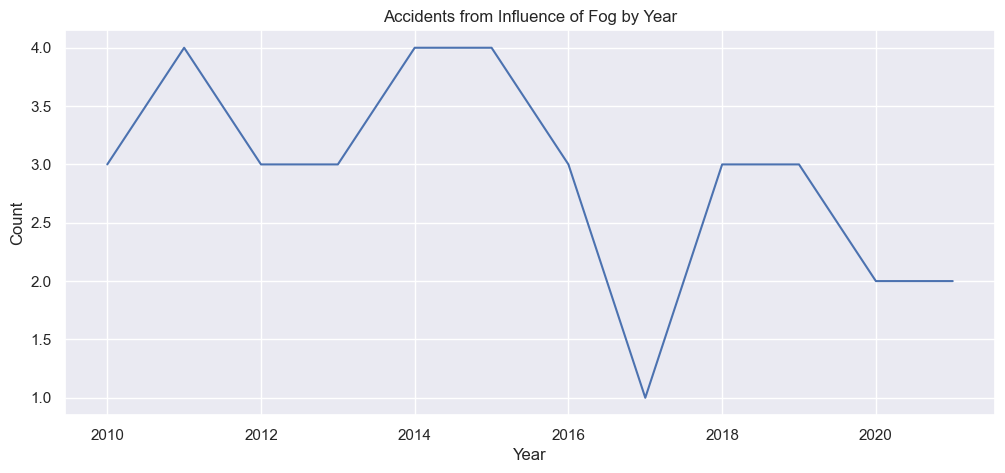

In [72]:
Fog = accidents_influence.loc[accidents_influence['Influence of Fog ']=='Si']
Influence_Fog  = Fog.groupby(['Influence of Fog ','Year']).size().reset_index(name='Count').drop('Influence of Fog ',axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Fog)
plt.title('Accidents from Influence of Fog by Year')
plt.show()

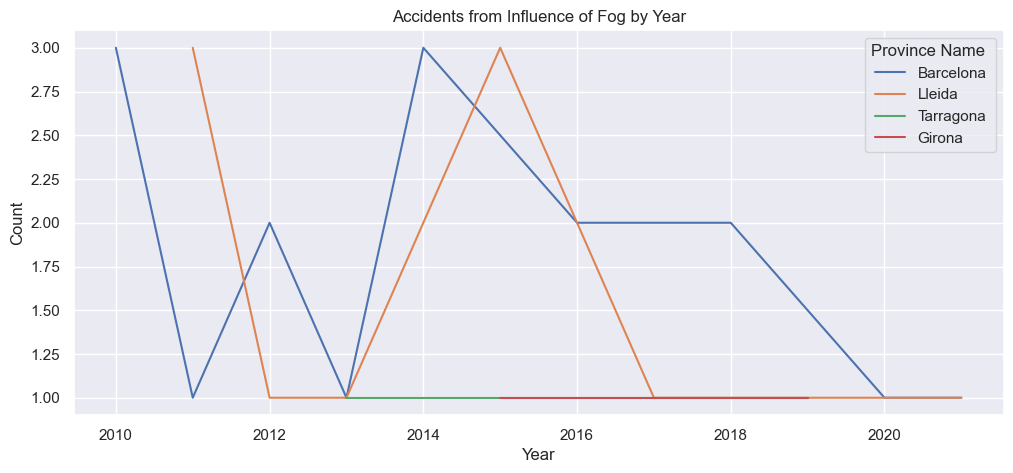

In [53]:
Fog = accidents_influence.loc[accidents_influence['Influence of Fog ']=='Si']
Influence_Fog  = Fog.groupby(['Influence of Fog ','Year','Province Name ']).size().reset_index(name='Count').drop('Influence of Fog ',axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Fog,hue='Province Name ')
plt.title('Accidents from Influence of Fog by Year')
plt.show()

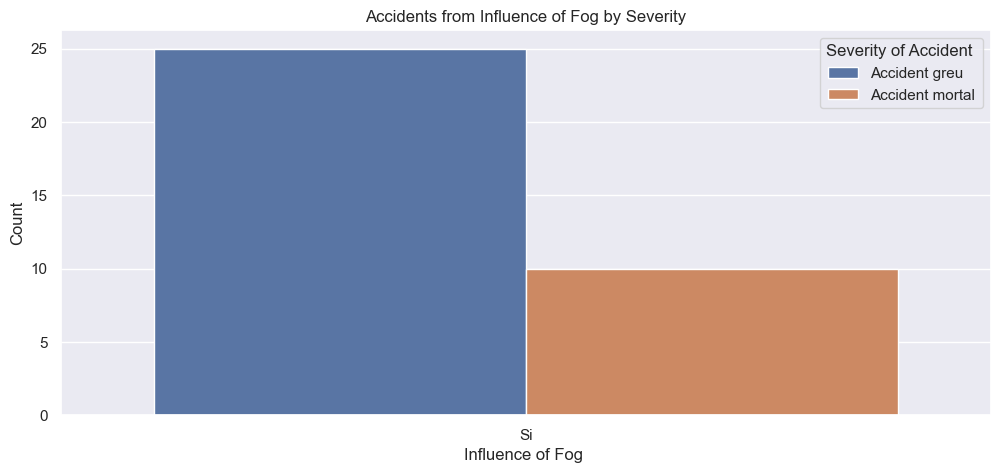

In [61]:
severity_Fog = Fog.groupby(['Influence of Fog ','Severity of Accident ']).size().reset_index(name = 'Count')
plt.figure(figsize=(12,5))
sns.barplot(x='Influence of Fog ',y='Count',data=severity_Fog,hue='Severity of Accident ')
plt.title('Accidents from Influence of Fog by Severity')
plt.show()

In [74]:
severity_Fog

Influence of Fog  Severity of Accident   Count
0                Si         Accident greu     25
1                Si       Accident mortal     10

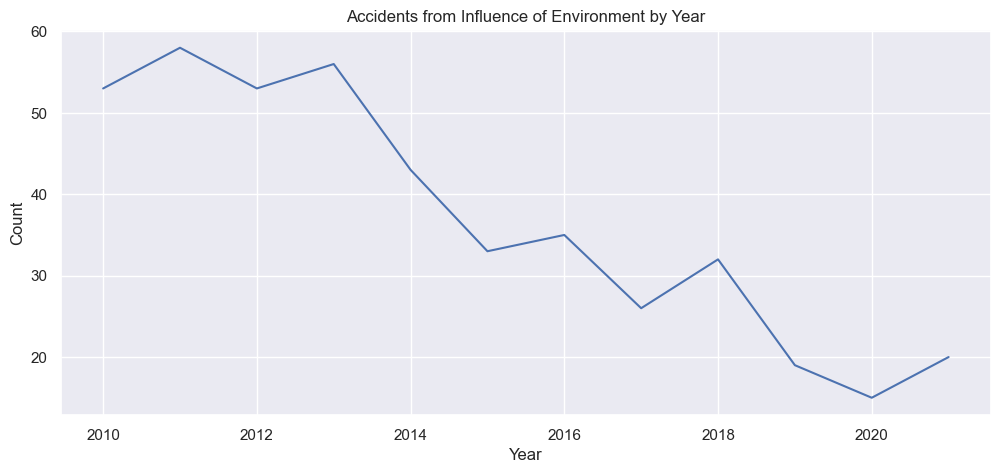

In [56]:
Environment = accidents_influence.loc[accidents_influence['Influence of Environment']=='Si']
Influence_Environment  = Environment.groupby(['Influence of Environment','Year']).size().reset_index(name='Count').drop('Influence of Environment',axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Environment)
plt.title('Accidents from Influence of Environment by Year')
plt.show()

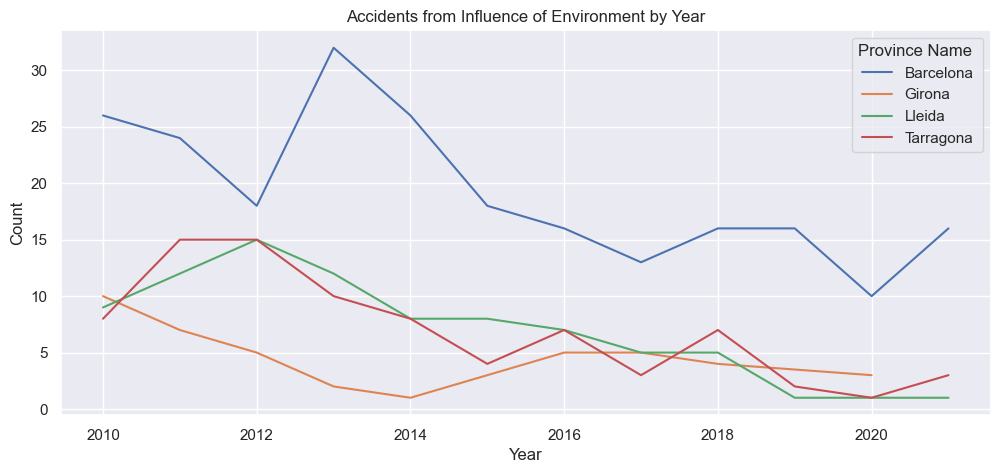

In [57]:
Environment = accidents_influence.loc[accidents_influence['Influence of Environment']=='Si']
Influence_Environment  = Environment.groupby(['Influence of Environment','Year','Province Name ']).size().reset_index(name='Count').drop('Influence of Environment',axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Environment,hue='Province Name ')
plt.title('Accidents from Influence of Environment by Year')
plt.show()

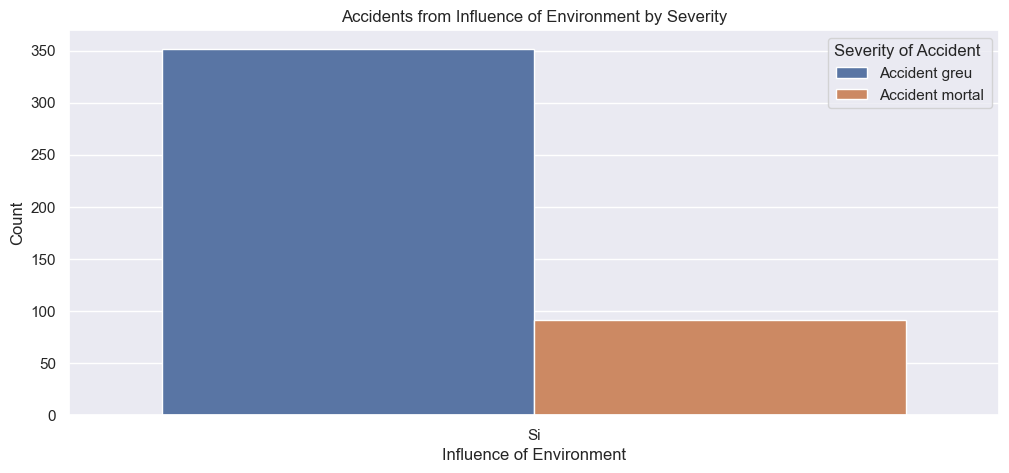

In [60]:
severity_Environment = Environment.groupby(['Influence of Environment','Severity of Accident ']).size().reset_index(name = 'Count')
plt.figure(figsize=(12,5))
sns.barplot(x='Influence of Environment',y='Count',data=severity_Environment,hue='Severity of Accident ')
plt.title('Accidents from Influence of Environment by Severity')
plt.show()

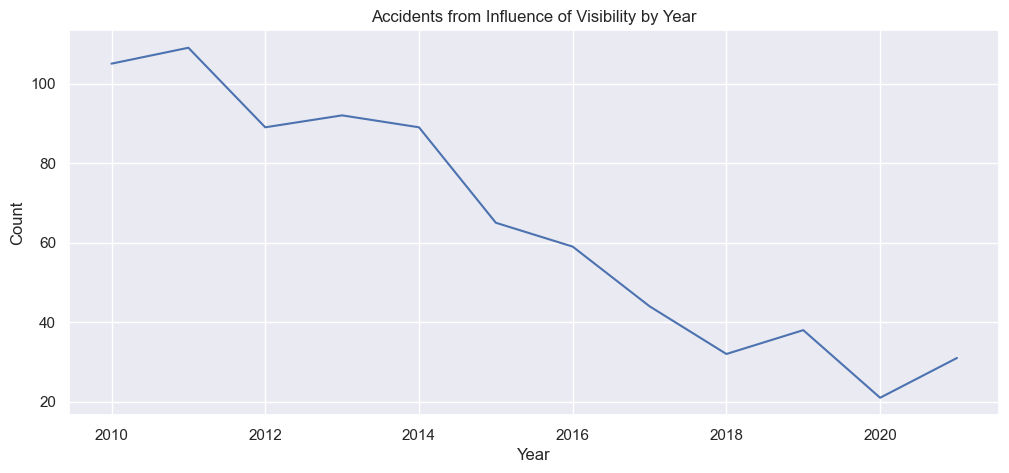

In [64]:
Visibility = accidents_influence.loc[accidents_influence['Influence of Visibility ']=='Si']
Influence_Visibility  = Visibility.groupby(['Influence of Visibility ','Year']).size().reset_index(name='Count').drop('Influence of Visibility ',axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Visibility)
plt.title('Accidents from Influence of Visibility by Year')
plt.show()

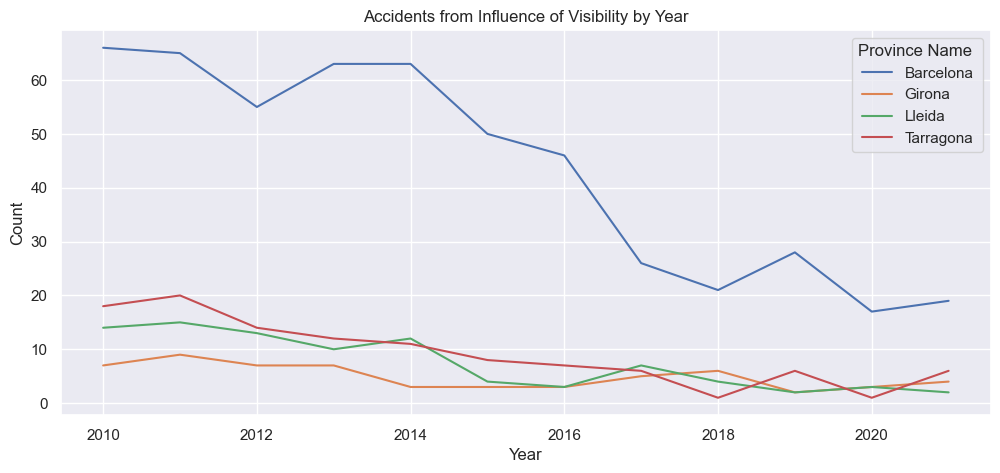

In [65]:
Visibility = accidents_influence.loc[accidents_influence['Influence of Visibility ']=='Si']
Influence_Visibility  = Visibility.groupby(['Influence of Visibility ','Year','Province Name ']).size().reset_index(name='Count').drop('Influence of Visibility ',axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Visibility,hue='Province Name ')
plt.title('Accidents from Influence of Visibility by Year')
plt.show()

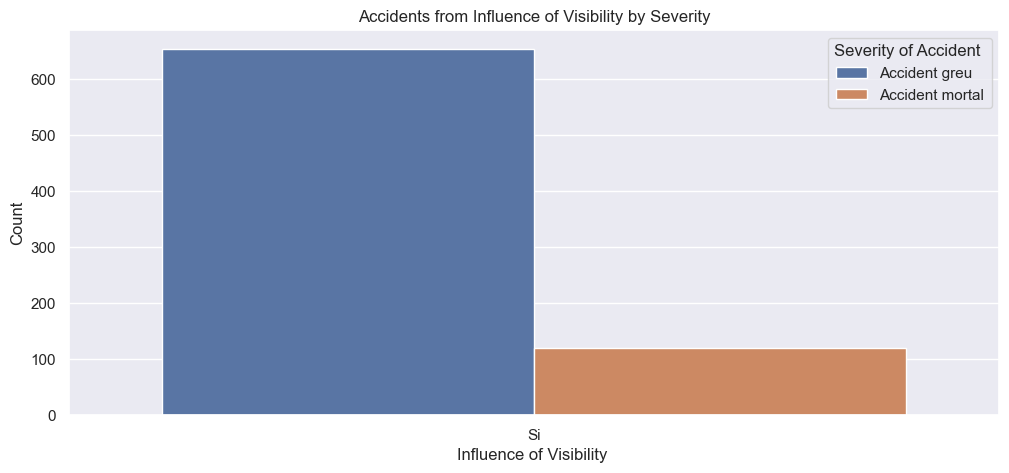

In [67]:
severity_Visibility = Visibility.groupby(['Influence of Visibility ','Severity of Accident ']).size().reset_index(name = 'Count')
plt.figure(figsize=(12,5))
sns.barplot(x='Influence of Visibility ',y='Count',data=severity_Visibility,hue='Severity of Accident ')
plt.title('Accidents from Influence of Visibility by Severity')
plt.show()

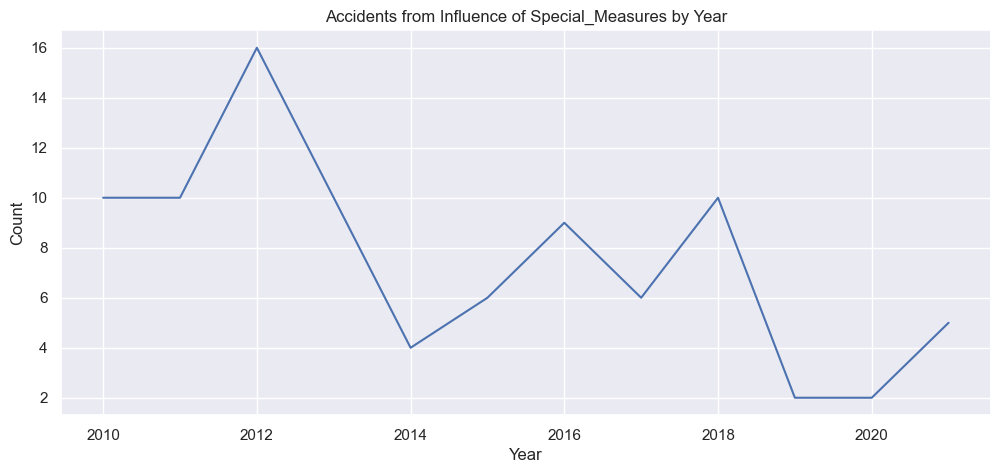

In [69]:
special_Measures = accidents_influence.loc[accidents_influence['Influence of Special Measures']=='Si']
Influence_special_Measures  = special_Measures.groupby(['Influence of Special Measures','Year']).size().reset_index(name='Count').drop('Influence of Special Measures',axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_special_Measures)
plt.title('Accidents from Influence of Special_Measures by Year')
plt.show()

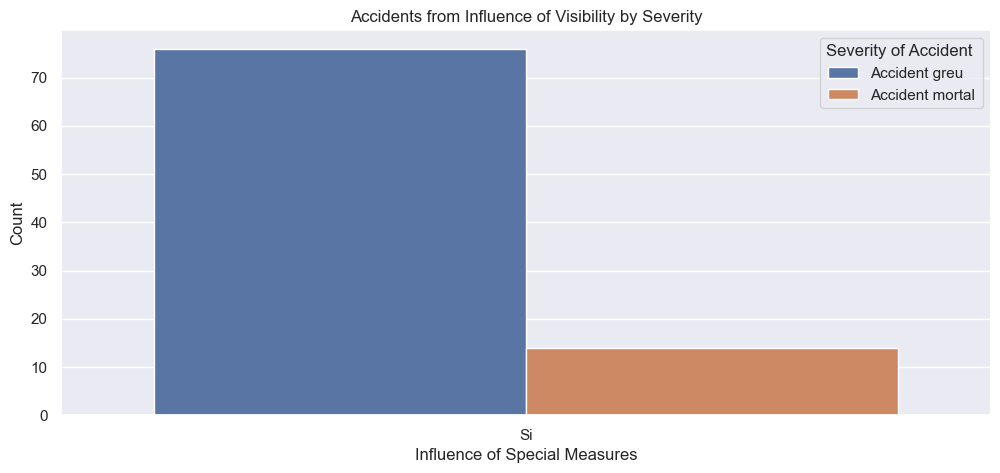

In [70]:
severity_Special = special_Measures.groupby(['Influence of Special Measures','Severity of Accident ']).size().reset_index(name = 'Count')
plt.figure(figsize=(12,5))
sns.barplot(x='Influence of Special Measures',y='Count',data=severity_Special,hue='Severity of Accident ')
plt.title('Accidents from Influence of Visibility by Severity')
plt.show()

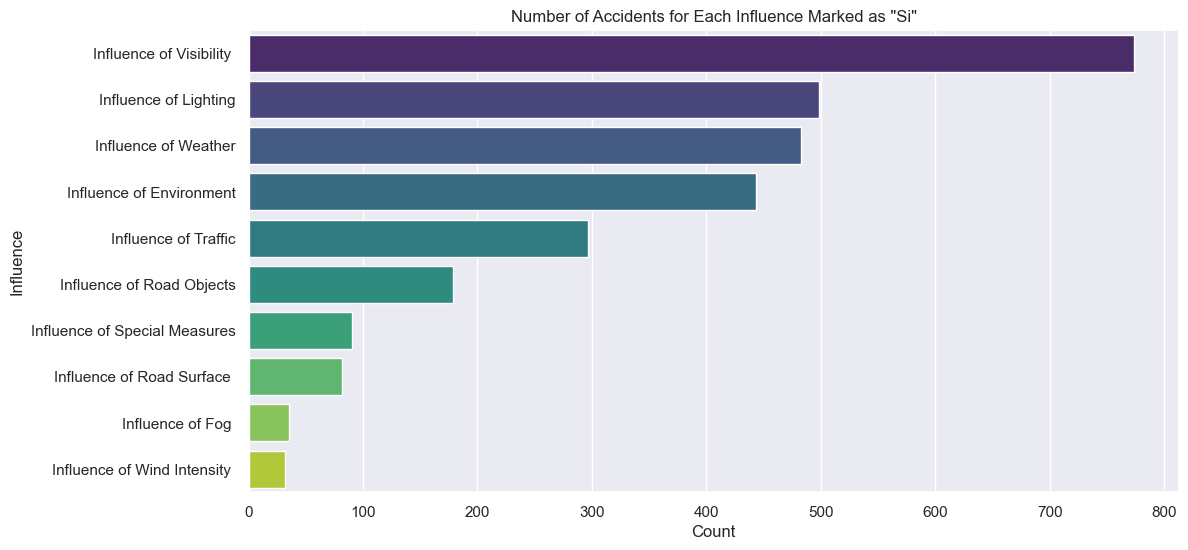

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# Replace 'your_data.csv' with the actual file name or provide the DataFrame directly

# Example data
# Replace this with your actual data
df = data_no_outliers 

# Extract the influence columns
influence_columns = [col for col in df.columns if col.startswith('Influence')]

dfs = []

# Calculate counts for each influence marked as "Si"
for col in influence_columns:
    si_count = df[df[col] == 'Si']['Severity of Accident '].count()
    dfs.append(pd.DataFrame({'Influence': [col], 'Count': [si_count]}))

# Concatenate the DataFrames
count_df = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by count in descending order
count_df = count_df.sort_values(by='Count', ascending=False)

# Plot the counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Influence', data=count_df, palette='viridis')
plt.title('Number of Accidents for Each Influence Marked as "Si"')
plt.xlabel('Count')
plt.ylabel('Influence')
plt.show()


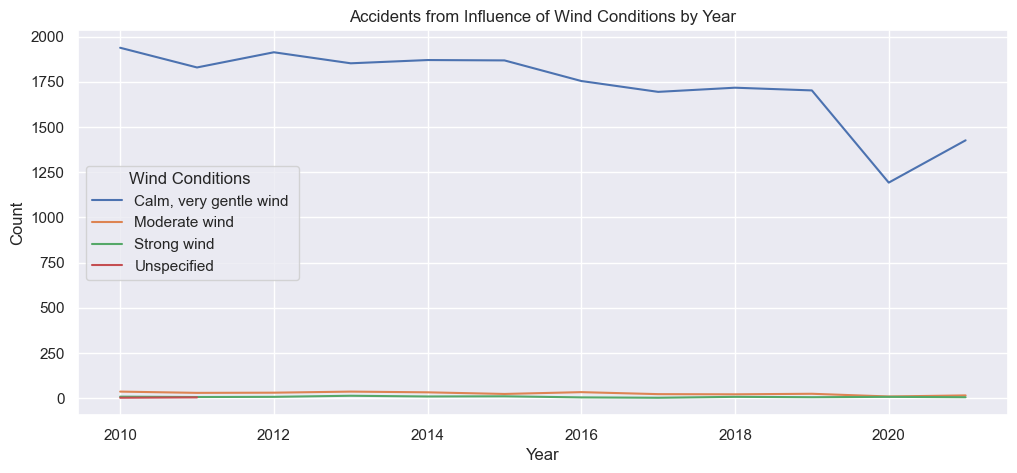

In [83]:
Influence_Wind = accidents_influence.groupby(['Wind Conditions ','Year']).size().reset_index(name='Count')
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Wind,hue='Wind Conditions ')
plt.title('Accidents from Influence of Wind Conditions by Year')
plt.show()

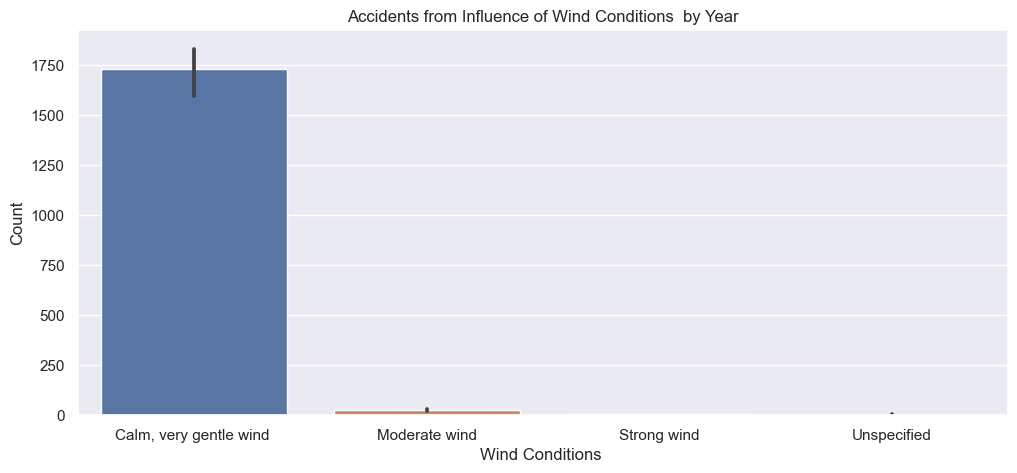

In [84]:
plt.figure(figsize=(12,5))
sns.barplot(x='Wind Conditions ',y='Count',data=Influence_Wind.drop('Year',axis=1))
plt.title('Accidents from Influence of Wind Conditions  by Year')
plt.show()

In [85]:
accidents_influence.columns

Index(['Year', 'Date ', 'Province Name ', 'Fatalties', 'Serious Injuries ',
       'Light Injuries ', 'Fog Presence ', 'Surrounding Environment',
       'Special Lane Presence', 'Special Traffic Measures',
       'Weather Conditions ', 'Special Road Functions ',
       'Severity of Accident ', 'Influence of Fog ',
       'Influence of Environment', 'Influence of Traffic',
       'Influence of Weather', 'Influence of Wind Intensity ',
       'Influence of Lighting', 'Influence of Special Measures',
       'Influence of Road Objects', 'Influence of Road Surface ',
       'Influence of Visibility ', 'Intersection Characteristics ',
       'Speed Limit Information', 'Lighting Conditions ',
       'Traffic Regulation and Priority ', 'Direction of Road',
       'Subtype of Accident', 'Subtype of Road Section ',
       'Subzone within Area', 'Road Surface Conditions ', 'Type of Road',
       'Month', 'Wind Conditions '],
      dtype='object')

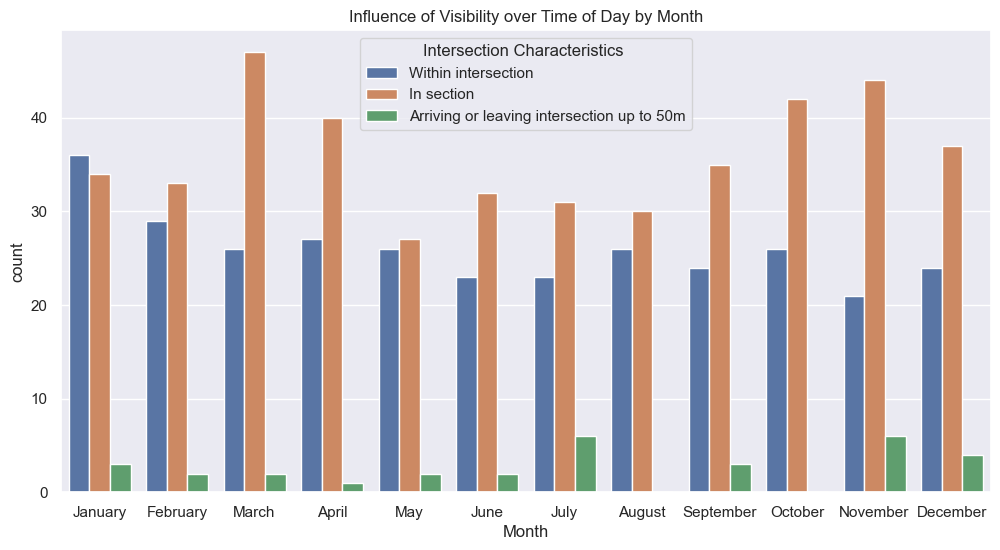

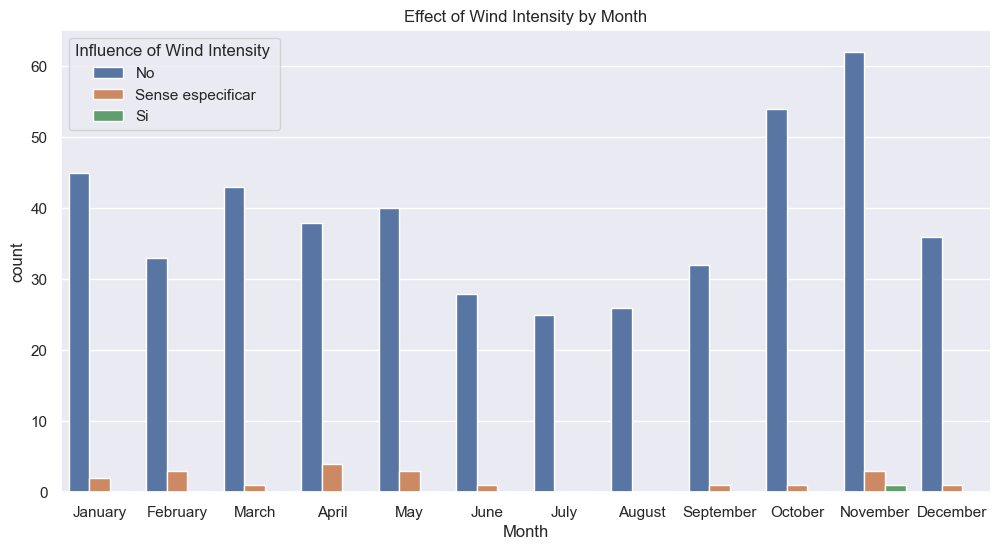

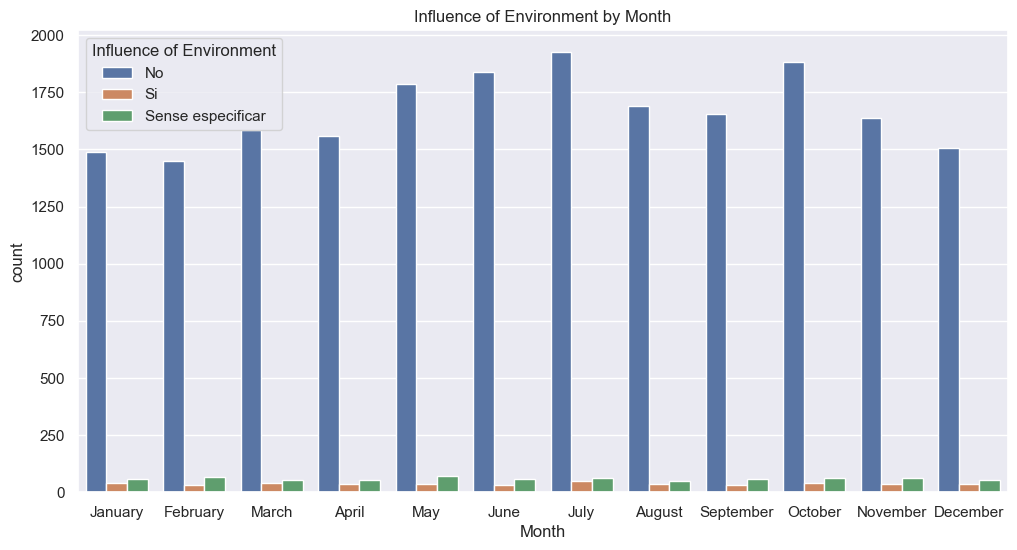

In [86]:

plt.figure(figsize=(12, 6))
sns.countplot(hue='Intersection Characteristics ', x='Month', data=accidents_influence[accidents_influence['Influence of Visibility '] == 'Si'],palette='deep')
plt.title('Influence of Visibility over Time of Day by Month')
plt.show()

# Effect of Wind and Weather by Month
plt.figure(figsize=(12, 6))
sns.countplot(hue='Influence of Wind Intensity ', x='Month', data=accidents_influence[accidents_influence['Influence of Weather'] == 'Si'])
plt.title('Effect of Wind Intensity by Month')
plt.show()

# Influence of Environment by Month
plt.figure(figsize=(12, 6))
sns.countplot(hue='Influence of Environment', x='Month', data=accidents_influence)
plt.title('Influence of Environment by Month')
plt.show()


### **Traffic Influence**

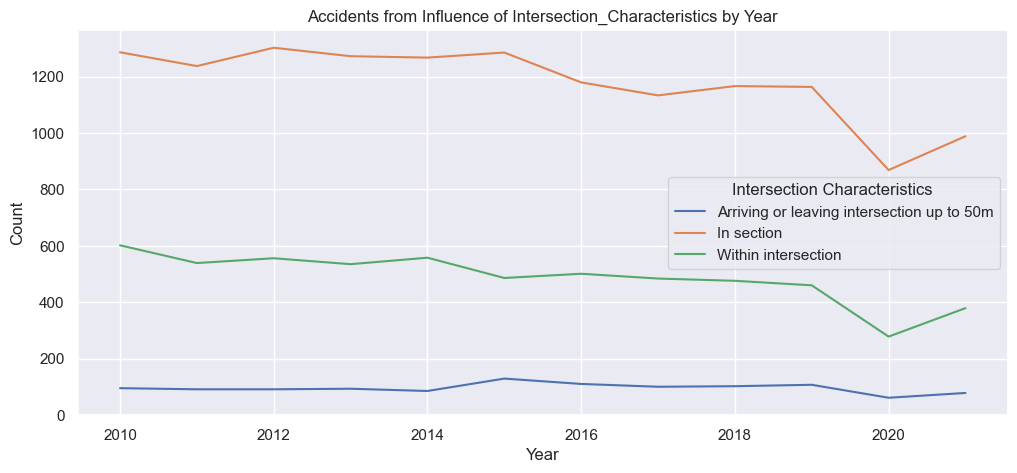

In [24]:
Influence_Intersection_Characteristics = accidents_influence.groupby(['Intersection Characteristics ','Year']).size().reset_index(name='Count')
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Count',data=Influence_Intersection_Characteristics,hue='Intersection Characteristics ')
plt.title('Accidents from Influence of Intersection_Characteristics by Year')
plt.show()

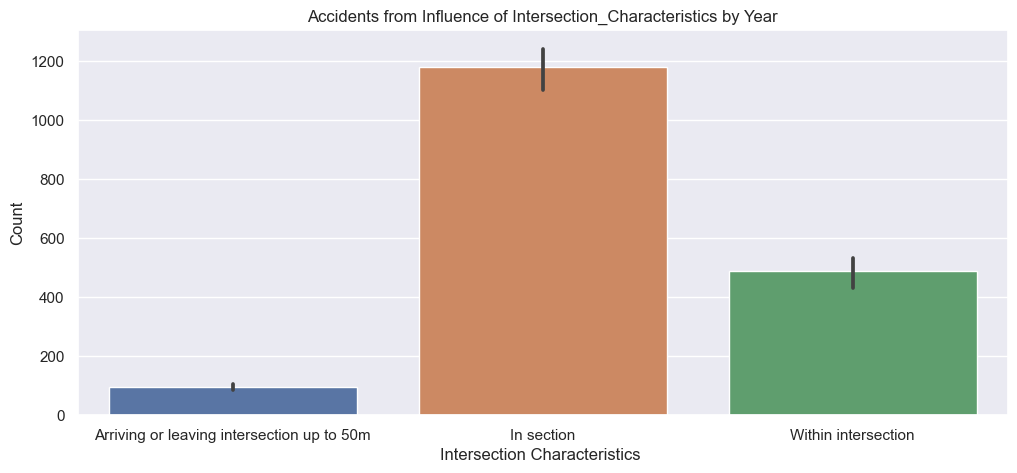

In [27]:

plt.figure(figsize=(12,5))
sns.barplot(x='Intersection Characteristics ',y='Count',data=Influence_Intersection_Characteristics.drop('Year',axis=1))
plt.title('Accidents from Influence of Intersection_Characteristics by Year')
plt.show()

In [13]:
accident_characteristics = data_no_outliers[['Year','Month','Area','Serious Injuries ', 'Light Injuries ', 'Total Victims ','Road ',
       'Units Involved ', 'Pedestrains Involved', 'Bicycles Involved',
       'Mopeds Involved', 'Motorcycles', 'Light Vehicles Involved ',
       'Heavy Vehicles Involved', 'Other Units Involved',
       'Unspecified Units Involved', 'Road Speed Limit',
       'Accident with Hit and Run', 'Fog Presence ', 'Surrounding Environment',
       'Special Lane Presence', 'Special Traffic Measures',
       'Weather Conditions ', 'Special Road Functions ','Severity of Accident ','Fatalties','Subtype of Accident']]

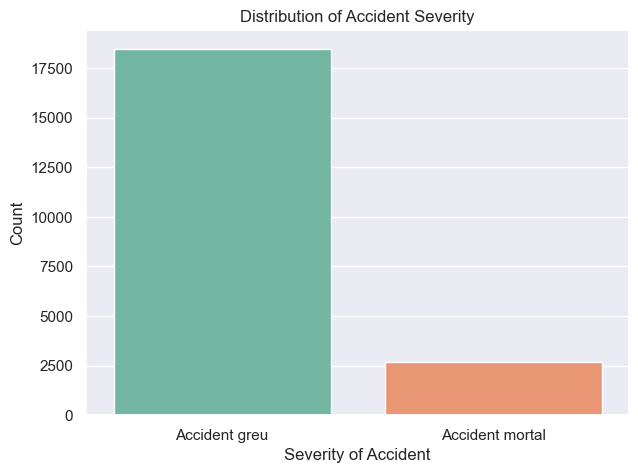

In [53]:
# Create a count plot for severity of accidents
plt.figure(figsize=(7, 5))
sns.countplot(x='Severity of Accident ', data=accident_characteristics, palette='Set2')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity of Accident')
plt.ylabel('Count')
plt.show()


In [54]:
# Calculate the ratio of each severity level
severity_ratios = accident_characteristics['Severity of Accident '].value_counts(normalize=True)

# Print the ratios
for severity, ratio in severity_ratios.items():
    print(f"The ratio of accidents with severity '{severity}' is: {ratio:.2%}")


The ratio of accidents with severity 'Accident greu' is: 87.38%
The ratio of accidents with severity 'Accident mortal' is: 12.62%


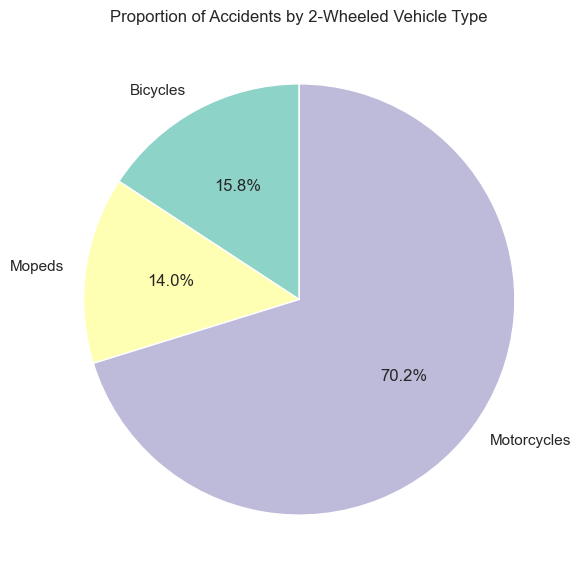

In [55]:
df_2wheels_involved = accident_characteristics[(accident_characteristics['Bicycles Involved'] > 0) | (accident_characteristics['Mopeds Involved'] > 0) | (accident_characteristics['Motorcycles'] > 0)]


vehicle_types = ['Bicycles', 'Mopeds', 'Motorcycles']
vehicle_counts = [df_2wheels_involved['Bicycles Involved'].sum(), df_2wheels_involved['Mopeds Involved'].sum(), df_2wheels_involved['Motorcycles'].sum()]

plt.figure(figsize=(7, 7))
plt.pie(vehicle_counts, labels=vehicle_types, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Proportion of Accidents by 2-Wheeled Vehicle Type')
plt.show()

In [56]:
# Calculate fatality rate for heavy vehicles
fatality_rate_heavy = accident_characteristics.groupby('Heavy Vehicles Involved')['Fatalties'].mean()

# Calculate fatality rate for light vehicles
fatality_rate_light = accident_characteristics.groupby('Light Vehicles Involved ')['Fatalties'].mean()

# Print the fatality rates
print(f"Fatality rate for accidents involving heavy vehicles: {fatality_rate_heavy[1]:.2%}")
print(f"Fatality rate for accidents involving light vehicles: {fatality_rate_light[1]:.2%}")


Fatality rate for accidents involving heavy vehicles: 30.24%
Fatality rate for accidents involving light vehicles: 11.90%


In [57]:
# Calculate fatality rate for heavy vehicles
fatality_rate_heavy = (accident_characteristics.groupby('Heavy Vehicles Involved')['Fatalties'].sum() / 
                       accident_characteristics.groupby('Heavy Vehicles Involved').size()).reset_index(name='Fatality Rate')

# Calculate fatality rate for light vehicles
fatality_rate_light = (accident_characteristics.groupby('Light Vehicles Involved ')['Fatalties'].sum() / 
                       accident_characteristics.groupby('Light Vehicles Involved ').size()).reset_index(name='Fatality Rate')


print(f"Fatality rate for accidents involving heavy vehicles: {fatality_rate_heavy}")
print(f"Fatality rate for accidents involving light vehicles: {fatality_rate_light}")


Fatality rate for accidents involving heavy vehicles:    Heavy Vehicles Involved  Fatality Rate
0                        0       0.115696
1                        1       0.302434
2                        2       0.432836
3                        3       0.576923
4                        4       0.285714
5                        5       0.000000
6                        6       1.000000
Fatality rate for accidents involving light vehicles:     Light Vehicles Involved   Fatality Rate
0                          0       0.126248
1                          1       0.119048
2                          2       0.223796
3                          3       0.273942
4                          4       0.282895
5                          5       0.209302
6                          6       0.250000
7                          7       0.363636
8                          8       0.250000
9                          9       0.500000
10                        14       0.000000


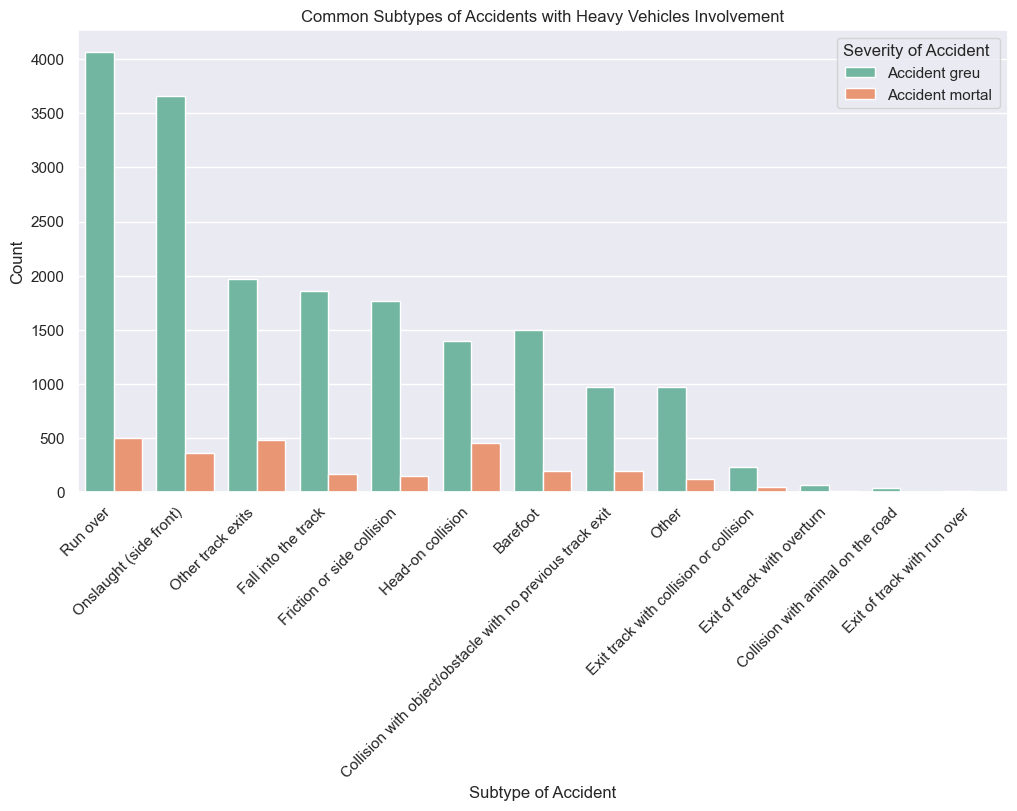

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Subtype of Accident', data=accident_characteristics, palette='Set2', order=accident_characteristics['Subtype of Accident'].value_counts().index,hue='Severity of Accident ')
plt.title('Common Subtypes of Accidents with Heavy Vehicles Involvement')
plt.xlabel('Subtype of Accident')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [58]:
df_heavy_involved = accident_characteristics[accident_characteristics['Heavy Vehicles Involved'] > 0]

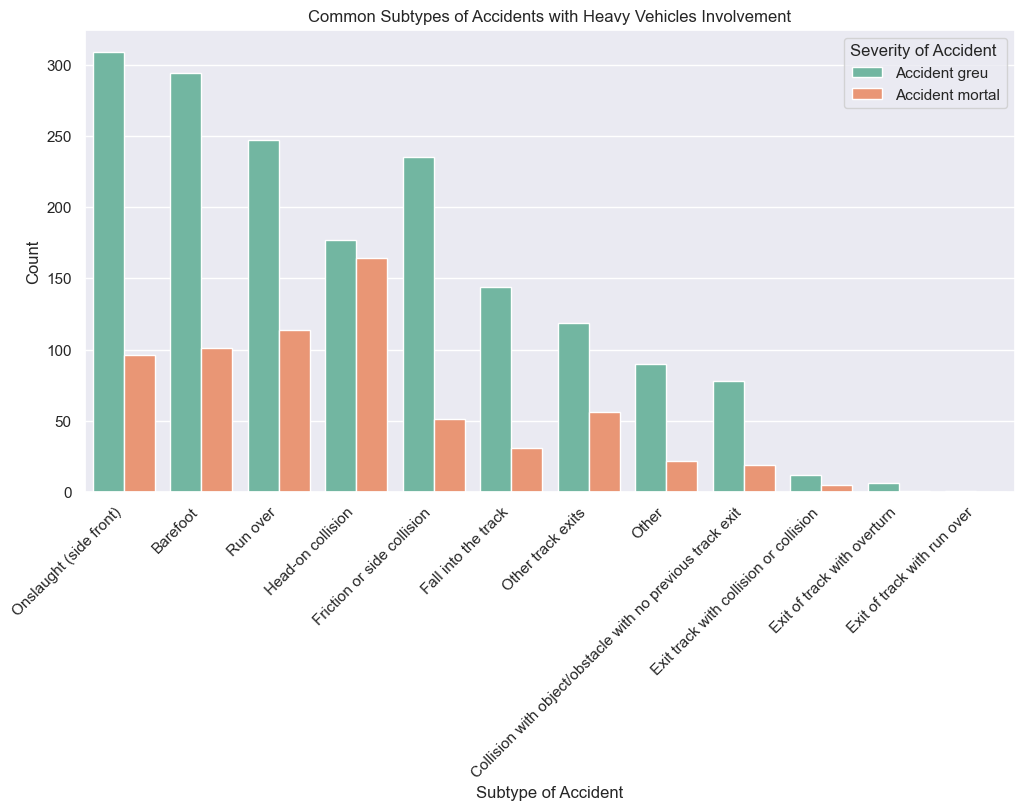

In [86]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Subtype of Accident', data=df_heavy_involved, palette='Set2', order=df_heavy_involved['Subtype of Accident'].value_counts().index,hue='Severity of Accident ')
plt.title('Common Subtypes of Accidents with Heavy Vehicles Involvement')
plt.xlabel('Subtype of Accident')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

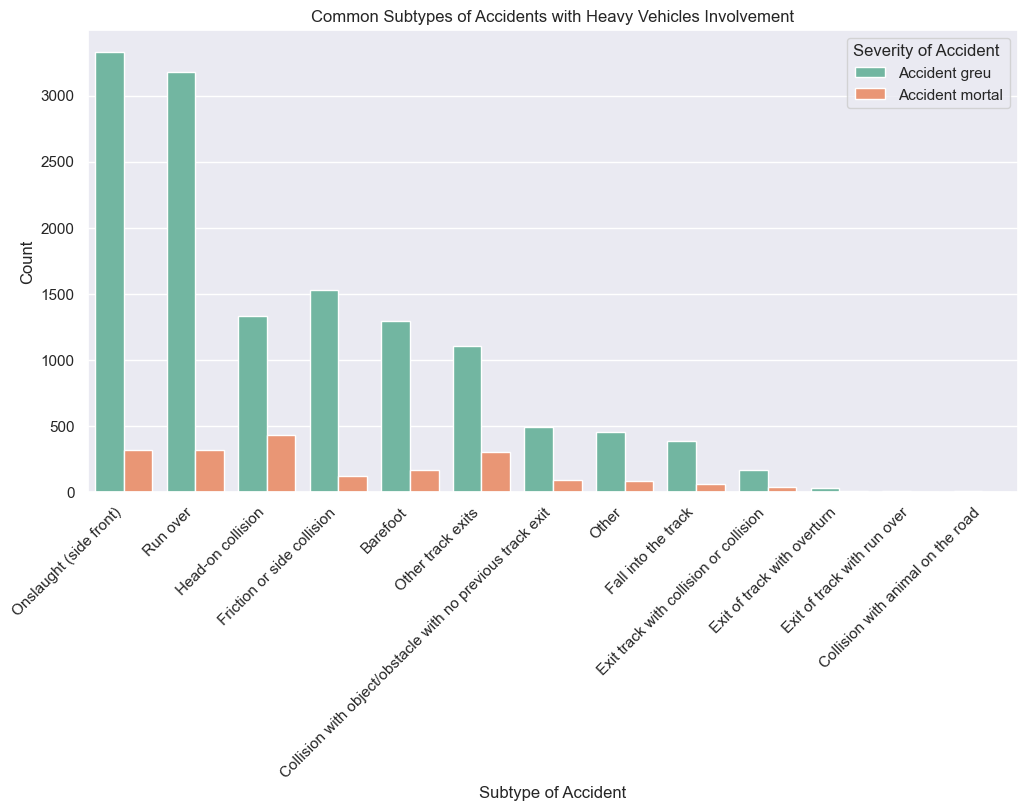

In [87]:
df_light_involved = accident_characteristics[accident_characteristics['Light Vehicles Involved '] > 0]

# Create a count plot for the subtype of accidents with light vehicle involvement
plt.figure(figsize=(12, 6))
sns.countplot(x='Subtype of Accident', data=df_light_involved, palette='Set2', order=df_light_involved['Subtype of Accident'].value_counts().index,hue='Severity of Accident ')
plt.title('Common Subtypes of Accidents with Heavy Vehicles Involvement')
plt.xlabel('Subtype of Accident')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

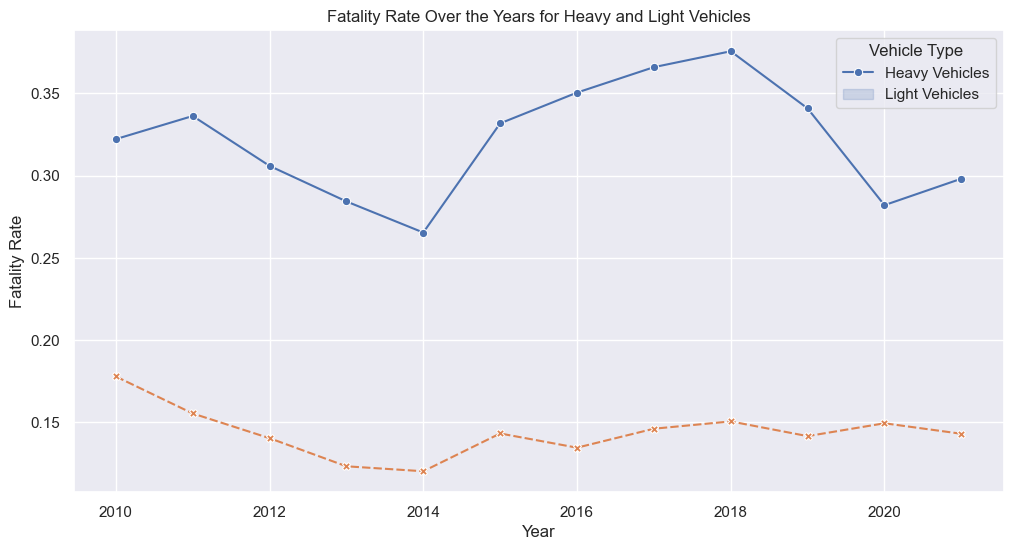

In [206]:
df_vehicle_involved = accident_characteristics[(accident_characteristics['Heavy Vehicles Involved'] > 0) | (accident_characteristics['Light Vehicles Involved '] > 0)].copy()

df_vehicle_involved.loc[df_vehicle_involved['Heavy Vehicles Involved'] > 0, 'Fatality Rate Heavy'] = df_vehicle_involved['Fatalties']
df_vehicle_involved.loc[df_vehicle_involved['Light Vehicles Involved '] > 0, 'Fatality Rate Light'] = df_vehicle_involved['Fatalties']

# Group by year and calculate the mean fatality rate for heavy and light vehicles
fatality_rate_over_years = df_vehicle_involved.groupby('Year')[['Fatality Rate Heavy', 'Fatality Rate Light']].mean()

# Plot the fatality rates over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=fatality_rate_over_years, markers=True)
plt.title('Fatality Rate Over the Years for Heavy and Light Vehicles')
plt.xlabel('Year')
plt.ylabel('Fatality Rate')
plt.legend(title='Vehicle Type', labels=['Heavy Vehicles', 'Light Vehicles'])
plt.show()


In [109]:
data_no_outliers.columns

Index(['Year', 'Area', 'Date ', 'Road ', 'Kilometer Point',
       'Municipality Name ', 'County Name ', 'Province Name ', 'Fatalties',
       'Serious Injuries ', 'Light Injuries ', 'Total Victims ',
       'Units Involved ', 'Pedestrains Involved', 'Bicycles Involved',
       'Mopeds Involved', 'Motorcycles', 'Light Vehicles Involved ',
       'Heavy Vehicles Involved', 'Other Units Involved',
       'Unspecified Units Involved', 'Road Speed Limit',
       'Accident with Hit and Run', 'Fog Presence ', 'Surrounding Environment',
       'Special Lane Presence', 'Special Traffic Measures',
       'Weather Conditions ', 'Special Road Functions ',
       'Severity of Accident ', 'Influence of Fog ',
       'Influence of Environment', 'Influence of Traffic',
       'Influence of Weather', 'Influence of Wind Intensity ',
       'Influence of Lighting', 'Influence of Special Measures',
       'Influence of Road Objects', 'Influence of Road Surface ',
       'Influence of Visibility ', 'Inter

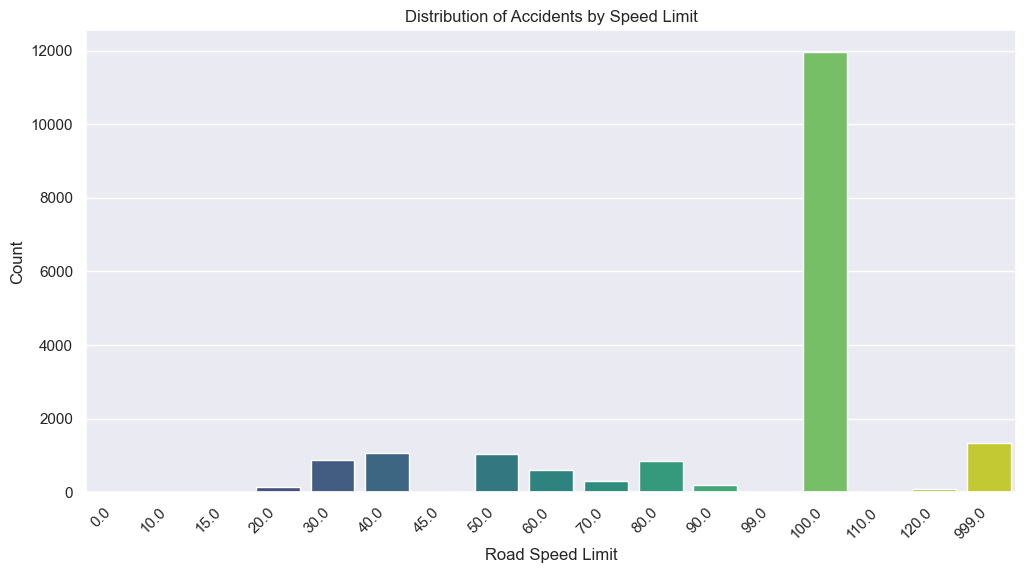

In [207]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Road Speed Limit', data=accident_characteristics, palette='viridis')
plt.title('Distribution of Accidents by Speed Limit')
plt.xlabel('Road Speed Limit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

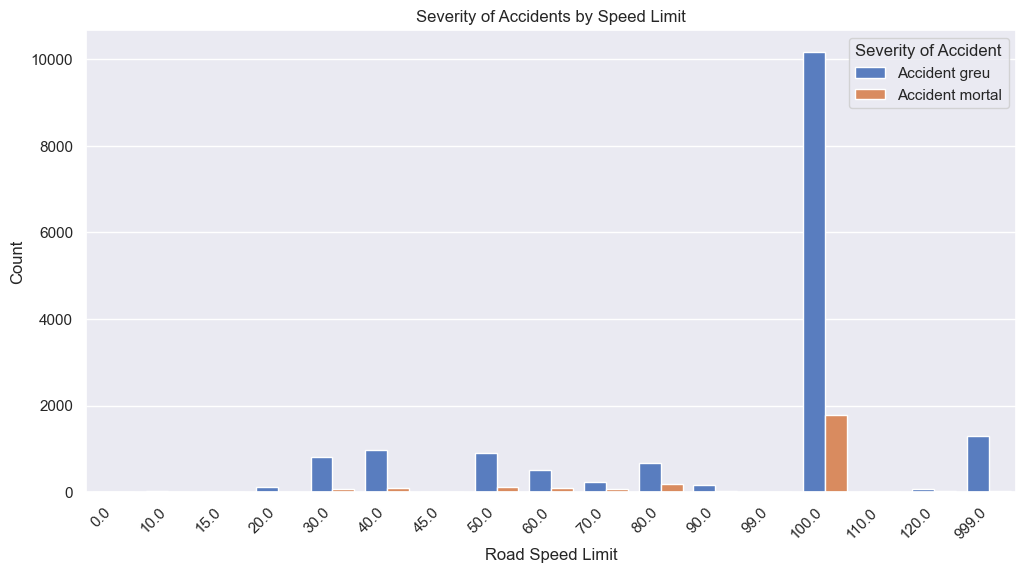

In [208]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Road Speed Limit', hue='Severity of Accident ', data=accident_characteristics, palette='muted')
plt.title('Severity of Accidents by Speed Limit')
plt.xlabel('Road Speed Limit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Severity of Accident')
plt.show()

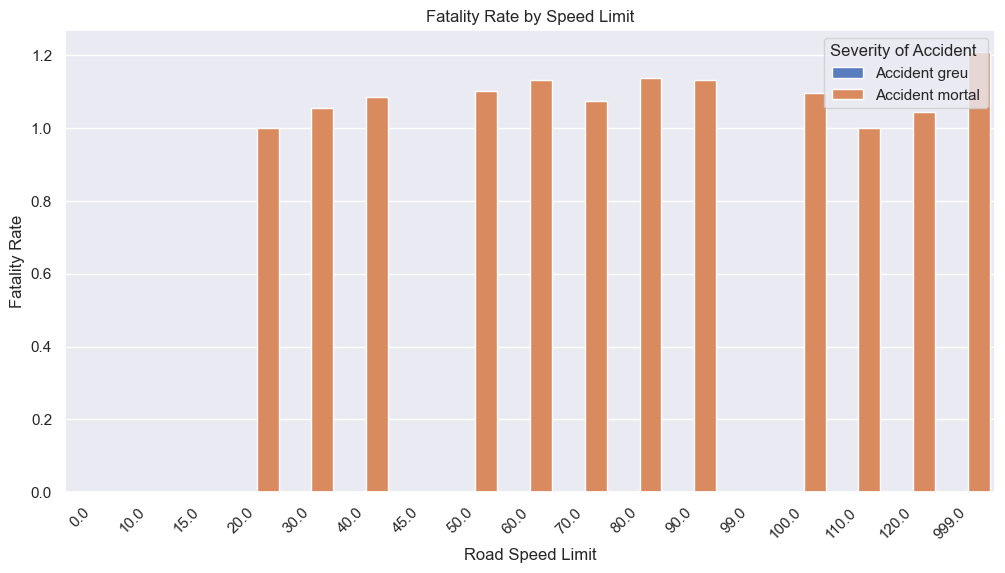

In [103]:
fatality_rate_speed_limit = accident_characteristics.groupby(['Road Speed Limit','Severity of Accident '])['Fatalties'].mean().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Road Speed Limit', y='Count', palette='muted',hue='Severity of Accident ',data=fatality_rate_speed_limit)
plt.title('Fatality Rate by Speed Limit')
plt.xlabel('Road Speed Limit')
plt.ylabel('Fatality Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

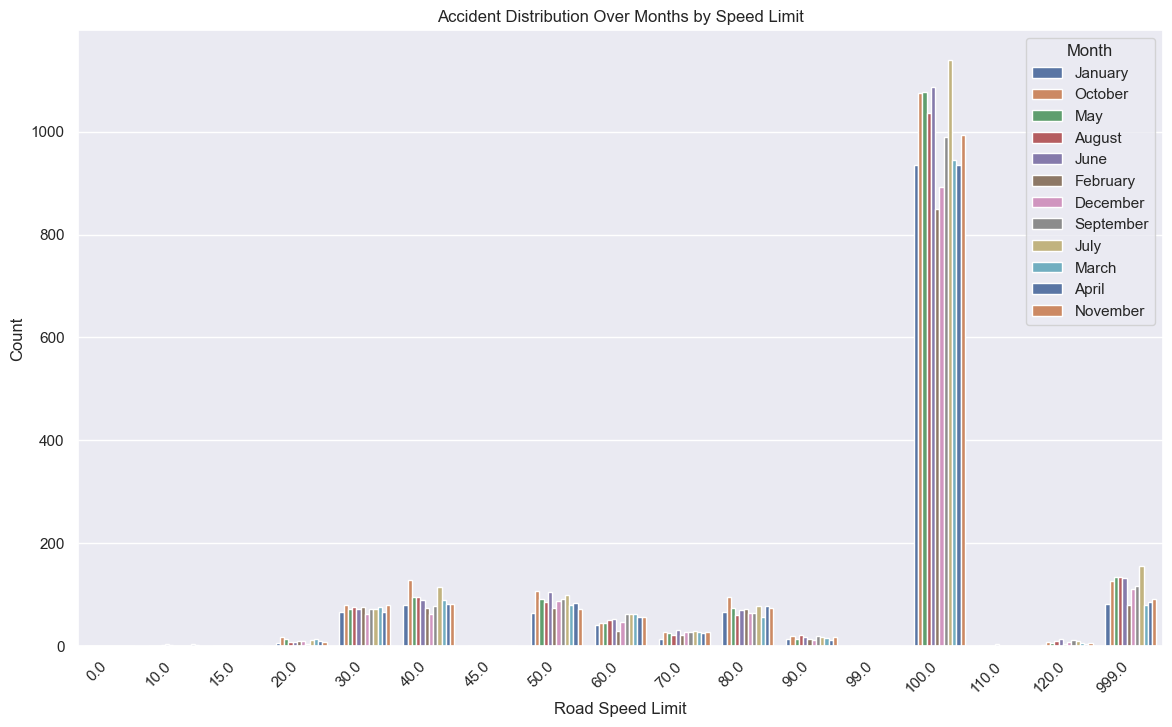

In [212]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Road Speed Limit', hue='Month', data=accident_characteristics, palette='deep')
plt.title('Accident Distribution Over Months by Speed Limit')
plt.xlabel('Road Speed Limit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.show()


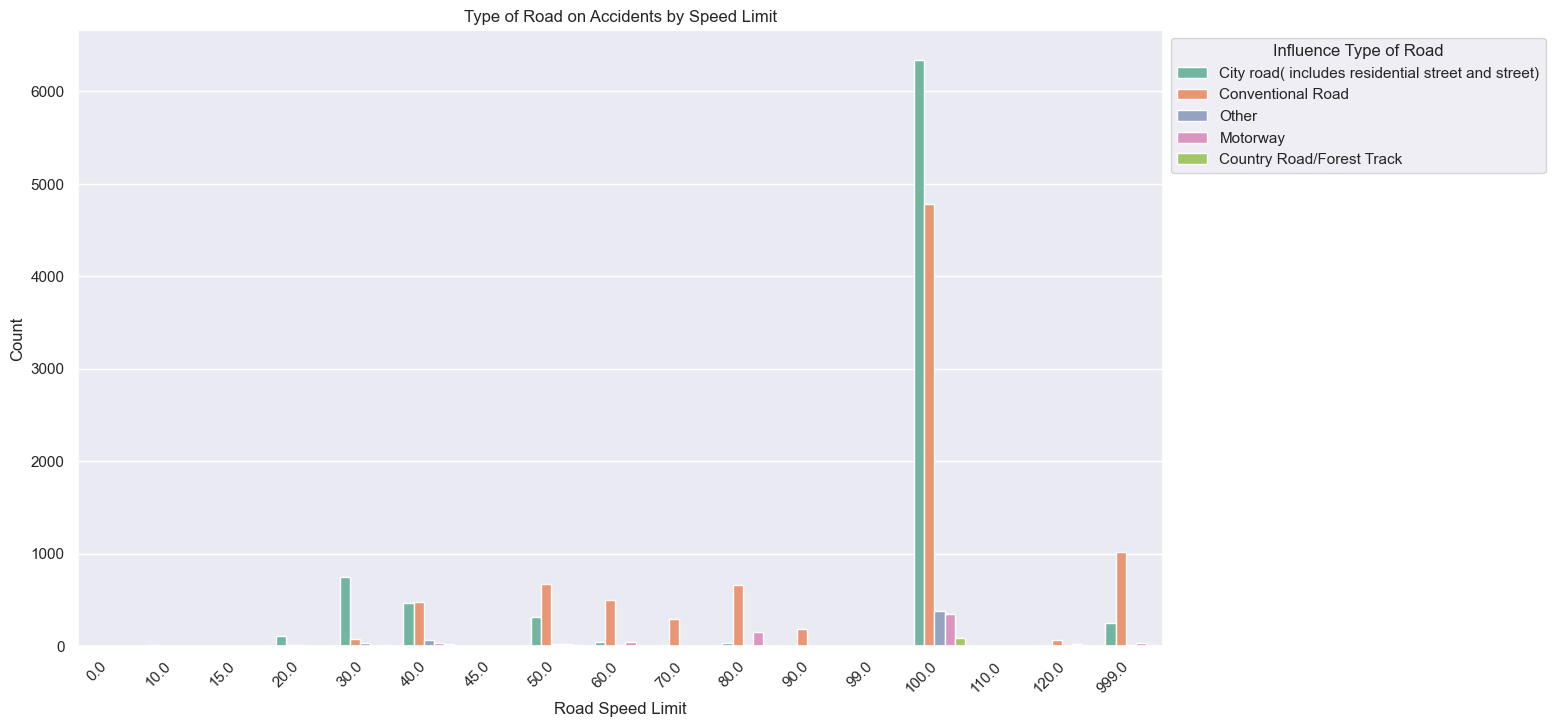

In [225]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Road Speed Limit', hue='Type of Road', data=data_no_outliers, palette='Set2')
plt.title('Type of Road on Accidents by Speed Limit')
plt.xlabel('Road Speed Limit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Influence Type of Road', bbox_to_anchor=(1, 1))
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_10760\1977191519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_characteristics.loc[:, '2wheeledInvolved'] = (accident_characteristics['Motorcycles'] > 0) | (accident_characteristics['Mopeds Involved'] > 0) | (accident_characteristics['Bicycles Involved'] > 0)
C:\Users\user\AppData\Local\Temp\ipykernel_10760\1977191519.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  accident_characteristics.loc[:, '2wheeledInvolved'] = (accident_characteristics['Motorcycles'] > 0)

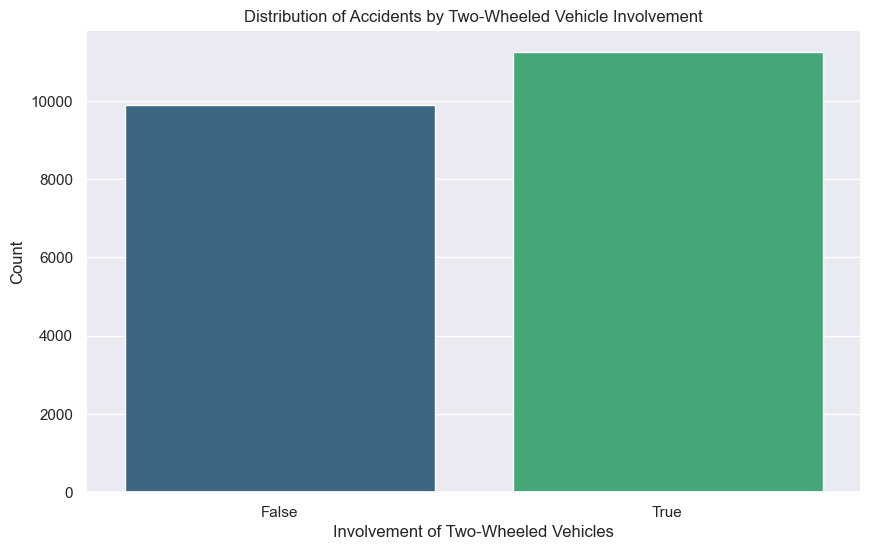

In [115]:
accident_characteristics.loc[:, '2wheeledInvolved'] = (accident_characteristics['Motorcycles'] > 0) | (accident_characteristics['Mopeds Involved'] > 0) | (accident_characteristics['Bicycles Involved'] > 0)

plt.figure(figsize=(10, 6))
sns.countplot(x='2wheeledInvolved', data=accident_characteristics, palette='viridis')
plt.title('Distribution of Accidents by Two-Wheeled Vehicle Involvement')
plt.xlabel('Involvement of Two-Wheeled Vehicles')
plt.ylabel('Count')
plt.show()

In [119]:
total_count = 21154
true_count = 11245
false_count = 9909

true_percentage = (true_count / total_count) * 100
true_percentage

53.1577952160348

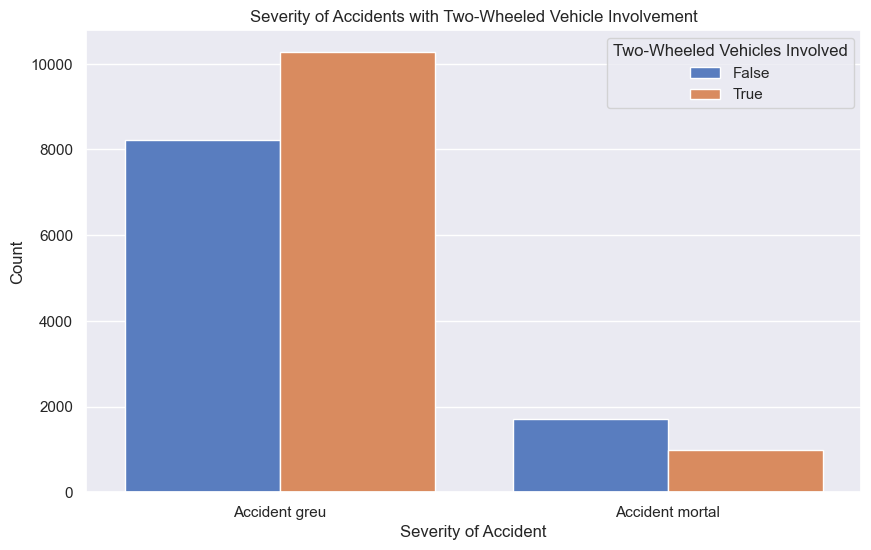

In [121]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity of Accident ', hue='2wheeledInvolved', data=accident_characteristics, palette='muted')
plt.title('Severity of Accidents with Two-Wheeled Vehicle Involvement')
plt.xlabel('Severity of Accident')
plt.ylabel('Count')
plt.legend(title='Two-Wheeled Vehicles Involved')
plt.show()


In [122]:
# Calculate the proportion of total victims in accidents with two-wheeled vehicles
proportion_total_victims_two_wheeled = accident_characteristics.groupby('2wheeledInvolved')['Fatalties'].mean()

# Print the proportion of total victims
for category, proportion in proportion_total_victims_two_wheeled.items():
    print(f"The average number of Fatalties in accidents with {category} two-wheeled vehicles involved is {proportion:.2f}.")


The average number of Fatalties in accidents with False two-wheeled vehicles involved is 0.19.
The average number of Fatalties in accidents with True two-wheeled vehicles involved is 0.09.


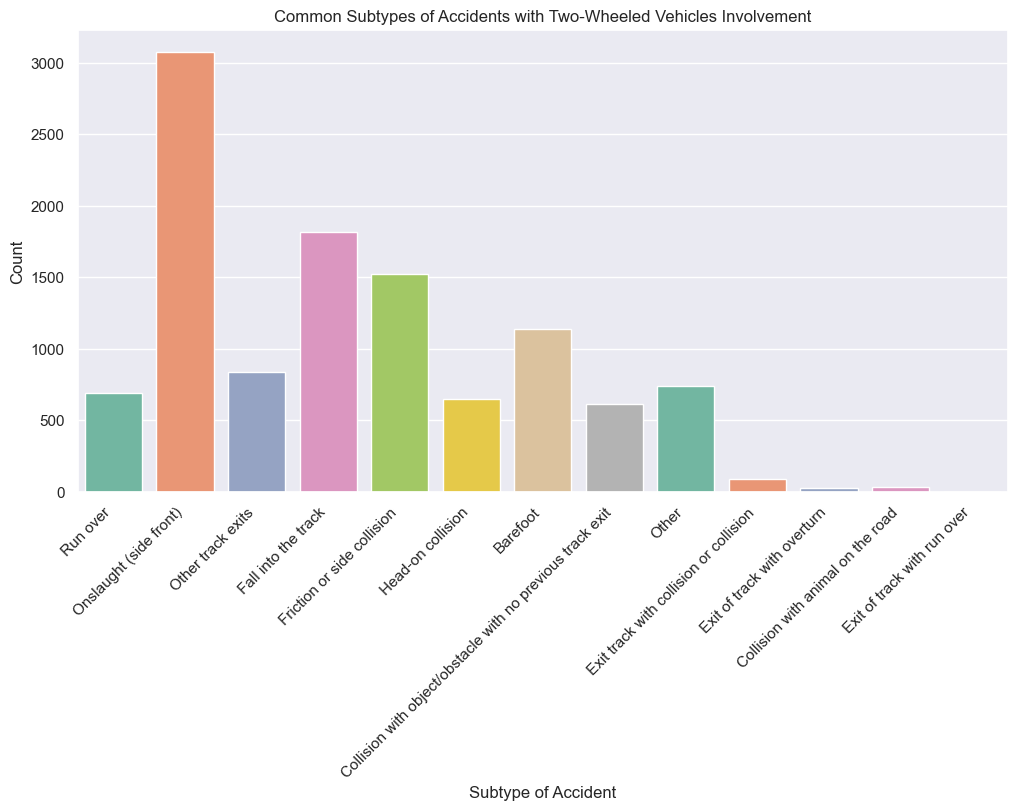

In [126]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Subtype of Accident', data=accident_characteristics[accident_characteristics['2wheeledInvolved'] == True], palette='Set2', order=accident_characteristics['Subtype of Accident'].value_counts().index)
plt.title('Common Subtypes of Accidents with Two-Wheeled Vehicles Involvement')
plt.xlabel('Subtype of Accident')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_10760\2582243544.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_two_wheeled_involved.loc[df_two_wheeled_involved['2wheeledInvolved'], 'Fatality Rate Two-Wheeled'] = df_two_wheeled_involved['Fatalties'].copy()


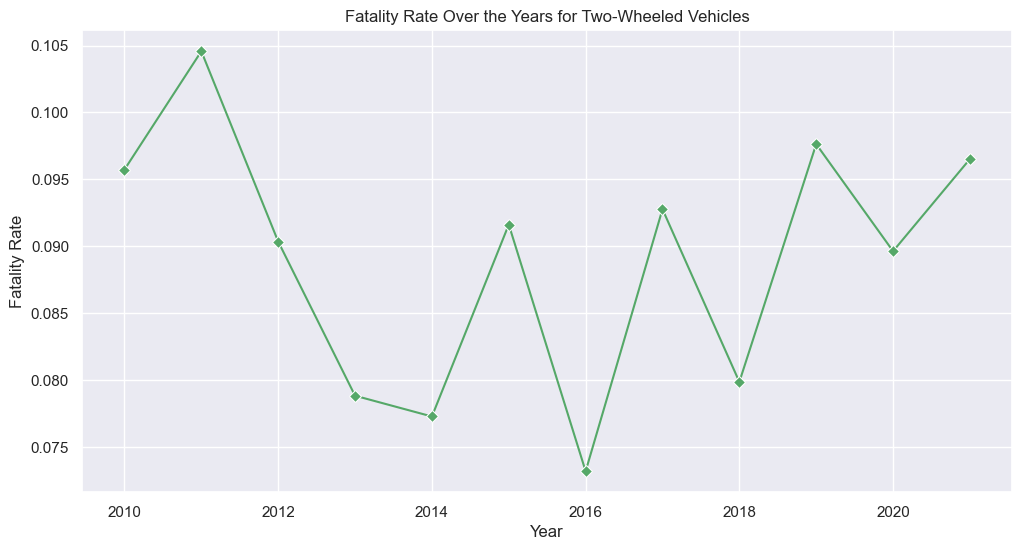

In [129]:
# Assuming your DataFrame is named 'accident_characteristics'
# Replace 'YourDataFrame' with the actual variable name if it's different

# Filter rows with at least one two-wheeled vehicle involved
df_two_wheeled_involved = accident_characteristics[accident_characteristics['2wheeledInvolved'] == True].copy()

# Calculate fatality rate for two-wheeled vehicles using .loc
df_two_wheeled_involved.loc[df_two_wheeled_involved['2wheeledInvolved'], 'Fatality Rate Two-Wheeled'] = df_two_wheeled_involved['Fatalties'].copy()

# Group by year and calculate the mean fatality rate for two-wheeled vehicles
fatality_rate_over_years_two_wheeled = df_two_wheeled_involved.groupby('Year')['Fatality Rate Two-Wheeled'].mean().copy()

# Plot the fatality rates over the years for two-wheeled vehicles
plt.figure(figsize=(12, 6))
sns.lineplot(data=fatality_rate_over_years_two_wheeled, marker='D', linestyle='-', color='g')
plt.title('Fatality Rate Over the Years for Two-Wheeled Vehicles')
plt.xlabel('Year')
plt.ylabel('Fatality Rate')
plt.show()


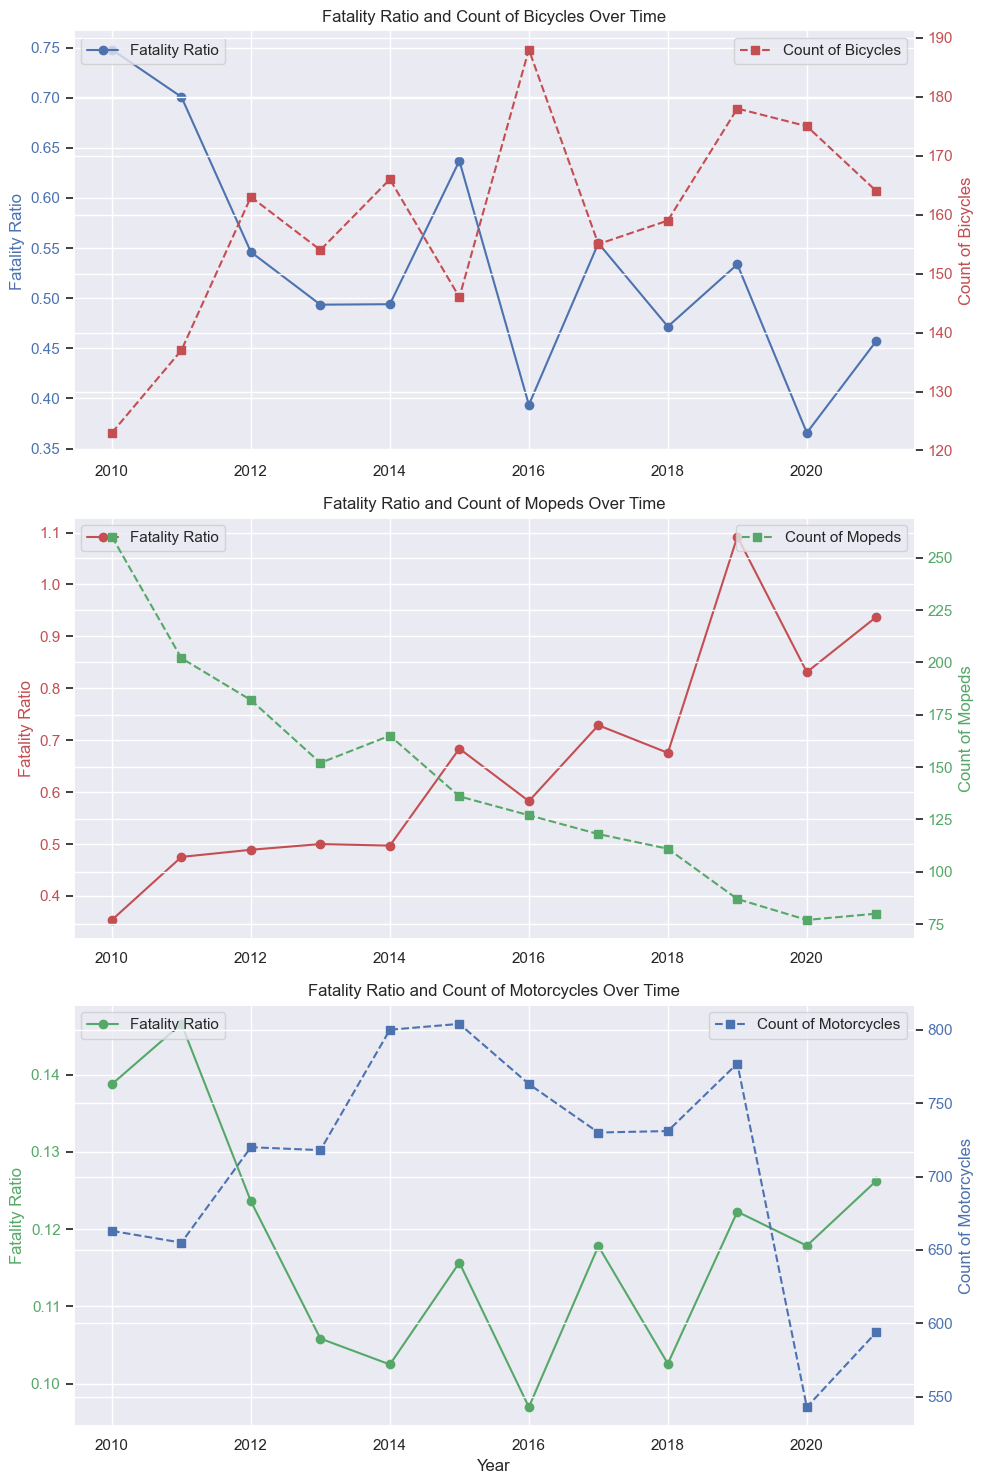

In [130]:
import matplotlib.ticker as ticker

grouped_df = df_2wheels_involved.groupby(['Year']).agg({'Fatalties': 'sum', 'Bicycles Involved': 'sum', 'Mopeds Involved': 'sum', 'Motorcycles': 'sum'}).reset_index()

# Create individual plots for each type of 2-wheeled vehicle
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot for Bicycles
fatality_ratio_bicycles = grouped_df['Fatalties'] / grouped_df['Bicycles Involved']
axes[0].plot(grouped_df['Year'], fatality_ratio_bicycles, marker='o', linestyle='-', color='b', label='Fatality Ratio')
axes[0].set_title('Fatality Ratio and Count of Bicycles Over Time')
axes[0].set_ylabel('Fatality Ratio', color='b')
axes[0].tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for the count of Bicycles
ax2_0 = axes[0].twinx()
ax2_0.plot(grouped_df['Year'], grouped_df['Bicycles Involved'], marker='s', linestyle='--', color='r', label='Count of Bicycles')
ax2_0.set_ylabel('Count of Bicycles', color='r')
ax2_0.tick_params(axis='y', labelcolor='r')
axes[0].legend(loc='upper left')
ax2_0.legend(loc='upper right')

# Plot for Mopeds
fatality_ratio_mopeds = grouped_df['Fatalties'] / grouped_df['Mopeds Involved']
axes[1].plot(grouped_df['Year'], fatality_ratio_mopeds, marker='o', linestyle='-', color='r', label='Fatality Ratio')
axes[1].set_title('Fatality Ratio and Count of Mopeds Over Time')
axes[1].set_ylabel('Fatality Ratio', color='r')
axes[1].tick_params(axis='y', labelcolor='r')

# Create a secondary y-axis for the count of Mopeds
ax2_1 = axes[1].twinx()
ax2_1.plot(grouped_df['Year'], grouped_df['Mopeds Involved'], marker='s', linestyle='--', color='g', label='Count of Mopeds')
ax2_1.set_ylabel('Count of Mopeds', color='g')
ax2_1.tick_params(axis='y', labelcolor='g')
axes[1].legend(loc='upper left')
ax2_1.legend(loc='upper right')

# Plot for Motorcycles
fatality_ratio_motorcycles = grouped_df['Fatalties'] / grouped_df['Motorcycles']
axes[2].plot(grouped_df['Year'], fatality_ratio_motorcycles, marker='o', linestyle='-', color='g', label='Fatality Ratio')
axes[2].set_title('Fatality Ratio and Count of Motorcycles Over Time')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Fatality Ratio', color='g')
axes[2].tick_params(axis='y', labelcolor='g')

# Create a secondary y-axis for the count of Motorcycles
ax2_2 = axes[2].twinx()
ax2_2.plot(grouped_df['Year'], grouped_df['Motorcycles'], marker='s', linestyle='--', color='b', label='Count of Motorcycles')
ax2_2.set_ylabel('Count of Motorcycles', color='b')
ax2_2.tick_params(axis='y', labelcolor='b')
axes[2].legend(loc='upper left')
ax2_2.legend(loc='upper right')

plt.tight_layout()
plt.show()
